# **Sentiment Analysis**  **(Part - 1)**

#Importing Initial Libraries

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np

# plotting
import seaborn as sns
import matplotlib.pyplot as plt



#Loading Data

The give datasets have data in these range

NKE   ->  12/2017 - 09/2019

IBM   ->  09/2017 - 09/2019

MCD   ->  01/2017 - 09/2019

PG    ->  01/2017 - 09/2019

AAPL  -> 01/2018 - 10/2019

In [ ]:
# Load the data into DataFrame
df = pd.read_csv('NKE.csv', error_bad_lines=False)


<ipython-input-58-cc960f61fc6e>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('NKE.csv', error_bad_lines=False)


In [ ]:
df.head()

Unnamed: 0  Unnamed: 0.1.1.1           author_id        Date  \
0           0             50652  887052326472740866  2017-12-31   
1           1              6349  888125801903775744  2017-12-31   
2           2              6348           364589590  2017-12-31   
3           3              6347  925001257663811584  2017-12-31   
4           4              6346  887052326472740866  2017-12-31   

                   date_time  favorites  followers_count  friends_count  geo  \
0  2017-12-31 23:12:12-05:00          0              788             10  NaN   
1  2017-12-31 20:08:41-05:00          0              565             43  NaN   
2  2017-12-31 22:30:10-05:00          0              472              4  NaN   
3  2017-12-31 23:00:02-05:00          0              921             40  NaN   
4  2017-12-31 23:12:12-05:00          0              787             10  NaN   

  hashtags  ...  mentions                name  \
0      NaN  ...       NaN    Stock News Times   
1      NaN  ...       NaN         Week Herald   
2      NaN  ...       NaN  Exact Option Picks   
3      NaN  ...       NaN        shortvolumes   
4      NaN  ...       NaN    Stock News Times   

                                           permalink  polarity replies  \
0  https://twitter.com/stocknewstimes/status/9476...  0.000000       0   
1  https://twitter.com/WeekHerald/status/94763565...  0.000000       0   
2  https://twitter.com/ExactOptionPick/status/947...  0.133333       0   
3  https://twitter.com/shortvolumes/status/947678...  0.000000       0   
4  https://twitter.com/stocknewstimes/status/9476...  0.000000       0   

   retweets      screen_name  sentiment subjectivity  \
0         0   stocknewstimes          0          0.0   
1         0       WeekHerald          0          0.0   
2         0  ExactOptionPick          1          0.7   
3         0     shortvolumes          0          0.3   
4         0   stocknewstimes          0          0.0   

                                                text  
0  Nike Inc $NKE Shares Sold by Park National Cor...  
1  Nike Inc $NKE Receives $62.39 Consensus Target...  
2  ACTIVE TRADERS Try one of these FREE trading g...  
3  2017-12-29 Short volume percent for $EWC is 71...  
4  Nike Inc $NKE Shares Sold by Park National Cor...  

[5 rows x 22 columns]

In [ ]:
# Selecting only Important columns that are useful for the Analysis
feature_columns = ['Date', 'author_id', 'name', 'text', 'followers_count', 'sentiment', 'polarity', 'subjectivity']

df = df[feature_columns]

In [ ]:
#Checking the Size of the dataset
df.shape

(101195, 8)

In [ ]:
#Checking the data types and null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101195 entries, 0 to 101194
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             101195 non-null  object 
 1   author_id        101195 non-null  int64  
 2   name             101195 non-null  object 
 3   text             101195 non-null  object 
 4   followers_count  101195 non-null  int64  
 5   sentiment        101195 non-null  int64  
 6   polarity         101195 non-null  float64
 7   subjectivity     101195 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 6.2+ MB


#Setting the Dates Range

In [ ]:
# Setting the Date in format
df['Date'] = pd.to_datetime(df['Date'])

# Setting Start and End date Varaibles
start_date = df['Date'].min()
end_date = df['Date'].max()

# Printing the Start and End date of tweets
print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Start Date: 2017-12-31 00:00:00
End Date: 2019-09-19 00:00:00


In [ ]:
# Ask for user input to specify the date range
user_start_date = input("Enter the start date From Range above (YYYY-MM-DD): ")
user_end_date = input("Enter the end date (YYYY-MM-DD): ")

# Filter the DataFrame based on user input
mask = (df['Date'] >= user_start_date) & (df['Date'] <= user_end_date)
df = df.loc[mask]


Enter the start date From Range above (YYYY-MM-DD): 2017-12-31
Enter the end date (YYYY-MM-DD): 2019-09-19


In [ ]:
# Print start and end dates
print("Current start date:", df['Date'].min())
print("Current end date:", df['Date'].max())


Current start date: 2017-12-31 00:00:00
Current end date: 2019-09-19 00:00:00


In [ ]:
df.head()

Date           author_id                name  \
0 2017-12-31  887052326472740866    Stock News Times   
1 2017-12-31  888125801903775744         Week Herald   
2 2017-12-31           364589590  Exact Option Picks   
3 2017-12-31  925001257663811584        shortvolumes   
4 2017-12-31  887052326472740866    Stock News Times   

                                                text  followers_count  \
0  Nike Inc $NKE Shares Sold by Park National Cor...              788   
1  Nike Inc $NKE Receives $62.39 Consensus Target...              565   
2  ACTIVE TRADERS Try one of these FREE trading g...              472   
3  2017-12-29 Short volume percent for $EWC is 71...              921   
4  Nike Inc $NKE Shares Sold by Park National Cor...              787   

   sentiment  polarity  subjectivity  
0          0  0.000000           0.0  
1          0  0.000000           0.0  
2          1  0.133333           0.7  
3          0  0.000000           0.3  
4          0  0.000000           0.0

In [ ]:
df.shape

(101195, 8)

#EDA

##Visualizing

Plotting Sentiment Distribution

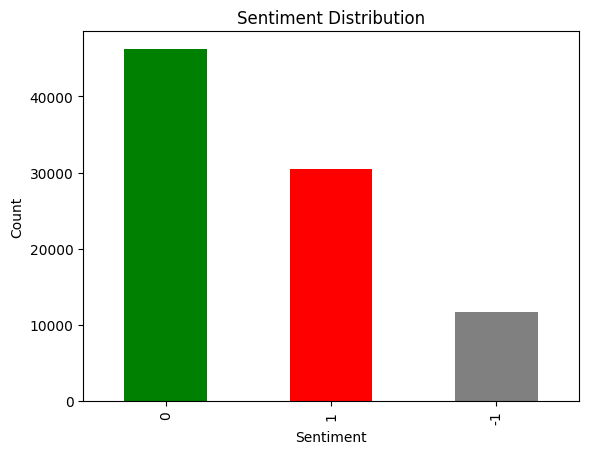

In [ ]:

# Plotting the sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Ploting the Polarity from the dataset

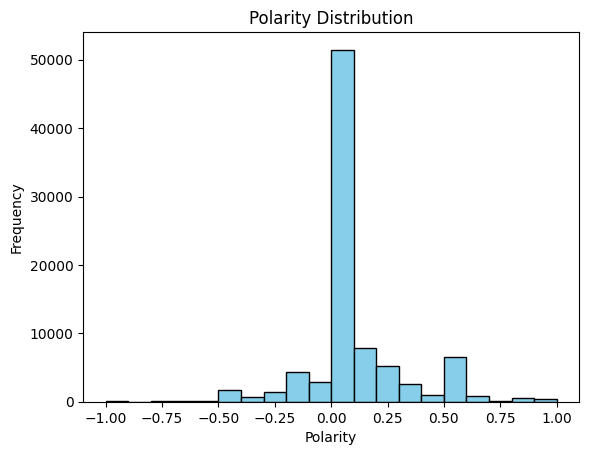

In [ ]:

# Plotting the polarity distribution
plt.hist(df['polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()


Ploting the Posts with respect to time

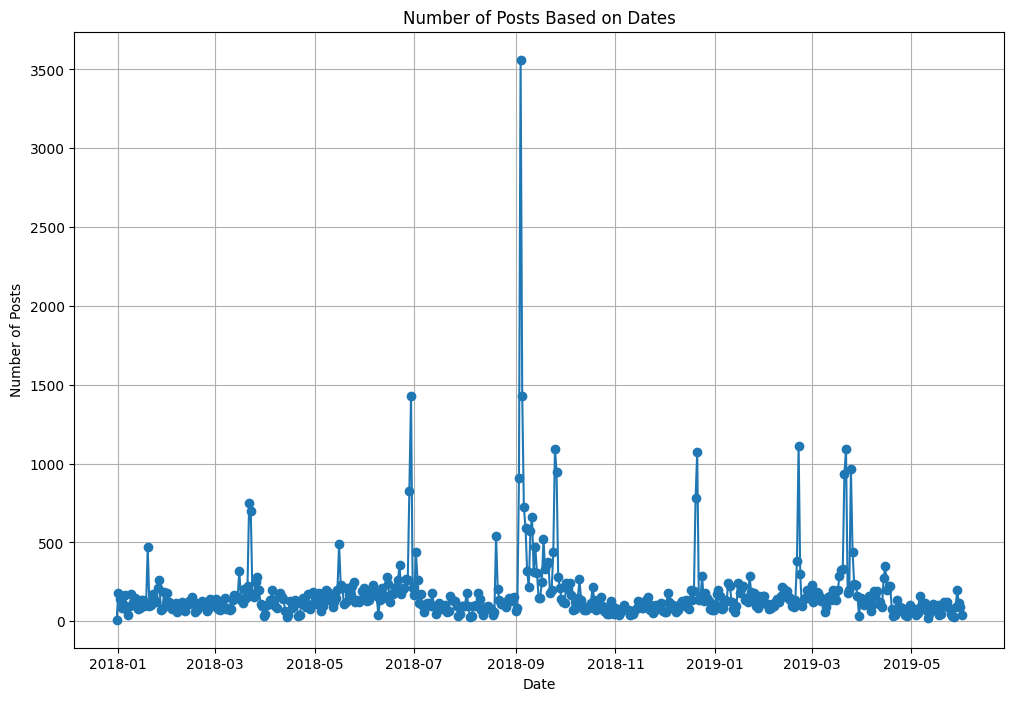

In [ ]:
# Setting date in format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date and counting the number of posts
posts_by_date = df.groupby('Date').size().reset_index(name='Number of Posts')

# Plotting the Number of Posts based on Dates
plt.figure(figsize=(12, 8))
plt.plot(posts_by_date['Date'], posts_by_date['Number of Posts'], marker='o')
plt.title('Number of Posts Based on Dates')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()

Checking Top 10 Posts by Followers Count

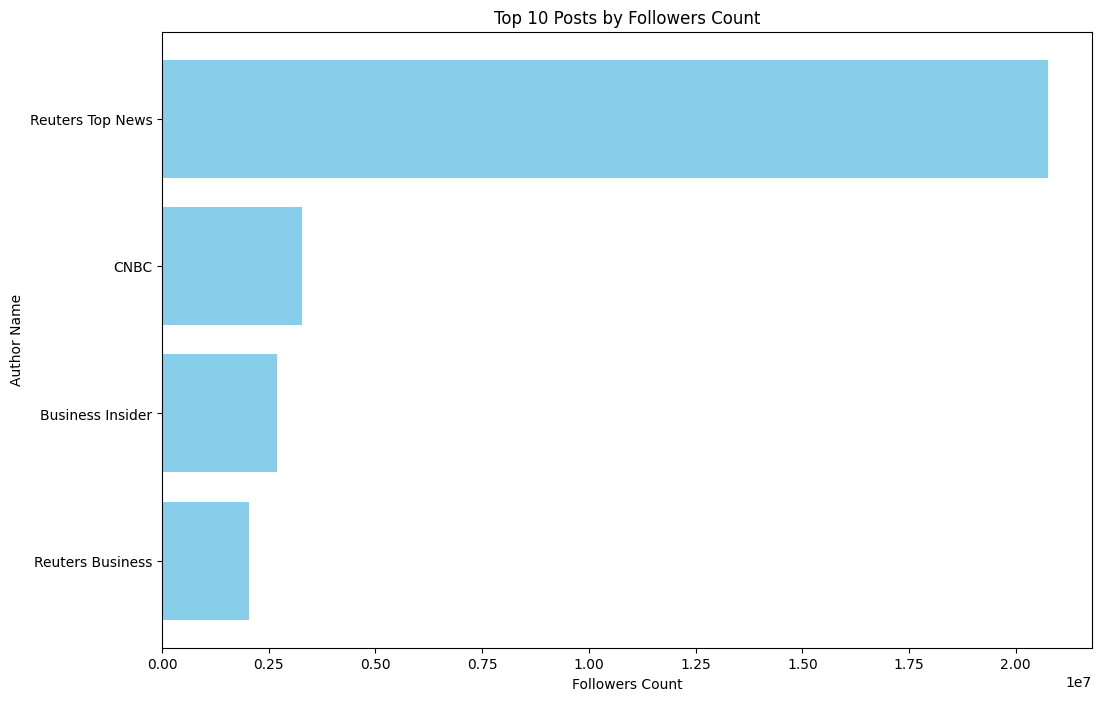

In [ ]:
# Getting the top 10 'followers_count' in descending order
top_10_posts = df.sort_values(by='followers_count', ascending=False).head(50)

# Plotting the top 10 user account who have most followers
plt.figure(figsize=(12, 8))
plt.barh(top_10_posts['name'], top_10_posts['followers_count'], color='skyblue')
plt.xlabel('Followers Count')
plt.ylabel('Author Name')
plt.title('Top 10 Posts by Followers Count')
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest count at the top
plt.show()


Followers count with polarity

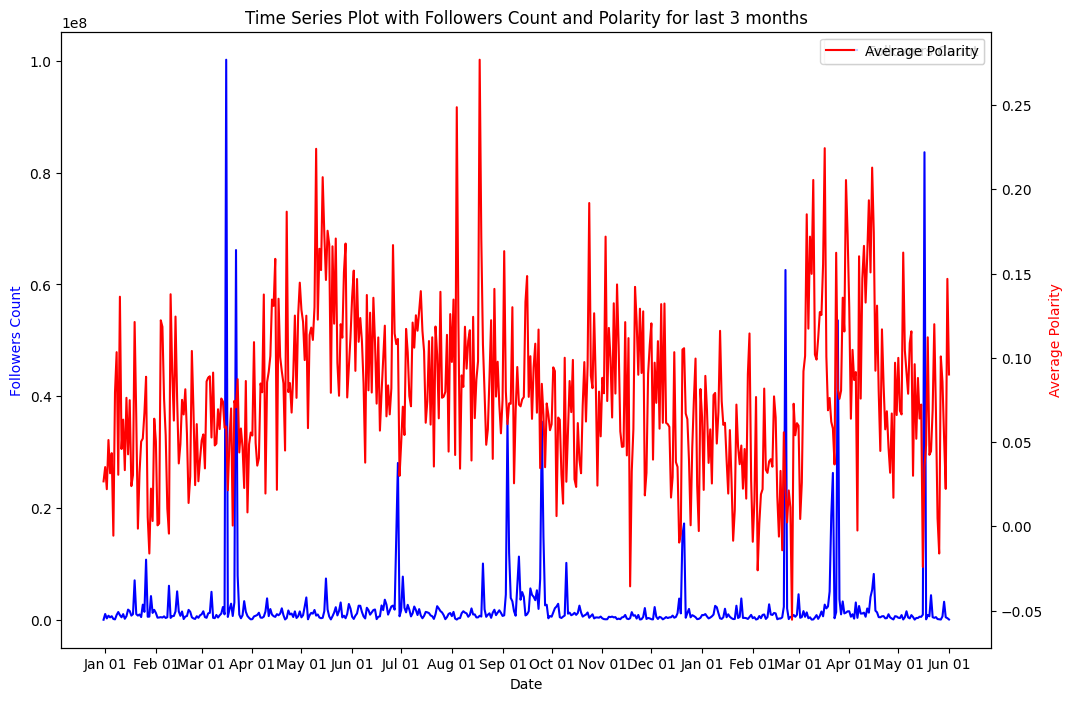

In [ ]:
# Library for certain dates extract
import matplotlib.dates as mdates

# Grouping by date and aggregating followers_count and polarity
agg_df = df.groupby('Date').agg({'followers_count': 'sum', 'polarity': 'mean'}).reset_index()

# Plotting time series with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting followers_count on the left y-axis
sns.lineplot(x='Date', y='followers_count', data=agg_df, ax=ax1, color='b', label='Followers Count')
ax1.set_xlabel('Date')
ax1.set_ylabel('Followers Count', color='b')

# Formatting x-axis ticks
ax1.xaxis.set_major_locator(mdates.MonthLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

# Creating a second y-axis for polarity
ax2 = ax1.twinx()
sns.lineplot(x='Date', y='polarity', data=agg_df, ax=ax2, color='r', label='Average Polarity')
ax2.set_ylabel('Average Polarity', color='r')

plt.title('Time Series Plot with Followers Count and Polarity for last 3 months')
plt.show()


##Correlation

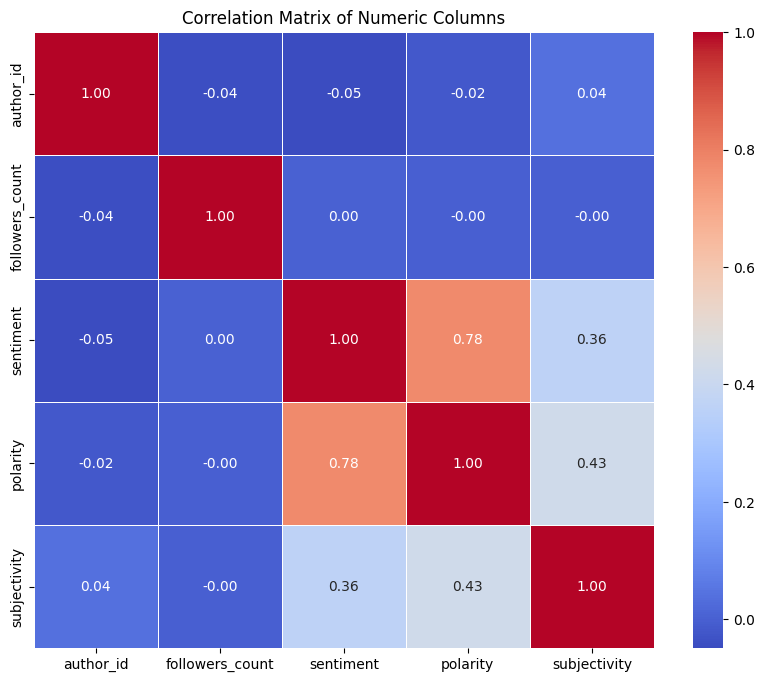

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with numeric columns
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()


#Text Pre Processing

## Check for null values and remove them

In [ ]:
# Getting  regular expressions Library
import re

# Function to remove stock tags to make sentences simple
def remove_words_except_stocktag(text):
    if pd.isna(text):
        return text

    words = text.split()
    filtered_words = [word for word in words if not word.startswith('$') or word == '$MSFT']
    return ' '.join(filtered_words)

# Apply the custom function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_words_except_stocktag)


In [ ]:
# Function to remove URLs from the text
def remove_urls_and_twitter(text):
    if pd.isna(text):
        return text

    # Remove URLs starting with http/https and Twitter-like patterns
    cleaned_text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+|//twitter\.com/\S+|pic\.twitter\.com/\S+', '', text)
    return cleaned_text.strip()

# Apply the custom function to the 'text' column
df['cleaned_text'] = df['text'].apply(remove_urls_and_twitter)



In [ ]:
# Check for null values in the DataFrame
null_values = df.isnull().sum()
# Display the columns with null values (if any)
print("Columns with null values:")
print(null_values[null_values > 0])


Columns with null values:
Series([], dtype: int64)


In [ ]:
# Remove rows with null values
df = df.dropna()

In [ ]:
df.shape

(101195, 9)

In [ ]:
df.head()

Date           author_id                name  \
0 2017-12-31  887052326472740866    Stock News Times   
1 2017-12-31  888125801903775744         Week Herald   
2 2017-12-31           364589590  Exact Option Picks   
3 2017-12-31  925001257663811584        shortvolumes   
4 2017-12-31  887052326472740866    Stock News Times   

                                                text  followers_count  \
0  Nike Inc $NKE Shares Sold by Park National Cor...              788   
1  Nike Inc $NKE Receives $62.39 Consensus Target...              565   
2  ACTIVE TRADERS Try one of these FREE trading g...              472   
3  2017-12-29 Short volume percent for $EWC is 71...              921   
4  Nike Inc $NKE Shares Sold by Park National Cor...              787   

   sentiment  polarity  subjectivity  \
0          0  0.000000           0.0   
1          0  0.000000           0.0   
2          1  0.133333           0.7   
3          0  0.000000           0.3   
4          0  0.000000           0.0   

                                        cleaned_text  
0  Nike Inc $NKE Shares Sold by Park National Cor...  
1  Nike Inc $NKE Receives $62.39 Consensus Target...  
2  ACTIVE TRADERS Try one of these FREE trading g...  
3  2017-12-29 Short volume percent for $EWC is 71...  
4  Nike Inc $NKE Shares Sold by Park National Cor...

##Checking Missing Values and Dublicates

In [ ]:
# Function for Missing Value/Empty Values in whole dataframe
def missing_value_analysis(dataframe):
    # Check for missing values in the dataframe
    missing_values = dataframe.isnull().sum()

    # Print the missing values for each feature
    print("Missing Values Analysis:")
    print(missing_values[missing_values > 0])

# Apply missing value analysis to your social media dataset
missing_value_analysis(df)


Missing Values Analysis:
Series([], dtype: int64)


In [ ]:
# # Function for Duplicated Variable Analysis
# def duplicated_variable_analysis(dataframe):
#     # Check for duplicated columns
#     duplicated_columns = dataframe.columns[dataframe.T.duplicated()]

#     # Print the duplicated columns
#     print("Duplicated Variable Analysis:")
#     print(duplicated_columns)

#     # Remove duplicated columns from the dataframe
#     dataframe = dataframe.loc[:, ~dataframe.columns.duplicated()]

#     return dataframe

# # Apply duplicated variable analysis to your social media dataset
# df = duplicated_variable_analysis(df)


##Removing Links and urls

In [ ]:
#Importing necessery Libraries for cleaning texts
from html import unescape
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Instantiate the lemmatizer and tokenizer for text
lemmatizer = WordNetLemmatizer()
tokenizer = TweetTokenizer()

# Get English stopwords
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove HTML encodings
    text = unescape(text)

    # Remove user IDs
    text = re.sub(r'@[^\s]+', '', text)

    # Remove retweet symbols
    text = re.sub(r'^RT[\s]+', '', text)

    # Replace URLs in different forms
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '_url', text)

    # Tokenize and lemmatize the senteces into words
    words = tokenizer.tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words]

    # Remove stopwords
    words = [word for word in words if word.lower() not in stop_words]

    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)

    return cleaned_text

# Apply the cleaning function to the 'cleaned_text' column
df['cleaned_text'] = df['cleaned_text'].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


##Checking Spellings and Contractions

In [ ]:

# # Function for Correcting the spell mistakes


# # Function to normalize the elongated words
# def correct_word_elongation(text):
#     # Correct word elongation, e.g., 'victoryyyyy' to 'victory'
#     text = re.sub(r'(\w)\1+', r'\1\1', text)
#     return text

# # Function for
# def correct_contractions(text):
#     # Correct common word contractions
#     text = re.sub(r"won't", "will not", text)
#     text = re.sub(r"can't", "cannot", text)
#     text = re.sub(r"don't", "do not", text)
#     text = re.sub(r"shouldn't", "should not", text)
#     text = re.sub(r"didn't", "did not", text)
#     return text

# def clean_numeric_symbols(text):
#     # Remove unnecessary apostrophes and punctuation splits from the last word in a sentence
#     text = re.sub(r"'\s", "", text)
#     text = re.sub(r"(\S+)'\Z", r"\1", text)

#     # Verify numeric value types, such as float and whole numbers
#     # Join symbols with their respective words, e.g., '$ AAPL' to '$AAPL'
#     text = re.sub(r'(\$)\s?([A-Za-z]+)', r'\1\2', text)

#     return text

# # Apply the all above functions to the 'cleaned_text' column
# df['cleaned_text'] = df['cleaned_text'].apply(correct_spelling_mistakes)
# df['cleaned_text'] = df['cleaned_text'].apply(correct_word_elongation)
# df['cleaned_text'] = df['cleaned_text'].apply(correct_contractions)
# df['cleaned_text'] = df['cleaned_text'].apply(clean_numeric_symbols)


In [ ]:
# Function to correct the end of words
def correct_apostrophes_and_punctuation(text):
    # Correct unnecessary apostrophes at the end of words
    text = re.sub(r'(\w+)’', r'\1\'', text)

    # Correct punctuation splits from the last word in a sentence
    text = re.sub(r'(\w+)([.,;!?])\s*$', r'\1\2', text)

    return text

df['cleaned_text'] = df['cleaned_text'].apply(correct_apostrophes_and_punctuation)

In [ ]:
# Getting Library for for pluralizing and singularizing English words
import inflect

# Function to convert extensions in integers
def convert_ordinal_words(text):
    # Initialize the inflect engine
    p = inflect.engine()

    # Split the text into words and process each word
    words = text.split()
    for i, word in enumerate(words):
        # Check if the word is an ordinal word (e.g., '1st', '#1')
        if word.lower() in ['1st', '#1', '2nd', '3rd'] or word.lower().endswith(('th', 'nd', 'rd', 'st')):
            # Extract the numeric part before 'st', 'nd', 'rd', or 'th'
            numeric_part = word[:-2] if word[:-2].isdigit() else word[:-3]

            try:
                # Convert the ordinal word to its numeric counterpart
                numeric_representation = p.ordinal(int(numeric_part))
                words[i] = numeric_representation
            except ValueError:
                # Handle the case where conversion to int fails
                pass

    # Rejoin the words to form the corrected text
    corrected_text = ' '.join(words)

    return corrected_text

df['cleaned_text'] = df['cleaned_text'].apply(convert_ordinal_words)

In [ ]:
df.head()

Date           author_id                name  \
0 2017-12-31  887052326472740866    Stock News Times   
1 2017-12-31  888125801903775744         Week Herald   
2 2017-12-31           364589590  Exact Option Picks   
3 2017-12-31  925001257663811584        shortvolumes   
4 2017-12-31  887052326472740866    Stock News Times   

                                                text  followers_count  \
0  Nike Inc $NKE Shares Sold by Park National Cor...              788   
1  Nike Inc $NKE Receives $62.39 Consensus Target...              565   
2  ACTIVE TRADERS Try one of these FREE trading g...              472   
3  2017-12-29 Short volume percent for $EWC is 71...              921   
4  Nike Inc $NKE Shares Sold by Park National Cor...              787   

   sentiment  polarity  subjectivity  \
0          0  0.000000           0.0   
1          0  0.000000           0.0   
2          1  0.133333           0.7   
3          0  0.000000           0.3   
4          0  0.000000           0.0   

                                        cleaned_text  
0   Nike Inc $ NKE Shares Sold Park National Corp OH  
1  Nike Inc $ NKE Receives $ 62.39 Consensus Targ...  
2  ACTIVE TRADERS Try one FREE trading guide : $ ...  
3  2017-12- 29 Short volume percent $ EWC 71 % . ...  
4   Nike Inc $ NKE Shares Sold Park National Corp OH

Removing the other specific URLs like twitter.com

In [ ]:

# Function to remove specific patterns
def remove_patterns(text):
    patterns_to_remove = [
        r'pic.twitter.com/\S+',  # Remove pic.twitter.com URLs
        r'\$\w+',                # Remove $ followed by a name
        r'https://twitter.com/\S+',  # Remove Twitter URLs
        r'http[s]?://\S+',       # Remove other URLs
        r'\d+'                   # Remove numbers
    ]
    for pattern in patterns_to_remove:
        text = re.sub(pattern, '', text)
    return text

# Apply the function to the 'text' column
df['cleaned_text'] = df['cleaned_text'].apply(remove_patterns)

Removing different URLs patterns

In [ ]:
#  Function to remove specific patterns in URLs
def remove_patterns(text):
    patterns_to_remove = [
        r'pic.twitter.com/\S+',  # Remove pic.twitter.com URLs
        r'\$\w+',                # Remove $ followed by a name
        r'https://twitter.com/\S+',  # Remove Twitter URLs
        r'http[s]?://\S+',       # Remove other URLs
        r'\d+',                  # Remove numbers
        r'#\w+',                 # Remove hashtags
        r'\(Min[^)]+\)',         # Remove patterns like (Min , Daily EMA > , Close > EMA, Vol > K, Opt Vol in any strike > )
        r'-{2,}',                # Remove consecutive dashes
        r'\d+\%',                # Remove percentages
        r'\.\.\.+',              # Remove ellipses
        r'@\w+',                 # Remove mentions
        r',\s+',                 # Remove commas followed by spaces
        r'\s+[.,]+',             # Remove spaces followed by dots or commas
        r'\s+\.{3}',             # Remove spaces followed by three dots
        r'\s+[^\w\s]',           # Remove other non-alphanumeric characters
    ]
    for pattern in patterns_to_remove:
        text = re.sub(pattern, ' ', text)
    return text.strip()

# Apply the function to the 'text' column
df['cleaned_text'] = df['cleaned_text'].apply(remove_patterns)



## Spacy for Core Meaning Extraction

In [ ]:
!pip install spacy


In [ ]:
import pandas as pd
import spacy

# Load spaCy model from web
nlp = spacy.load("en_core_web_sm")

# Function to extract the core meaning from text
def extract_core_meaning(text):
    doc = nlp(text)
    core_meaning = ' '.join([token.lemma_ for token in doc if token.pos_ not in ('PUNCT', 'SPACE')])

    return core_meaning

# Apply the function to the 'cleaned_text' column
df['core_meaning'] = df['cleaned_text'].apply(extract_core_meaning)


In [ ]:
df.head()

##Tokenization

In [ ]:
#If the Spacy is taking too long time you can use this code to directly assign cleaned code as core meaning because it's almost neat
df['core_meaning'] = df['cleaned_text']

In [ ]:
#mporting Tokenization Libraries

from bs4 import BeautifulSoup              # Parsing HTML content

import nltk                                # Natural Language Toolkit for working with human language data
from nltk.tokenize import word_tokenize    # tokenizing sentences into words
from nltk.corpus import stopwords          # Remove common words
from nltk.stem import PorterStemmer        # For stemming, reducing words to their base or root form


nltk.download('punkt')

# Tokenization of sentences into words
df['tokens'] = df['core_meaning'].apply(lambda x: word_tokenize(x))

# Removing Stop Words
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Joining Tokens and finalizing it as clean tweets
df['clean_tweets'] = df['tokens'].apply(lambda x: ' '.join(x))


In [ ]:
df.head()

Date           author_id                name  \
0 2017-12-31  887052326472740866    Stock News Times   
1 2017-12-31  888125801903775744         Week Herald   
2 2017-12-31           364589590  Exact Option Picks   
3 2017-12-31  925001257663811584        shortvolumes   
4 2017-12-31  887052326472740866    Stock News Times   

                                                text  followers_count  \
0  Nike Inc $NKE Shares Sold by Park National Cor...              788   
1  Nike Inc $NKE Receives $62.39 Consensus Target...              565   
2  ACTIVE TRADERS Try one of these FREE trading g...              472   
3  2017-12-29 Short volume percent for $EWC is 71...              921   
4  Nike Inc $NKE Shares Sold by Park National Cor...              787   

   sentiment  polarity  subjectivity  \
0          0  0.000000           0.0   
1          0  0.000000           0.0   
2          1  0.133333           0.7   
3          0  0.000000           0.3   
4          0  0.000000           0.0   

                                        cleaned_text  \
0    Nike Inc  NKE Shares Sold Park National Corp OH   
1  Nike Inc  NKE Receives   Consensus Target Pric...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH   

                                        core_meaning  \
0    Nike Inc  NKE Shares Sold Park National Corp OH   
1  Nike Inc  NKE Receives   Consensus Target Pric...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH   

                                              tokens  \
0  [Nike, Inc, NKE, Shares, Sold, Park, National,...   
1  [Nike, Inc, NKE, Receives, Consensus, Target, ...   
2  [ACTIVE, TRADERS, Try, one, FREE, trading, gui...   
3  [Short, volume, percent, EWC, ATOS, LPI, NKE, ...   
4  [Nike, Inc, NKE, Shares, Sold, Park, National,...   

                                        clean_tweets  
0     Nike Inc NKE Shares Sold Park National Corp OH  
1  Nike Inc NKE Receives Consensus Target Price A...  
2  ACTIVE TRADERS Try one FREE trading guide NFLX...  
3         Short volume percent EWC ATOS LPI NKE NUGT  
4     Nike Inc NKE Shares Sold Park National Corp OH

#VADER Sentiment Analysis

In [ ]:
# Import the SentimentIntensityAnalyzer from the NLTK's VADER module
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Import the nltk library
import nltk

# Download the VADER lexicon which is a pre-built list of words and their sentiment scores
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
# Function to apply VADER sentiment analysis and create 'vader_sentiment_score' column
def get_vader_sentiment(row):
    # Use the VADER sentiment analyzer on the cleaned text
    sentiment_scores = sia.polarity_scores(row['clean_tweets'])

    # Assign the compound sentiment score to a new column 'vader_sentiment_score'
    row['vader_sentiment_score'] = sentiment_scores['compound']

    return row


In [ ]:
# Apply the function to each row in the DataFrame
df = df.apply(get_vader_sentiment, axis=1)


In [ ]:
df.head()

Date           author_id                name  \
0 2017-12-31  887052326472740866    Stock News Times   
1 2017-12-31  888125801903775744         Week Herald   
2 2017-12-31           364589590  Exact Option Picks   
3 2017-12-31  925001257663811584        shortvolumes   
4 2017-12-31  887052326472740866    Stock News Times   

                                                text  followers_count  \
0  Nike Inc $NKE Shares Sold by Park National Cor...              788   
1  Nike Inc $NKE Receives $62.39 Consensus Target...              565   
2  ACTIVE TRADERS Try one of these FREE trading g...              472   
3  2017-12-29 Short volume percent for $EWC is 71...              921   
4  Nike Inc $NKE Shares Sold by Park National Cor...              787   

   sentiment  polarity  subjectivity  \
0          0  0.000000           0.0   
1          0  0.000000           0.0   
2          1  0.133333           0.7   
3          0  0.000000           0.3   
4          0  0.000000           0.0   

                                        cleaned_text  \
0    Nike Inc  NKE Shares Sold Park National Corp OH   
1  Nike Inc  NKE Receives   Consensus Target Pric...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH   

                                        core_meaning  \
0    Nike Inc  NKE Shares Sold Park National Corp OH   
1  Nike Inc  NKE Receives   Consensus Target Pric...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH   

                                              tokens  \
0  [Nike, Inc, NKE, Shares, Sold, Park, National,...   
1  [Nike, Inc, NKE, Receives, Consensus, Target, ...   
2  [ACTIVE, TRADERS, Try, one, FREE, trading, gui...   
3  [Short, volume, percent, EWC, ATOS, LPI, NKE, ...   
4  [Nike, Inc, NKE, Shares, Sold, Park, National,...   

                                        clean_tweets  vader_sentiment_score  
0     Nike Inc NKE Shares Sold Park National Corp OH                 0.2960  
1  Nike Inc NKE Receives Consensus Target Price A...                 0.0000  
2  ACTIVE TRADERS Try one FREE trading guide NFLX...                 0.8159  
3         Short volume percent EWC ATOS LPI NKE NUGT                 0.0000  
4     Nike Inc NKE Shares Sold Park National Corp OH                 0.2960

#TextBlob Sentiment Analysis

In [ ]:
# Import the TextBlob class from the textblob module
from textblob import TextBlob

# Function to get sentiment score using TextBlob
def get_sentiment_score(tweet):
    # Check if the tweet is empty or NaN
    if not tweet or pd.isnull(tweet):
        return None

    # Create a TextBlob object for the tweet
    blob = TextBlob(tweet)

    # Return the sentiment polarity score
    return blob.sentiment.polarity

# Apply the TextBlob sentiment analysis and create 'TextBlob_sentiment_score' column
df['TextBlob_sentiment_score'] = df['clean_tweets'].apply(get_sentiment_score)


In [ ]:
df.head()

Date           author_id                name  \
0 2017-12-31  887052326472740866    Stock News Times   
1 2017-12-31  888125801903775744         Week Herald   
2 2017-12-31           364589590  Exact Option Picks   
3 2017-12-31  925001257663811584        shortvolumes   
4 2017-12-31  887052326472740866    Stock News Times   

                                                text  followers_count  \
0  Nike Inc $NKE Shares Sold by Park National Cor...              788   
1  Nike Inc $NKE Receives $62.39 Consensus Target...              565   
2  ACTIVE TRADERS Try one of these FREE trading g...              472   
3  2017-12-29 Short volume percent for $EWC is 71...              921   
4  Nike Inc $NKE Shares Sold by Park National Cor...              787   

   sentiment  polarity  subjectivity  \
0          0  0.000000           0.0   
1          0  0.000000           0.0   
2          1  0.133333           0.7   
3          0  0.000000           0.3   
4          0  0.000000           0.0   

                                        cleaned_text  \
0    Nike Inc  NKE Shares Sold Park National Corp OH   
1  Nike Inc  NKE Receives   Consensus Target Pric...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH   

                                        core_meaning  \
0    Nike Inc  NKE Shares Sold Park National Corp OH   
1  Nike Inc  NKE Receives   Consensus Target Pric...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH   

                                              tokens  \
0  [Nike, Inc, NKE, Shares, Sold, Park, National,...   
1  [Nike, Inc, NKE, Receives, Consensus, Target, ...   
2  [ACTIVE, TRADERS, Try, one, FREE, trading, gui...   
3  [Short, volume, percent, EWC, ATOS, LPI, NKE, ...   
4  [Nike, Inc, NKE, Shares, Sold, Park, National,...   

                                        clean_tweets  vader_sentiment_score  \
0     Nike Inc NKE Shares Sold Park National Corp OH                 0.2960   
1  Nike Inc NKE Receives Consensus Target Price A...                 0.0000   
2  ACTIVE TRADERS Try one FREE trading guide NFLX...                 0.8159   
3         Short volume percent EWC ATOS LPI NKE NUGT                 0.0000   
4     Nike Inc NKE Shares Sold Park National Corp OH                 0.2960   

   TextBlob_sentiment_score  
0                  0.000000  
1                  0.000000  
2                  0.133333  
3                  0.000000  
4                  0.000000

# Ploting all Sentiment Scores

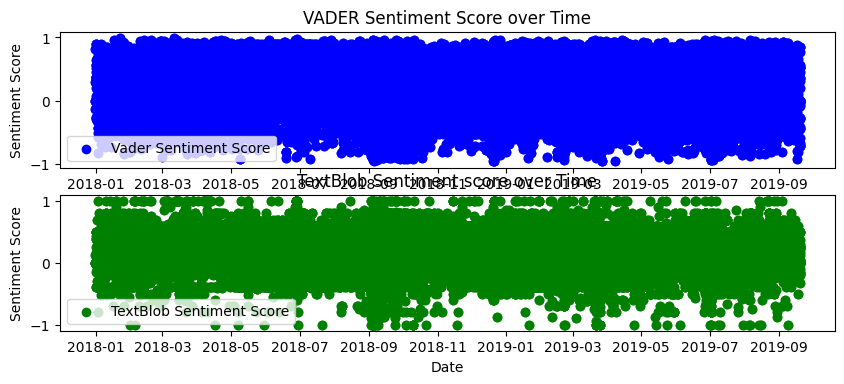

In [ ]:
# Defining the figure size
plt.figure(figsize=(10, 6))

# Plotting Vader Sentiment Score
plt.subplot(3, 1, 1)
plt.scatter(df['Date'], df['vader_sentiment_score'], color='blue', label='Vader Sentiment Score')
plt.title('VADER Sentiment Score over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

# Plotting TextBlob Sentiment Score
plt.subplot(3, 1, 2)
plt.scatter(df['Date'], df['TextBlob_sentiment_score'], color='green', label='TextBlob Sentiment Score')
plt.title('TextBlob Sentiment score over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()


Monthly Aggregated Sentimental Score

<ipython-input-94-9db49f592f4a>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()


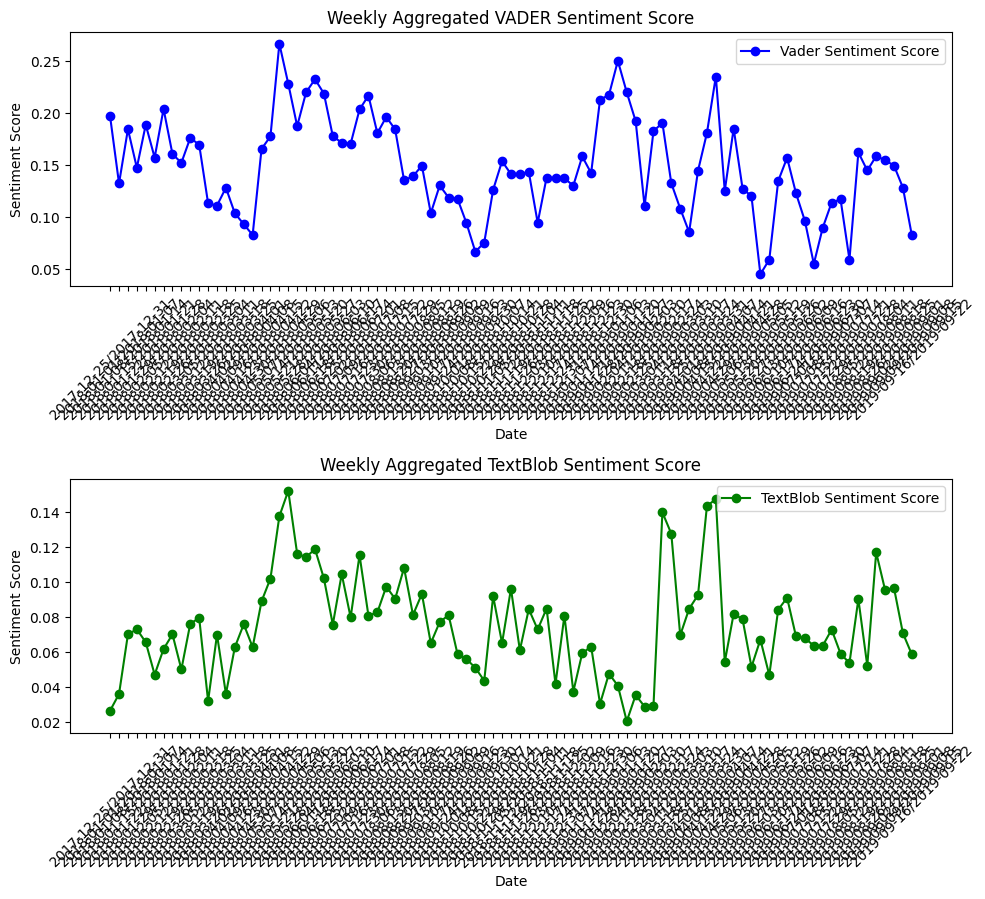

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Weekly aggregation of sentiment scores
df_weekly = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()

# Convert 'Date' to string
df_weekly['Date'] = df_weekly['Date'].astype(str)

# Defining the figure size
plt.figure(figsize=(10, 12))  # Increase figure height for gaps

# Plotting Vader Sentiment Score
plt.subplot(3, 1, 1)
plt.plot(df_weekly['Date'], df_weekly['vader_sentiment_score'], color='blue', label='Vader Sentiment Score', marker='o')
plt.title('Weekly Aggregated VADER Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

# Add some space between subplots
plt.subplots_adjust(hspace=0.5)

# Plotting TextBlob Sentiment Score
plt.subplot(3, 1, 2)
plt.plot(df_weekly['Date'], df_weekly['TextBlob_sentiment_score'], color='green', label='TextBlob Sentiment Score', marker='o')
plt.title('Weekly Aggregated TextBlob Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


#Final Sentiment Score

In [ ]:
# Make a new column final_sentiment_score by meaning the three sentiment scores
# Define weights for each sentiment score
vader_weight = 0.7
textblob_weight = 0.3


# Calculate the weighted average
df['final_sentiment_score'] = (df['vader_sentiment_score'] * vader_weight +
                               df['TextBlob_sentiment_score'] * textblob_weight)



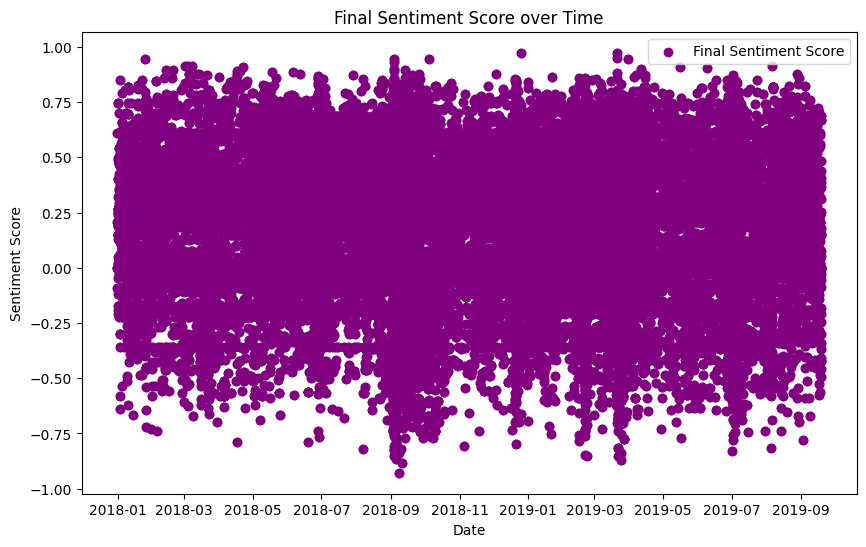

In [ ]:

# Plotting 'final_sentiment_score' over time
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['final_sentiment_score'], color='purple', label='Final Sentiment Score')
plt.title('Final Sentiment Score over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


<ipython-input-97-e67e1c13b436>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()


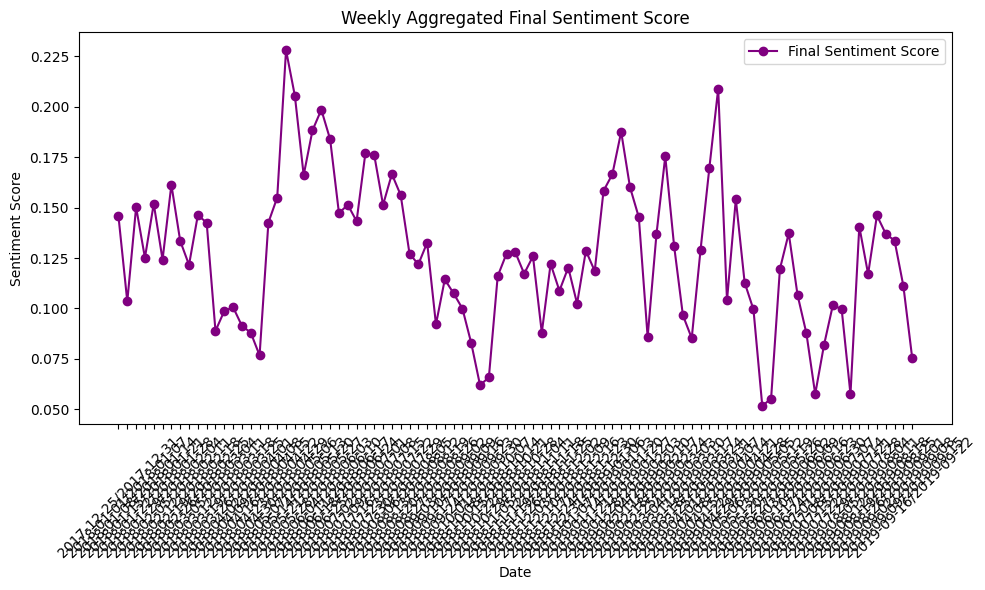

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Weekly aggregation of final_sentiment_score
df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()

# Convert 'Date' to string
df_weekly_final['Date'] = df_weekly_final['Date'].astype(str)

# Defining the figure size
plt.figure(figsize=(10, 6))

# Plotting Final Sentiment Score
plt.plot(df_weekly_final['Date'], df_weekly_final['final_sentiment_score'], color='purple', label='Final Sentiment Score', marker='o')
plt.title('Weekly Aggregated Final Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


<ipython-input-98-70eb45e4c302>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_monthly_final = df.groupby(df['Date'].dt.to_period("M")).mean().reset_index()


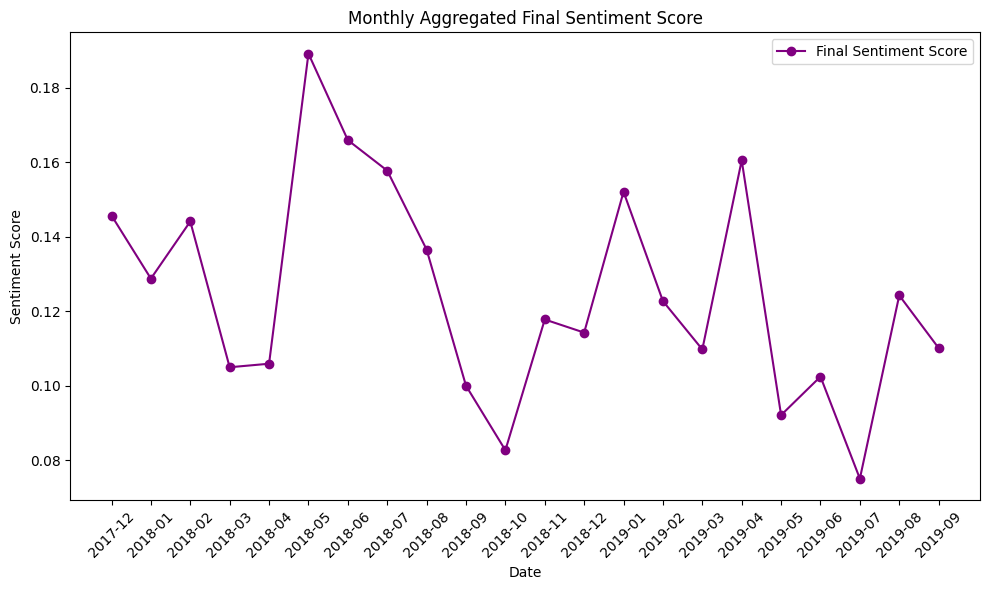

In [ ]:
# Monthly aggregation of final_sentiment_score
df_monthly_final = df.groupby(df['Date'].dt.to_period("M")).mean().reset_index()

# Convert 'Date' to string
df_monthly_final['Date'] = df_monthly_final['Date'].astype(str)

# Defining the figure size
plt.figure(figsize=(10, 6))

# Plotting Final Sentiment Score
plt.plot(df_monthly_final['Date'], df_monthly_final['final_sentiment_score'], color='purple', label='Final Sentiment Score', marker='o')
plt.title('Monthly Aggregated Final Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


#Feature Engineering

## Sentiment Features

In [ ]:
!pip install wordcloud matplotlib

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')

# Separate positive and negative words based on the sentiment score
positive_words = ' '.join(df[df['vader_sentiment_score'] > 0]['text'])
negative_words = ' '.join(df[df['vader_sentiment_score'] < 0]['text'])

# Generate WordCloud for positive words
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_words)

# Generate WordCloud for negative words
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_words)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


(-0.5, 799.5, 399.5, -0.5)

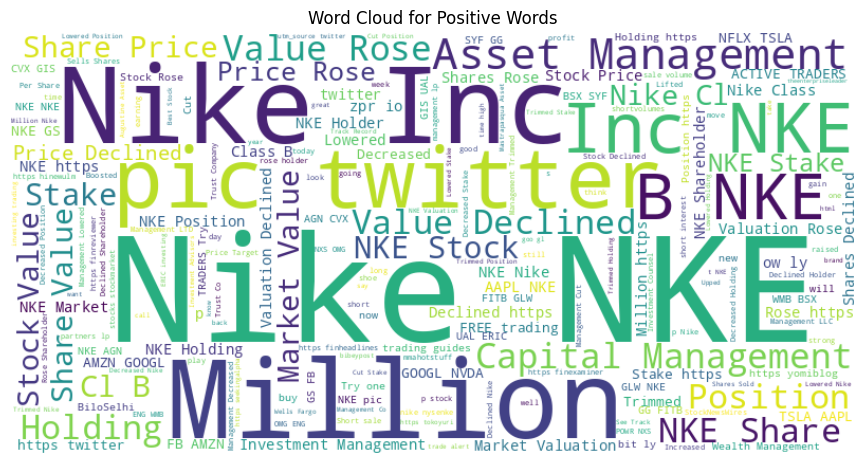

In [ ]:
# Plot WordCloud for positive words
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title('Word Cloud for Positive Words')
plt.axis('off')


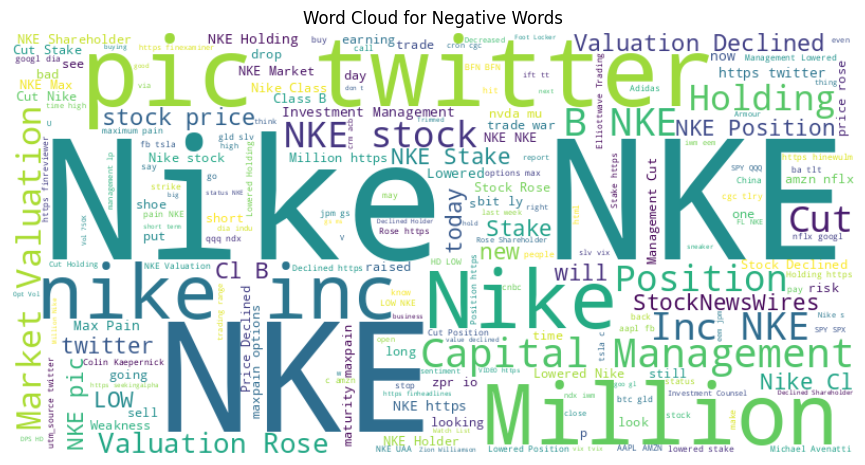

In [ ]:
# Plot WordCloud for negative words
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title('Word Cloud for Negative Words')
plt.axis('off')

plt.show()


##Integer Linguistic Features

In [ ]:
# Function for counting the exclamation and question marks in the text
def count_continuous_punctuation(text, punctuation):
    # Count continuous occurrences of the specified punctuation in the text
    pattern = re.compile(f'{re.escape(punctuation)}+')  # Create a regex pattern for continuous occurrences
    matches = re.findall(pattern, text)  # Find all matches in the text
    return len(matches)  # Return the count of continuous occurrences

# Add 'continuous_exclamation' and 'continuous_question' columns to your DataFrame
df['continuous_exclamation'] = df['cleaned_text'].apply(lambda x: count_continuous_punctuation(x, '!'))
# Count continuous exclamation marks in the 'cleaned_text' column and create a new column 'continuous_exclamation'

df['continuous_question'] = df['cleaned_text'].apply(lambda x: count_continuous_punctuation(x, '?'))
# Count continuous question marks in the 'cleaned_text' column and create a new column 'continuous_question'


In [ ]:
# Function for finding continuous Capital Words because they represent some important information
def count_capitalized_words(text):
    # Count the number of capitalized words in the text
    words = text.split()  # Split the text into a list of words
    capitalized_words = [word for word in words if word.isupper()]  # Create a list of capitalized words
    return len(capitalized_words)  # Return the count of capitalized words

# Add 'capitalized_words' column to your DataFrame
df['capitalized_words'] = df['text'].apply(count_capitalized_words)


In [ ]:
# Funtion to count the dollar signs as they represent the high raise/decrease in stock
def count_dollar_signs(text):
    # Count the number of dollar signs in the text
    return text.count('$')

# Apply to my df
df['dollar_signs'] = df['text'].apply(count_dollar_signs)


In [ ]:
# Counting hashtags to understand the importance of versatility of the posts
def count_hashtags(text):
  return text.count('#')


df['num_hashtags'] = df['text'].apply(count_hashtags)

In [ ]:
# Checking the word count of each sentence
from nltk.tokenize import word_tokenize
from tqdm import tqdm  # showing progress

tqdm.pandas()  # for showing progress


# convert text to string
df['cleaned_text'] = df['cleaned_text'].astype(str)

# Tokenize the cleaned_text column
df['tokens'] = df['cleaned_text'].progress_apply(word_tokenize)

# Calculate word count for each row
df['word_count'] = df['tokens'].apply(len)

# Group by Date and sum the word counts
word_count_by_date = df.groupby('Date')['word_count'].sum().reset_index()



100%|██████████| 88409/88409 [00:13<00:00, 6318.99it/s]


## Plotting Features

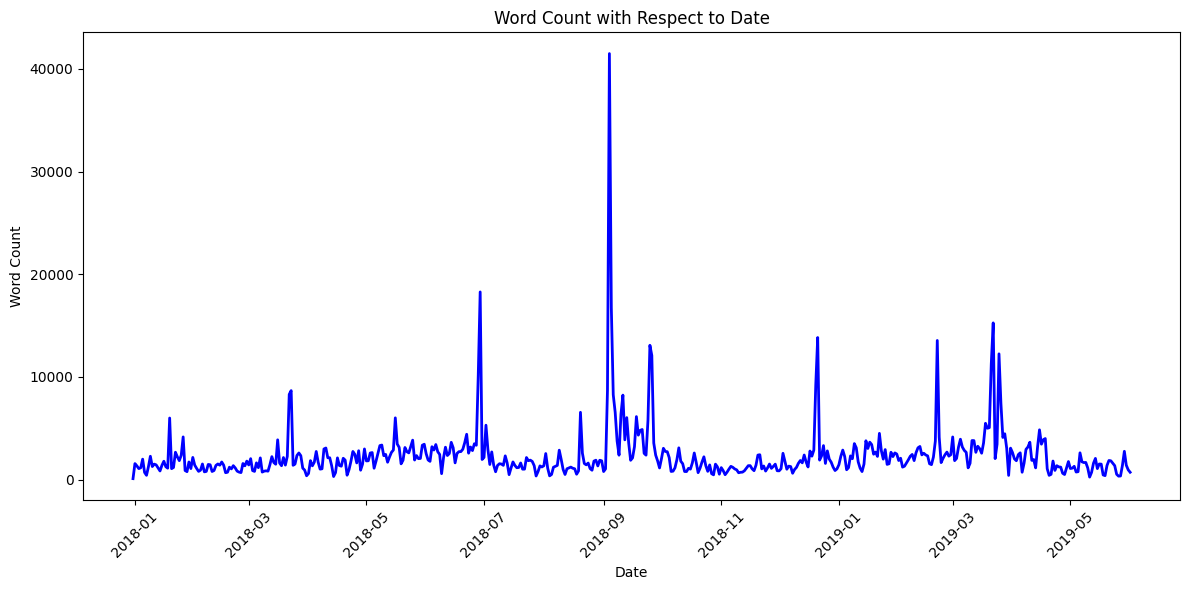

In [ ]:
# Plot the word count with respect to Date using a line graph (no points)
plt.figure(figsize=(12, 6))
plt.plot(word_count_by_date['Date'], word_count_by_date['word_count'], linestyle='-', linewidth=2, color='blue')
plt.title('Word Count with Respect to Date')
plt.xlabel('Date')
plt.ylabel('Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Plotting the Integer Features Count

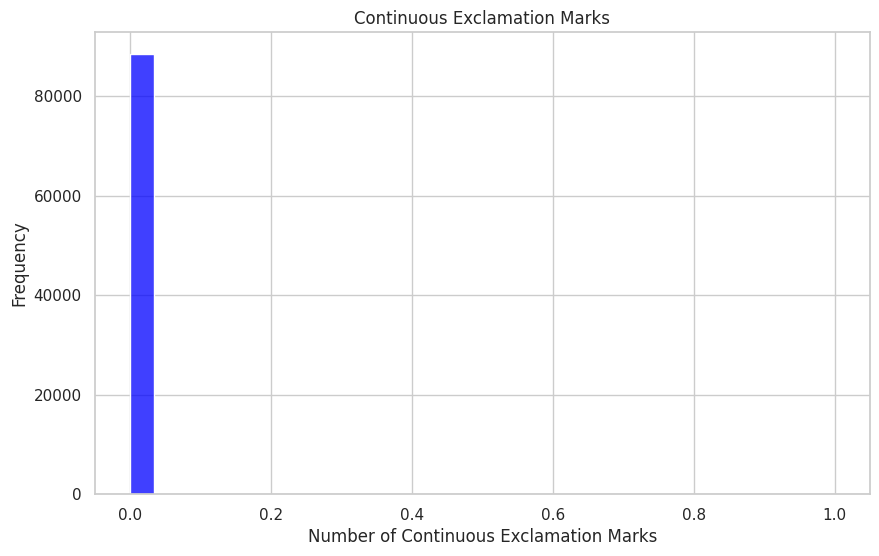

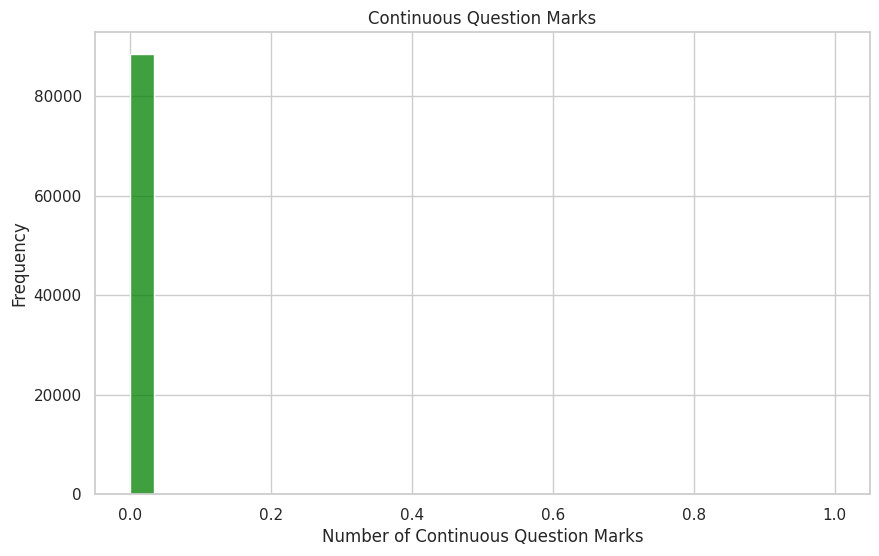

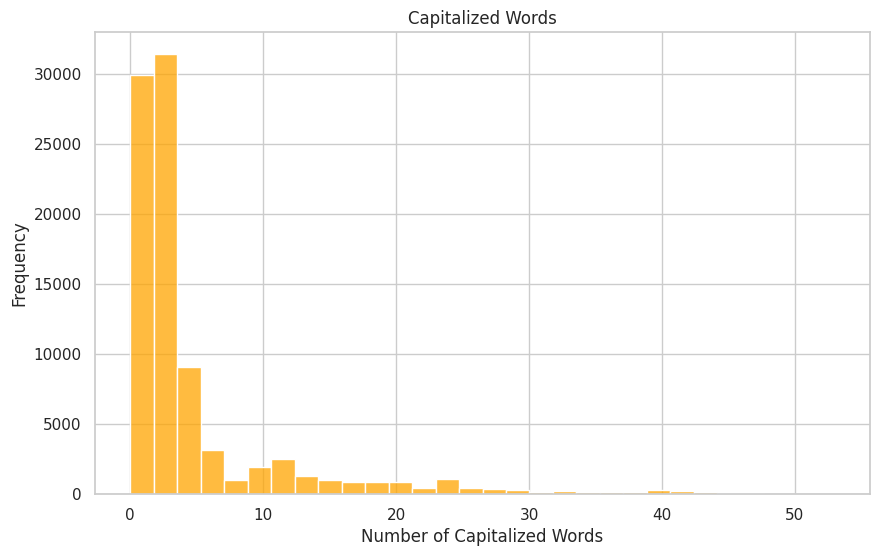

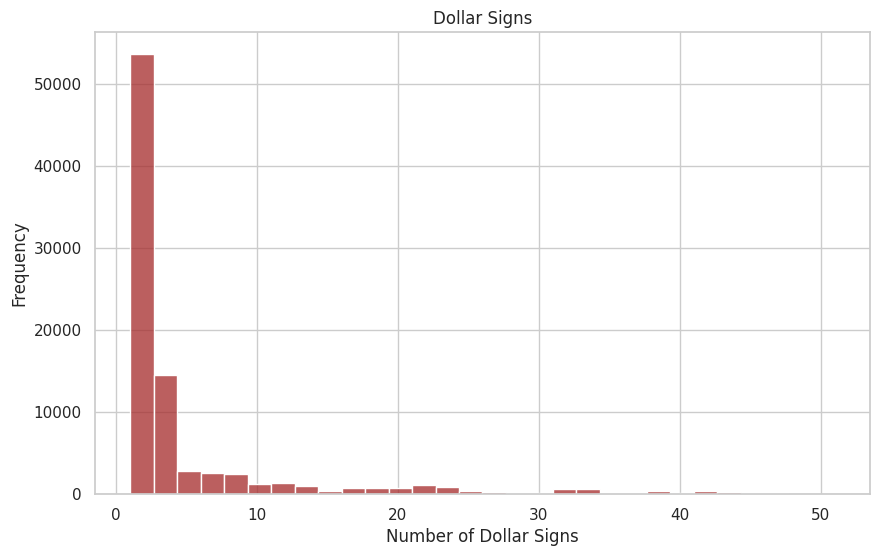

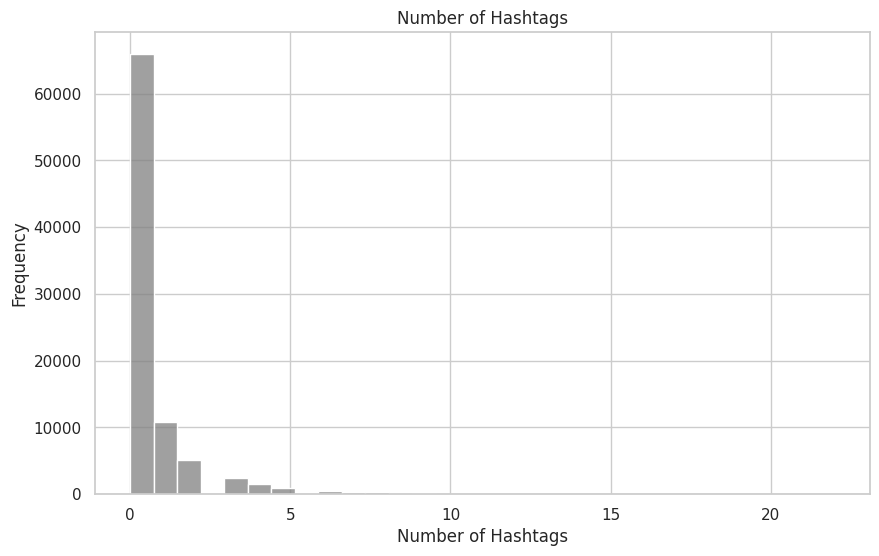

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot continuous exclamation marks
plt.figure(figsize=(10, 6))
sns.histplot(df['continuous_exclamation'], bins=30, kde=False, color='blue')
plt.title('Continuous Exclamation Marks')
plt.xlabel('Number of Continuous Exclamation Marks')
plt.ylabel('Frequency')
plt.show()

# Plot continuous question marks
plt.figure(figsize=(10, 6))
sns.histplot(df['continuous_question'], bins=30, kde=False, color='green')
plt.title('Continuous Question Marks')
plt.xlabel('Number of Continuous Question Marks')
plt.ylabel('Frequency')
plt.show()

# Plot capitalized words
plt.figure(figsize=(10, 6))
sns.histplot(df['capitalized_words'], bins=30, kde=False, color='orange')
plt.title('Capitalized Words')
plt.xlabel('Number of Capitalized Words')
plt.ylabel('Frequency')
plt.show()


# Plot dollar signs
plt.figure(figsize=(10, 6))
sns.histplot(df['dollar_signs'], bins=30, kde=False, color='brown')
plt.title('Dollar Signs')
plt.xlabel('Number of Dollar Signs')
plt.ylabel('Frequency')
plt.show()

# Plot hashtags
plt.figure(figsize=(10, 6))
sns.histplot(df['num_hashtags'], bins=30, kde=False, color='gray')
plt.title('Number of Hashtags')
plt.xlabel('Number of Hashtags')
plt.ylabel('Frequency')
plt.show()


Plotting the Integer Features Count by Date

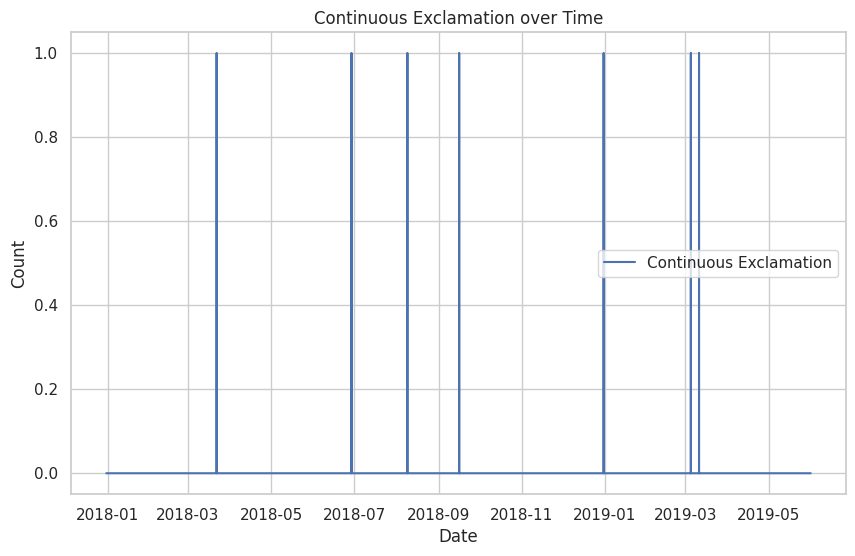

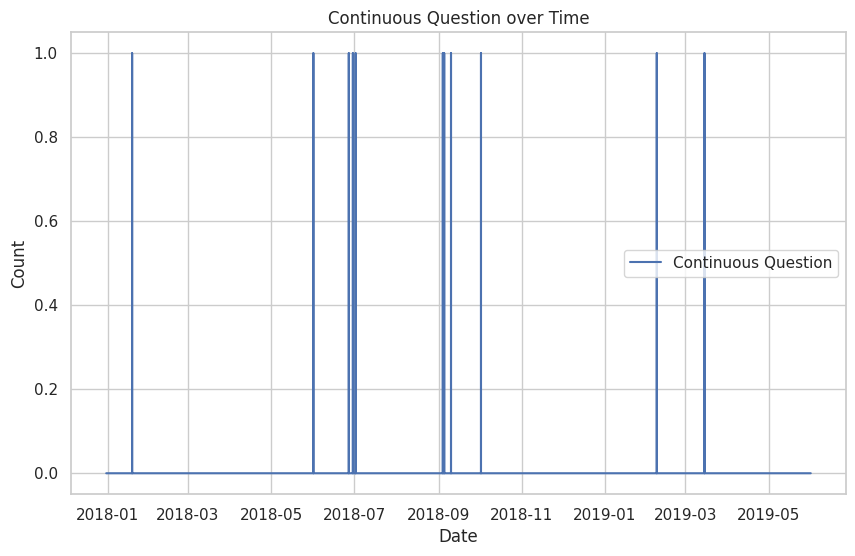

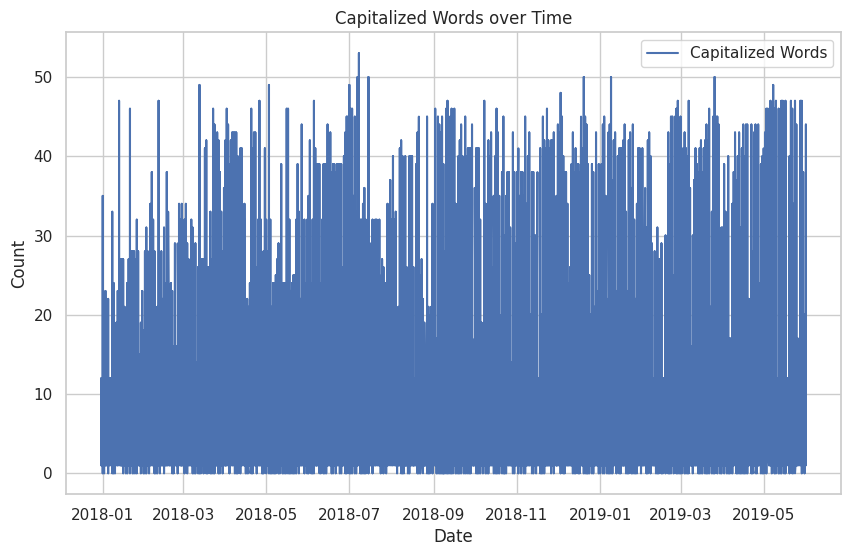

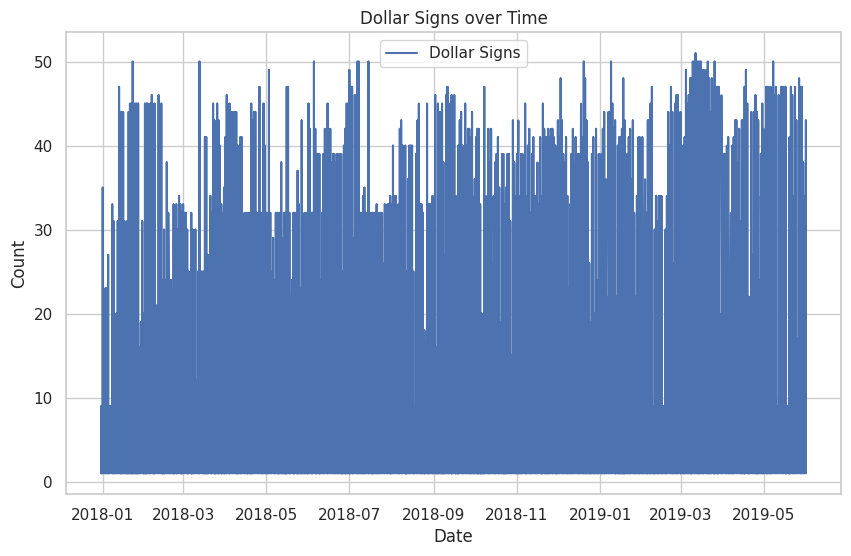

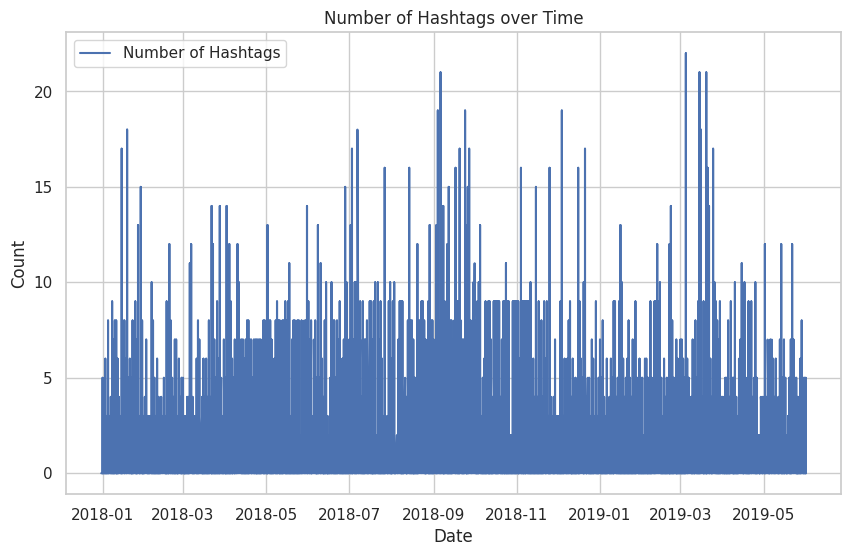

In [ ]:

# Plotting continuous_exclamation
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['continuous_exclamation'], label='Continuous Exclamation')
plt.title('Continuous Exclamation over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting continuous_question
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['continuous_question'], label='Continuous Question')
plt.title('Continuous Question over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting capitalized_words
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['capitalized_words'], label='Capitalized Words')
plt.title('Capitalized Words over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


# Plotting dollar_signs
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['dollar_signs'], label='Dollar Signs')
plt.title('Dollar Signs over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

# Plotting num_hashtags
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['num_hashtags'], label='Number of Hashtags')
plt.title('Number of Hashtags over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


##Likelihood Ratio (LLR)

LLR provides a statistical measure of the strength of association between words, which can be valuable in sentiment analysis by revealing meaningful patterns and helping to extract features for sentiment prediction models.

In [ ]:
import nltk
from nltk import collocations
from nltk.tokenize import word_tokenize

nltk.download('punkt')

# Function to calculate Log-Likelihood Ratio for a given text and return the mean
def calculate_mean_llr(text):
    words = word_tokenize(text.lower())
    finder = collocations.BigramCollocationFinder.from_words(words)

    # Filter out bigrams with frequency less than 1
    finder.apply_freq_filter(1)

    try:
        llr_scores = [score for bigram, score in finder.score_ngrams(collocations.BigramAssocMeasures.likelihood_ratio)]
        # Extract LLR scores
        mean_llr = sum(llr_scores) / len(llr_scores) if llr_scores else 0
        # Calculate the mean of the LLR scores, handling the case where llr_scores is empty
    except ValueError:
        # Handle math domain error by returning 0 for problematic cases
        mean_llr = 0

    return mean_llr

# Apply the function to the 'clean_tweets' column in your DataFrame
df['llr_score'] = df['clean_tweets'].apply(calculate_mean_llr)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df.head()

Date           author_id                name  \
0 2017-12-31  887052326472740866    Stock News Times   
1 2017-12-31  888125801903775744         Week Herald   
2 2017-12-31           364589590  Exact Option Picks   
3 2017-12-31  925001257663811584        shortvolumes   
4 2017-12-31  887052326472740866    Stock News Times   

                                                text  followers_count  \
0  Nike Inc $NKE Shares Sold by Park National Cor...              788   
1  Nike Inc $NKE Receives $62.39 Consensus Target...              565   
2  ACTIVE TRADERS Try one of these FREE trading g...              472   
3  2017-12-29 Short volume percent for $EWC is 71...              921   
4  Nike Inc $NKE Shares Sold by Park National Cor...              787   

   sentiment  polarity  subjectivity  \
0          0  0.000000           0.0   
1          0  0.000000           0.0   
2          1  0.133333           0.7   
3          0  0.000000           0.3   
4          0  0.000000           0.0   

                                        cleaned_text  \
0    Nike Inc  NKE Shares Sold Park National Corp OH   
1  Nike Inc  NKE Receives   Consensus Target Pric...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH   

                                        core_meaning  ...  \
0    Nike Inc  NKE Shares Sold Park National Corp OH  ...   
1  Nike Inc  NKE Receives   Consensus Target Pric...  ...   
2  ACTIVE TRADERS Try one FREE trading guide   NF...  ...   
3  Short volume percent  EWC   ATOS   LPI   NKE  ...  ...   
4    Nike Inc  NKE Shares Sold Park National Corp OH  ...   

  vader_sentiment_score TextBlob_sentiment_score  final_sentiment_score  \
0                0.2960                 0.000000                0.20720   
1                0.0000                 0.000000                0.00000   
2                0.8159                 0.133333                0.61113   
3                0.0000                 0.000000                0.00000   
4                0.2960                 0.000000                0.20720   

   continuous_exclamation  continuous_question  capitalized_words  \
0                       0                    0                  2   
1                       0                    0                  1   
2                       0                    0                 12   
3                       0                    0                  5   
4                       0                    0                  2   

   dollar_signs  num_hashtags  word_count  llr_score  
0             1             0           9   6.278978  
1             2             0           8   6.028323  
2             9             0          16   7.481333  
3             5             0           8   6.028323  
4             1             0           9   6.278978  

[5 rows x 22 columns]

# Correlation Heatmap

Plotting the Correlation Heatmap to understand the relationship between features

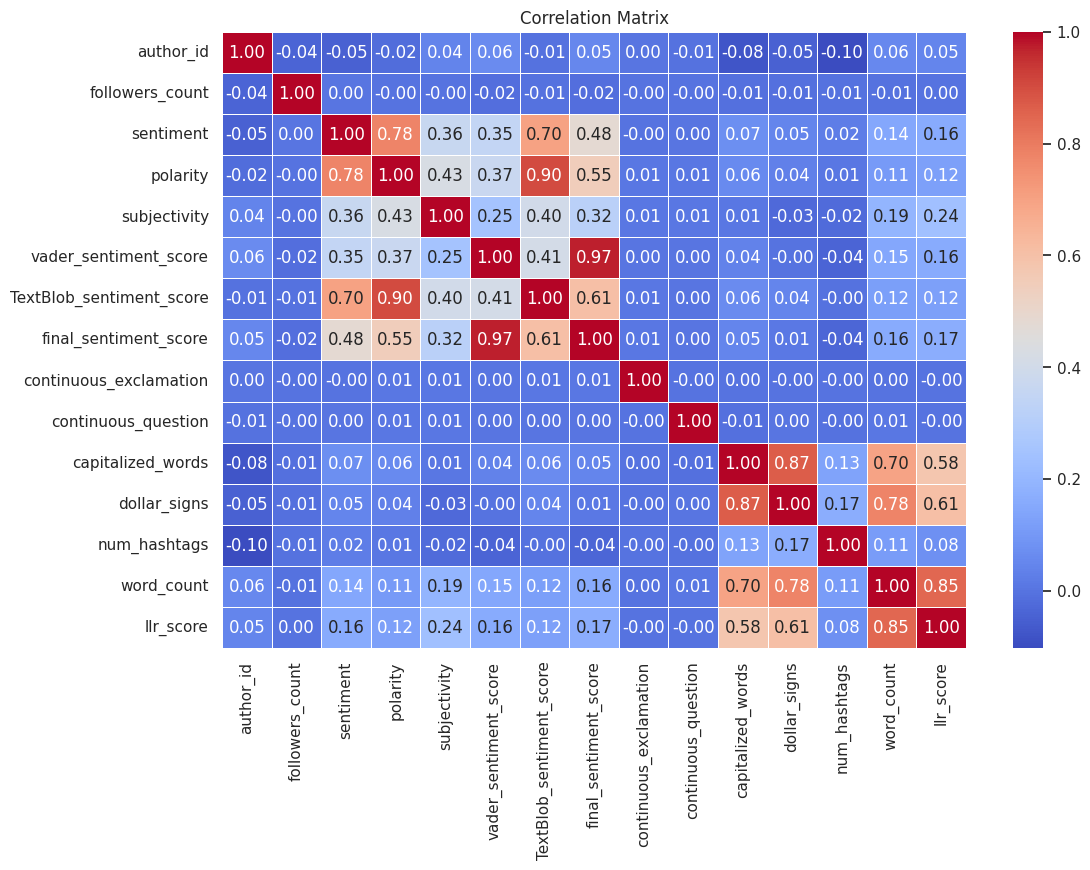

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns, as correlation is applicable to numeric data
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_columns].corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Showing the plot
plt.title('Correlation Matrix')
plt.show()


# Sentiment Score Analysis

<ipython-input-99-8640d22258c1>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()


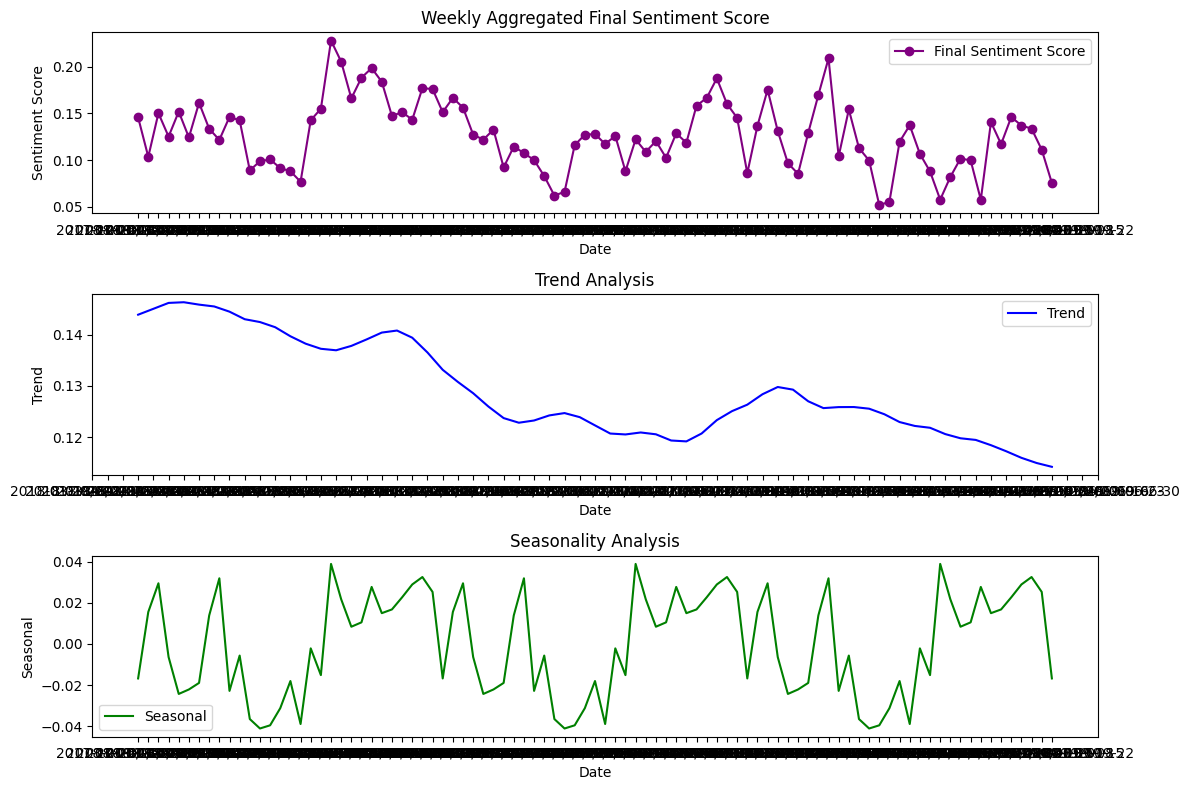

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Weekly aggregation of final_sentiment_score
df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()

# Convert 'Date' to string
df_weekly_final['Date'] = df_weekly_final['Date'].astype(str)

# Defining the figure size
plt.figure(figsize=(12, 8))

# Plotting Final Sentiment Score
plt.subplot(3, 1, 1)
plt.plot(df_weekly_final['Date'], df_weekly_final['final_sentiment_score'], color='purple', label='Final Sentiment Score', marker='o')
plt.title('Weekly Aggregated Final Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

# Perform time series decomposition with a reduced period
period = 30  # adjust period based on available data
result = seasonal_decompose(df_weekly_final['final_sentiment_score'], model='additive', period=period)

# Plotting Trend component
plt.subplot(3, 1, 2)
plt.plot(df_weekly_final['Date'], result.trend, color='blue', label='Trend')
plt.title('Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()

# Plotting Seasonal component
plt.subplot(3, 1, 3)
plt.plot(df_weekly_final['Date'], result.seasonal, color='green', label='Seasonal')
plt.title('Seasonality Analysis')
plt.xlabel('Date')
plt.ylabel('Seasonal')
plt.legend()

plt.tight_layout()
plt.show()


## Residuals/Noise

<ipython-input-100-acc902cc3373>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()


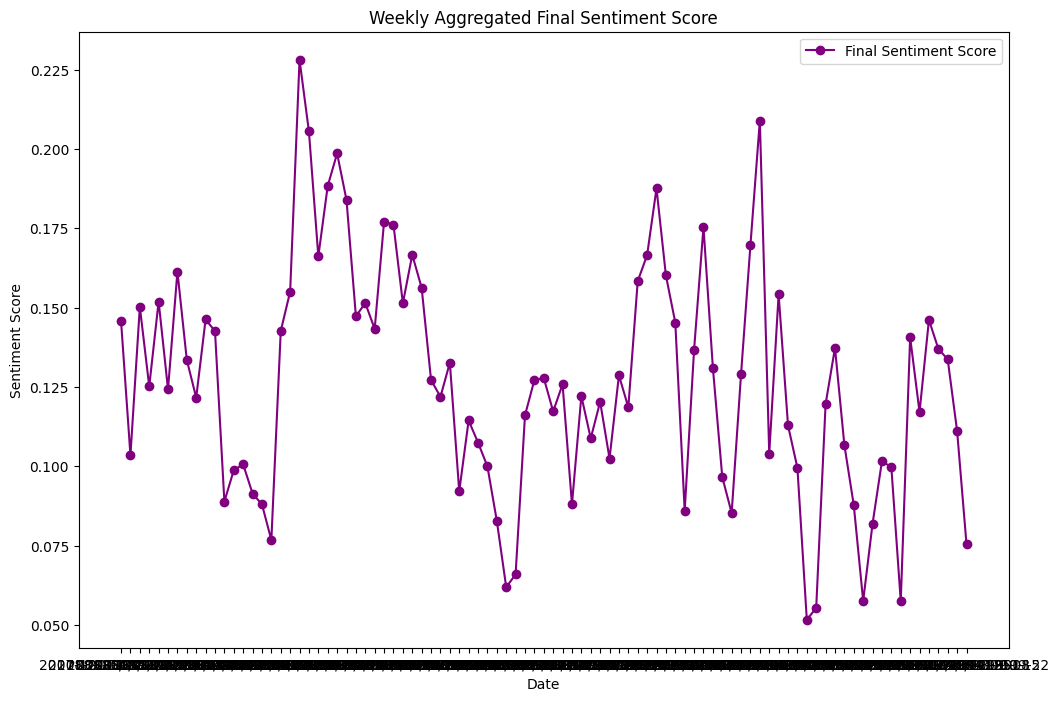

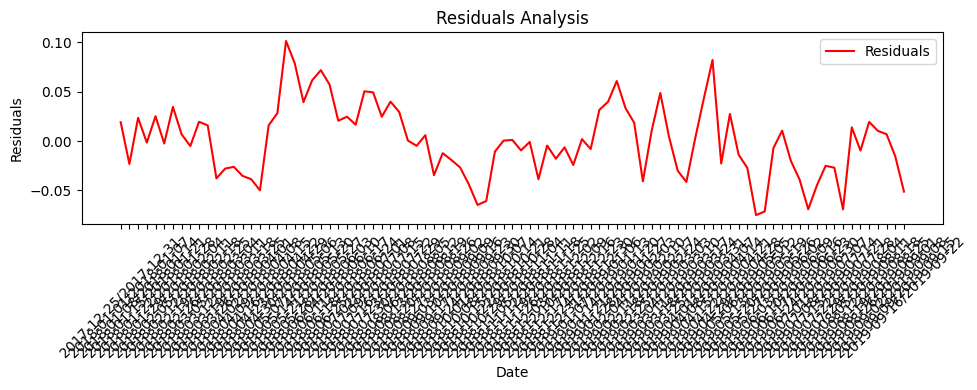

In [ ]:
# Weekly aggregation of final_sentiment_score
df_weekly_final = df.groupby(df['Date'].dt.to_period("W")).mean().reset_index()

# Convert 'Date' to string
df_weekly_final['Date'] = df_weekly_final['Date'].astype(str)

# Plot Final Sentiment Score
plt.figure(figsize=(12, 8))
plt.plot(df_weekly_final['Date'], df_weekly_final['final_sentiment_score'], color='purple', label='Final Sentiment Score', marker='o')
plt.title('Weekly Aggregated Final Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

# Calculate residuals (noise)
residuals = df_weekly_final['final_sentiment_score'] - df_weekly_final['final_sentiment_score'].mean()

# Plot Residuals
plt.figure(figsize=(10, 4))
plt.plot(df_weekly_final['Date'], residuals, color='red', label='Residuals')
plt.title('Residuals Analysis')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Autocorrelation

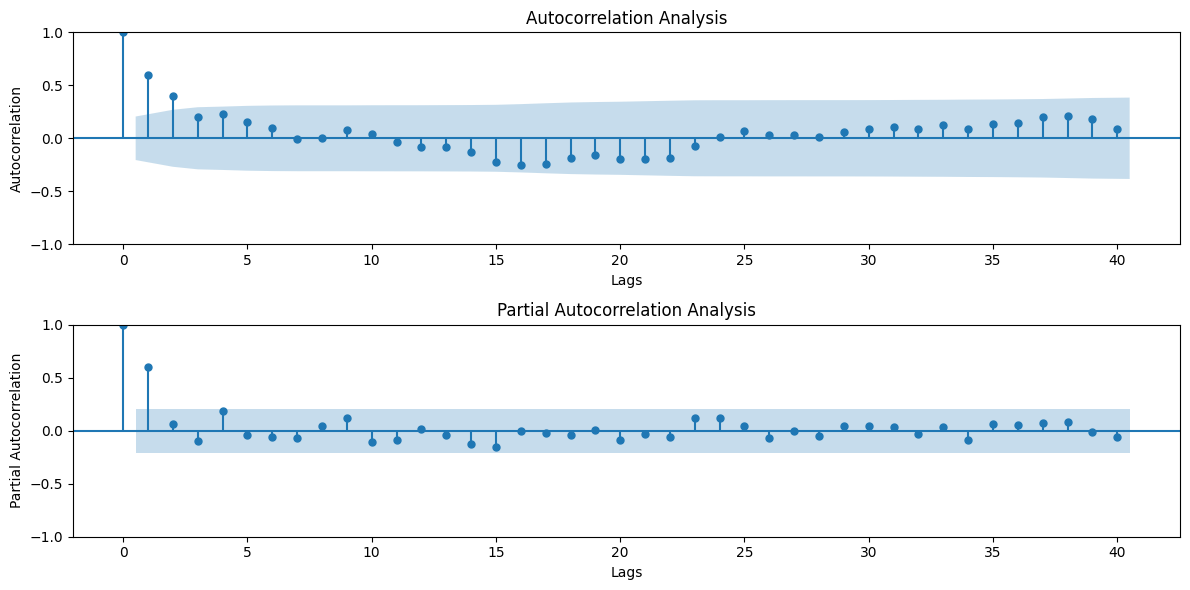

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(12, 6))

# Autocorrelation plot
plt.subplot(2, 1, 1)
plot_acf(df_weekly_final['final_sentiment_score'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Analysis')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')

# Partial Autocorrelation plot
plt.subplot(2, 1, 2)
plot_pacf(df_weekly_final['final_sentiment_score'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Analysis')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')

plt.tight_layout()
plt.show()


## Rolling Statistics (Volatility)

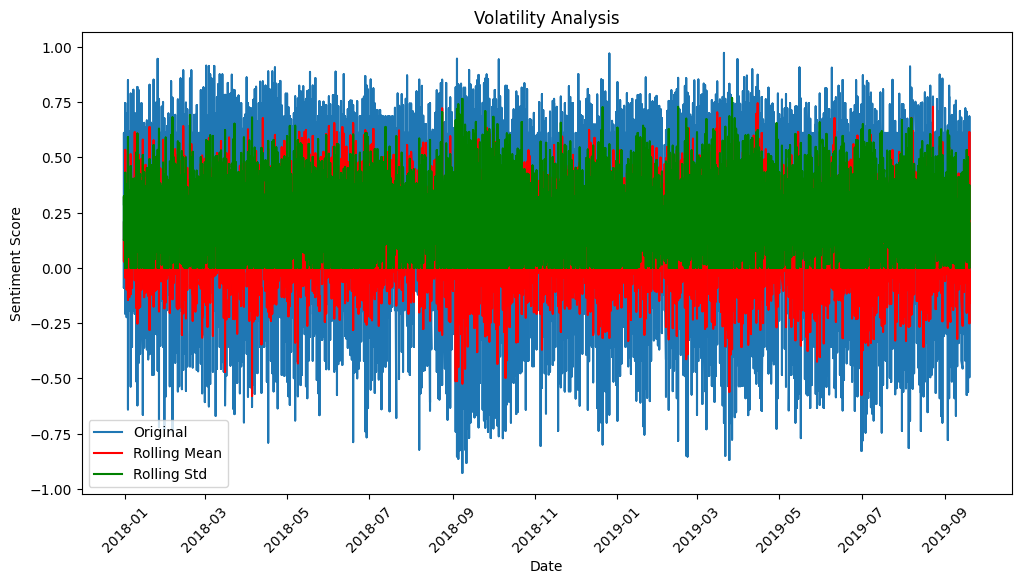

In [ ]:
# Calculate rolling mean and rolling standard deviation
rolling_mean = df['final_sentiment_score'].rolling(window=4).mean()  # adjust window size based on available data
rolling_std = df['final_sentiment_score'].rolling(window=4).std()

# Plotting Rolling Mean and Rolling Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['final_sentiment_score'], label='Original')
plt.plot(df['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(df['Date'], rolling_std, label='Rolling Std', color='green')
plt.title('Volatility Analysis')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Stationarity

ADF Statistic: -4.539521506515469
p-value: 0.00016671481914173
Critical Values: {'1%': -3.505190196159122, '5%': -2.894232085048011, '10%': -2.5842101234567902}


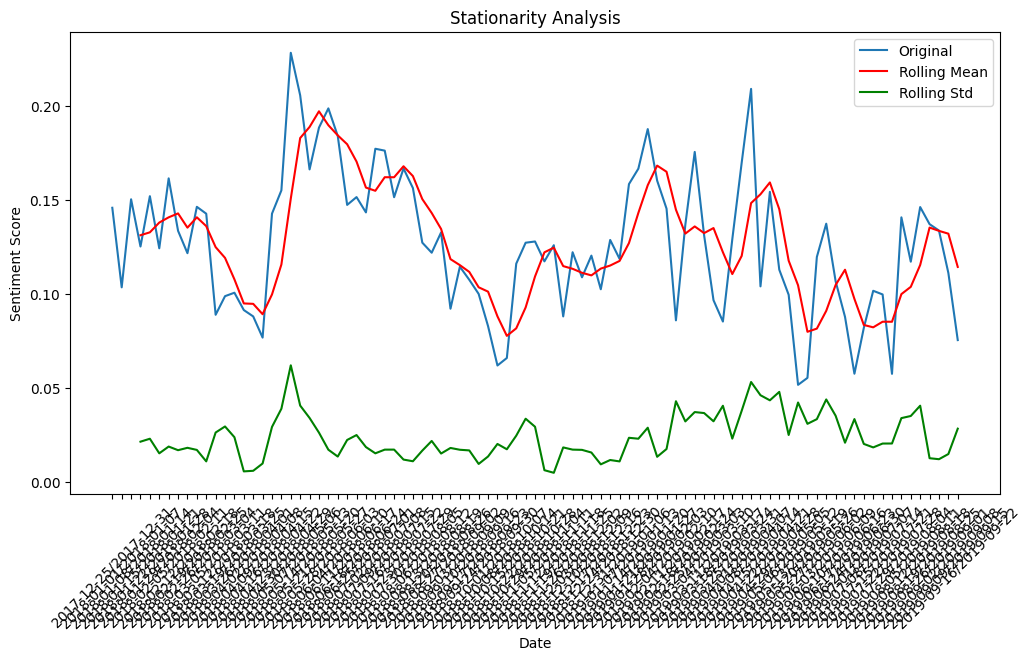

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test for stationarity
result_adf = adfuller(df_weekly_final['final_sentiment_score'])
print(f'ADF Statistic: {result_adf[0]}')
print(f'p-value: {result_adf[1]}')
print(f'Critical Values: {result_adf[4]}')

# You can also visualize the rolling mean and rolling standard deviation
rolling_mean = df_weekly_final['final_sentiment_score'].rolling(window=4).mean()  # adjust window size based on available data
rolling_std = df_weekly_final['final_sentiment_score'].rolling(window=4).std()

# Plotting Rolling Mean and Rolling Standard Deviation
plt.figure(figsize=(12, 6))
plt.plot(df_weekly_final['Date'], df_weekly_final['final_sentiment_score'], label='Original')
plt.plot(df_weekly_final['Date'], rolling_mean, label='Rolling Mean', color='red')
plt.plot(df_weekly_final['Date'], rolling_std, label='Rolling Std', color='green')
plt.title('Stationarity Analysis')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Periodogram

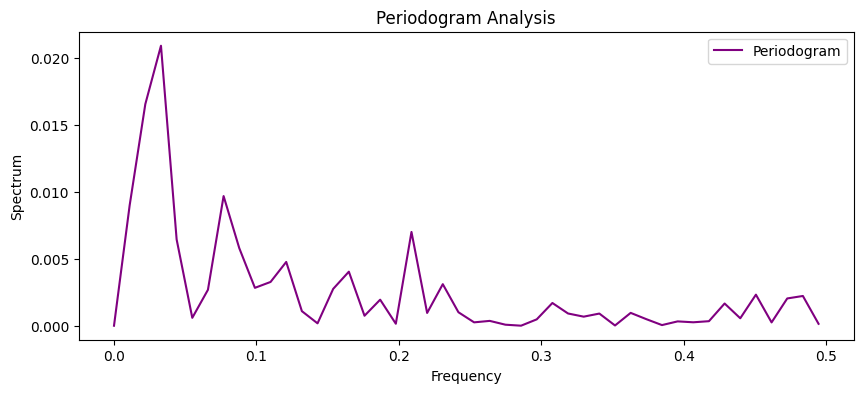

In [ ]:
from scipy.signal import periodogram

# Calculate the periodogram
frequencies, spectrum = periodogram(df_weekly_final['final_sentiment_score'])

# Plot the periodogram
plt.figure(figsize=(10, 4))
plt.plot(frequencies, spectrum, color='purple', label='Periodogram')
plt.title('Periodogram Analysis')
plt.xlabel('Frequency')
plt.ylabel('Spectrum')
plt.legend()
plt.show()


#Saving DF as csv

In [ ]:
#Saving the df into a csv
df.to_csv("NKE_P1.csv", index=False)


# **Stock Data Analysis** **(Part - 2)**

# Importing Libraries and Extracting data

In [ ]:
stock_symbol = 'NKE'

In [ ]:
import yfinance as yf

# Set the stock symbol and date range

# start_date = user_start_date
# end_date = user_end_date

start_date = '2018-01-01'
end_date = '2019-08-01'

# Download historical stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset index to have 'Date' as a column
stock_data.reset_index(inplace=True)

# Reorder columns to match the specified format
stock_data = stock_data[['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]



[*********************100%%**********************]  1 of 1 completed


In [ ]:
stock_data.head()

Date       Open       High        Low      Close  Adj Close    Volume
0 2018-01-02  62.849998  63.490002  62.849998  63.490002  59.656796   6511000
1 2018-01-03  63.480000  63.660000  62.759998  63.480000  59.647392   6091100
2 2018-01-04  63.400002  63.549999  62.549999  63.439999  59.609806   5780500
3 2018-01-05  63.700001  64.300003  63.470001  63.980000  60.117214  11632300
4 2018-01-08  64.150002  64.709999  63.980000  64.550003  60.652805  11905700

In [ ]:
stock_data.shape

(397, 7)

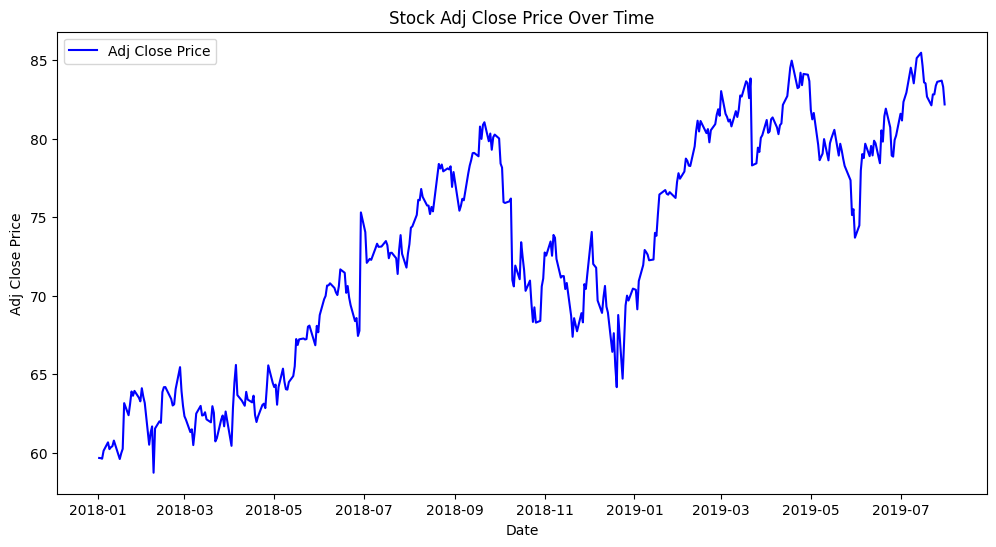

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'final_df' is your DataFrame
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close Price', color='blue')
plt.title('Stock Adj Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()


# Adding Stock Features

Add all the features for stock data

In [ ]:
# Setting 'Date' column  in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Calculate Moving Averages (MA)
stock_data['MA_7'] = stock_data['Adj Close'].rolling(window=7).mean()
stock_data['MA_20'] = stock_data['Adj Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Adj Close'].ewm(span=20, adjust=False).mean()

# Calculate Bollinger Bands
stock_data['MA_20_STD'] = stock_data['Adj Close'].rolling(window=20).std()
stock_data['Upper_Band'] = stock_data['MA_20'] + 2 * stock_data['MA_20_STD']
stock_data['Lower_Band'] = stock_data['MA_20'] - 2 * stock_data['MA_20_STD']



# Fill NaN values with the nearest valid values (forward fill and then backward fill)
stock_data.fillna(method='ffill', inplace=True)
stock_data.fillna(method='bfill', inplace=True)

# Resetting the index to keep 'Date' as a column
stock_data.reset_index(inplace=True)




Adding more features

In [ ]:
# Calculate Relative Strength Index (RSI)
delta = stock_data['Adj Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)

avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()

rs = avg_gain / avg_loss
stock_data['RSI'] = 100 - (100 / (1 + rs))

# Calculate Moving Average Convergence Divergence (MACD)
short_ema = stock_data['Adj Close'].ewm(span=12, adjust=False).mean()
long_ema = stock_data['Adj Close'].ewm(span=26, adjust=False).mean()

stock_data['MACD'] = short_ema - long_ema
stock_data['Signal_Line'] = stock_data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate Average True Range (ATR)
high_low_range = stock_data['High'] - stock_data['Low']
stock_data['ATR'] = high_low_range.rolling(window=14).mean()

# Calculate Commodity Channel Index (CCI)
typical_price = (stock_data['High'] + stock_data['Low'] + stock_data['Adj Close']) / 3
mean_deviation = (typical_price - typical_price.rolling(window=20).mean()).abs().rolling(window=20).mean()

stock_data['CCI'] = (typical_price - typical_price.rolling(window=20).mean()) / (0.015 * mean_deviation)

# Calculate Stochastic Oscillator
min_low = stock_data['Low'].rolling(window=14).min()
max_high = stock_data['High'].rolling(window=14).max()

stock_data['%K'] = ((stock_data['Adj Close'] - min_low) / (max_high - min_low)) * 100
stock_data['%D'] = stock_data['%K'].rolling(window=3).mean()


Plotting the Features

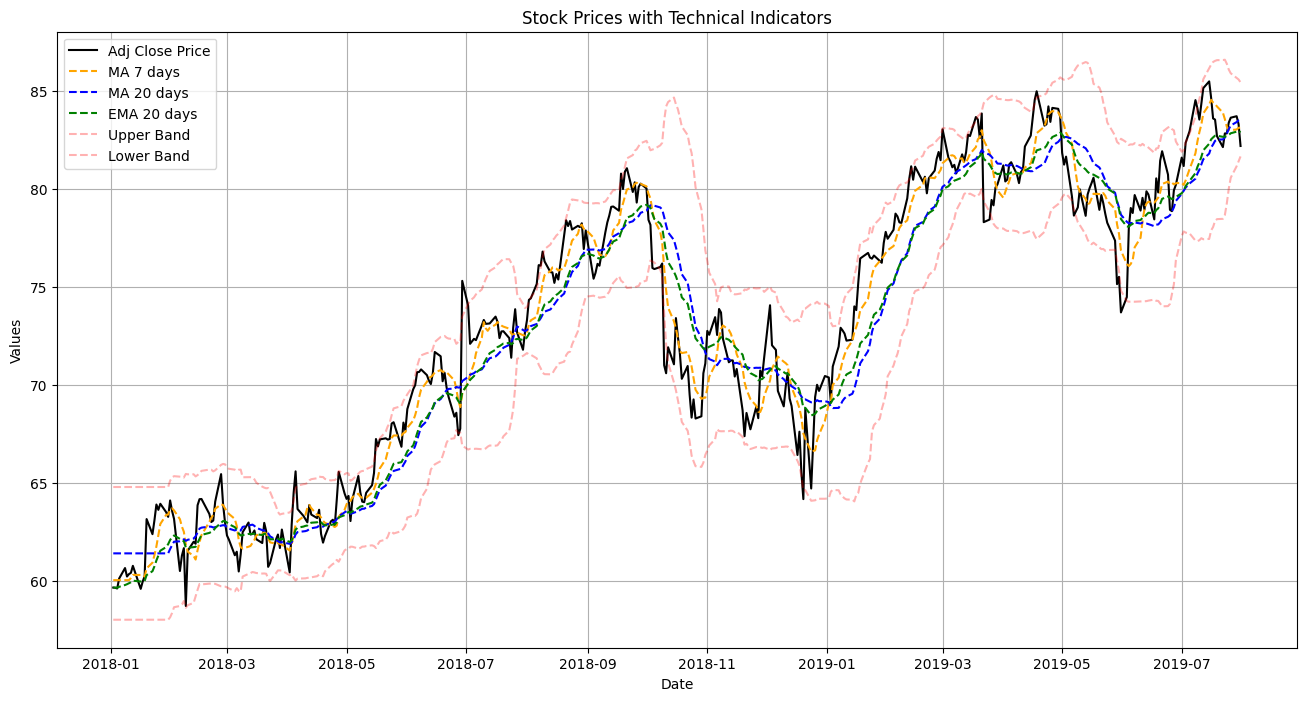

In [ ]:
import matplotlib.pyplot as plt

# Setting 'Date' column in datetime format
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Calculate Moving Averages (MA)
stock_data['MA_7'] = stock_data['Adj Close'].rolling(window=7).mean()
stock_data['MA_20'] = stock_data['Adj Close'].rolling(window=20).mean()

# Calculate Exponential Moving Average (EMA)
stock_data['EMA'] = stock_data['Adj Close'].ewm(span=20, adjust=False).mean()

# Calculate Bollinger Bands
stock_data['MA_20_STD'] = stock_data['Adj Close'].rolling(window=20).std()
stock_data['Upper_Band'] = stock_data['MA_20'] + 2 * stock_data['MA_20_STD']
stock_data['Lower_Band'] = stock_data['MA_20'] - 2 * stock_data['MA_20_STD']

# Fill NaN values with the nearest valid values (forward fill and then backward fill)
stock_data.fillna(method='ffill', inplace=True)
stock_data.fillna(method='bfill', inplace=True)

# Resetting the index to keep 'Date' as a column
stock_data.reset_index(inplace=True)

# Plotting all features in one graph
plt.figure(figsize=(16, 8))
plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close Price', color='black')
plt.plot(stock_data['Date'], stock_data['MA_7'], label='MA 7 days', linestyle='--', color='orange')
plt.plot(stock_data['Date'], stock_data['MA_20'], label='MA 20 days', linestyle='--', color='blue')
plt.plot(stock_data['Date'], stock_data['EMA'], label='EMA 20 days', linestyle='--', color='green')
plt.plot(stock_data['Date'], stock_data['Upper_Band'], label='Upper Band', linestyle='--', color='red', alpha=0.3)
plt.plot(stock_data['Date'], stock_data['Lower_Band'], label='Lower Band', linestyle='--', color='red', alpha=0.3)

plt.title('Stock Prices with Technical Indicators')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

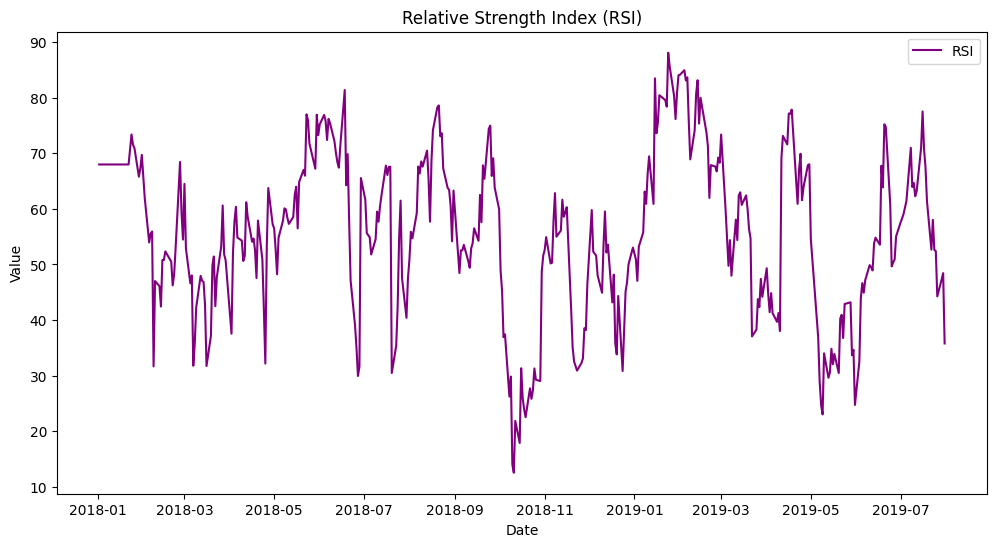

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


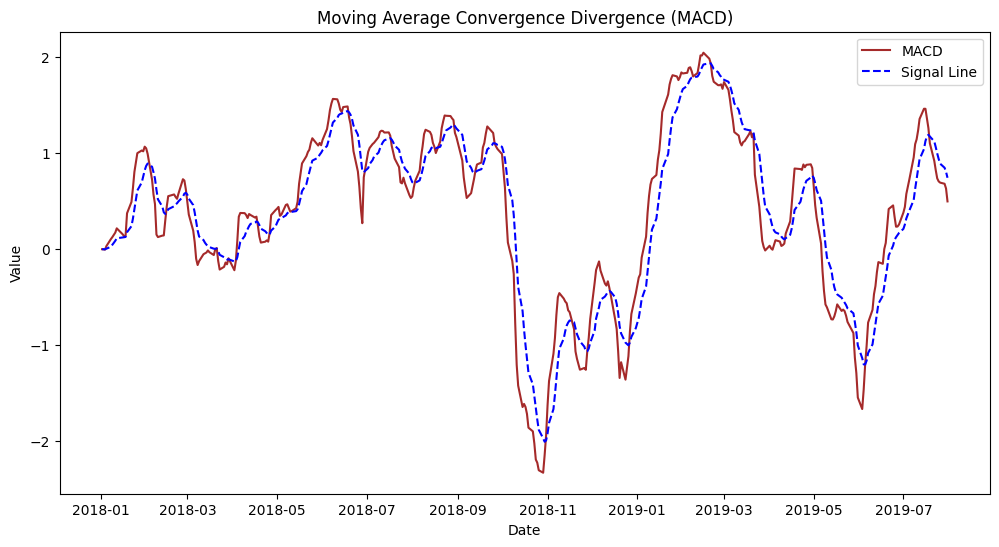

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['MACD'], label='MACD', color='brown')
plt.plot(stock_data['Date'], stock_data['Signal_Line'], label='Signal Line', linestyle='--', color='blue')
plt.title('Moving Average Convergence Divergence (MACD)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


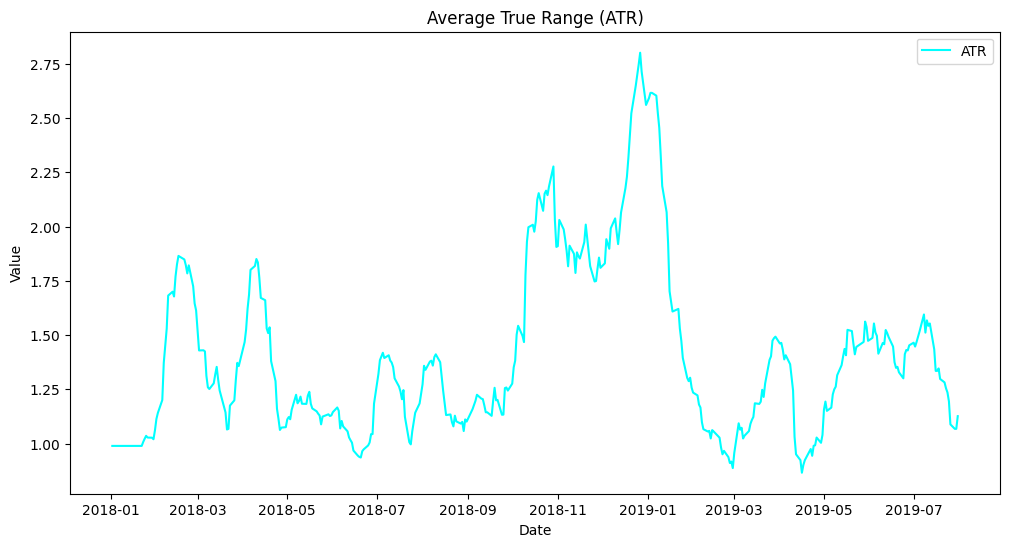

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['ATR'], label='ATR', color='cyan')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


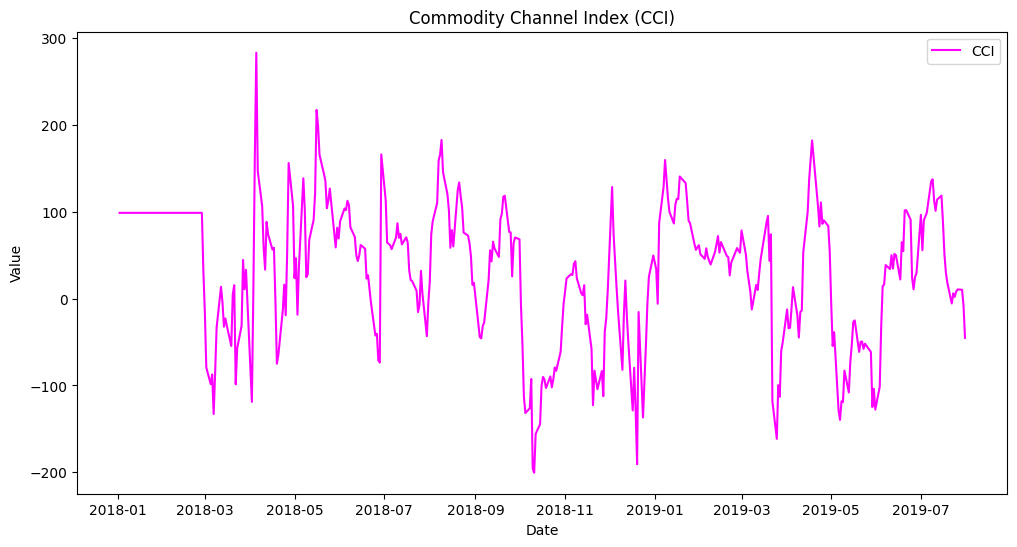

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['CCI'], label='CCI', color='magenta')
plt.title('Commodity Channel Index (CCI)')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


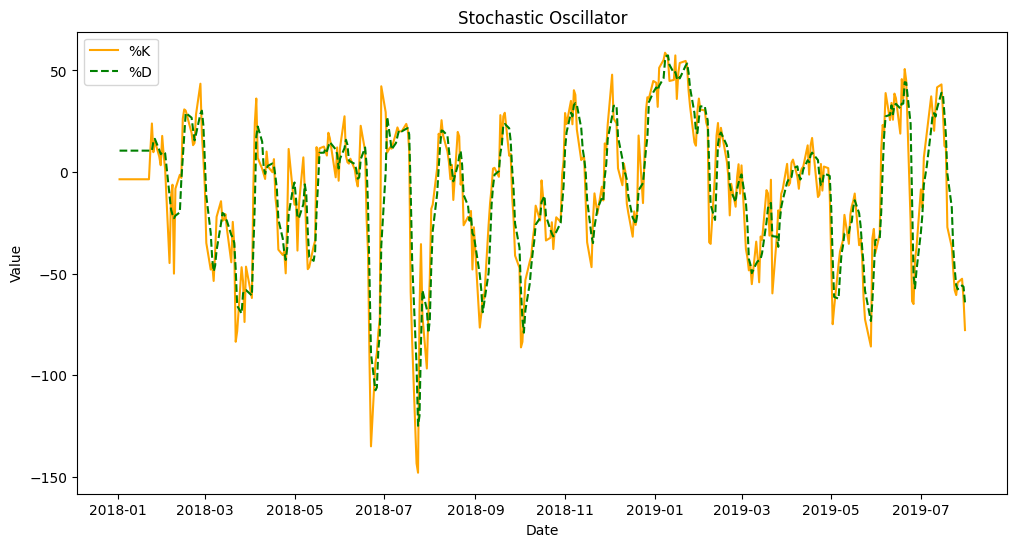

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Date'], stock_data['%K'], label='%K', color='orange')
plt.plot(stock_data['Date'], stock_data['%D'], label='%D', linestyle='--', color='green')
plt.title('Stochastic Oscillator')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


In [ ]:
stock_data.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2018-01-02  62.849998  63.490002  62.849998  63.490002  59.656796   6511000   
1 2018-01-03  63.480000  63.660000  62.759998  63.480000  59.647392   6091100   
2 2018-01-04  63.400002  63.549999  62.549999  63.439999  59.609806   5780500   
3 2018-01-05  63.700001  64.300003  63.470001  63.980000  60.117214  11632300   
4 2018-01-08  64.150002  64.709999  63.980000  64.550003  60.652805  11905700   

        MA_7      MA_20        EMA  MA_20_STD  Upper_Band  Lower_Band  \
0  60.035329  61.402148  59.656796   1.692874   64.787896     58.0164   
1  60.035329  61.402148  59.655900   1.692874   64.787896     58.0164   
2  60.035329  61.402148  59.651510   1.692874   64.787896     58.0164   
3  60.035329  61.402148  59.695863   1.692874   64.787896     58.0164   
4  60.035329  61.402148  59.787000   1.692874   64.787896     58.0164   

         RSI      MACD  Signal_Line       ATR        CCI        %K         %D  
0  67.989974  0.000000     0.000000  0.989286  98.900754 -3.588257  10.505083  
1  67.989974 -0.000750    -0.000150  0.989286  98.900754 -3.588257  10.505083  
2  67.989974 -0.004328    -0.000986  0.989286  98.900754 -3.588257  10.505083  
3  67.989974  0.033396     0.005891  0.989286  98.900754 -3.588257  10.505083  
4  67.989974  0.105296     0.025772  0.989286  98.900754 -3.588257  10.505083

# **Merging Sentiment and Stock Data Analysis** **(Part - 3)**

Loading Sentiment Analysis Dataset

In [ ]:
Sentiment_df = pd.read_csv('NKE_P1.csv', error_bad_lines=False)


#Sentiment_df = df

<ipython-input-126-81b2569cc6ab>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  Sentiment_df = pd.read_csv('NKE_P1.csv', error_bad_lines=False)


In [ ]:
selected_columns = ['Date', 'final_sentiment_score', 'followers_count', 'vader_sentiment_score']
new_df = Sentiment_df[selected_columns]

# replace the original DataFrame with this new one
Sentiment_df = new_df.copy()

In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# If not, replace df with the actual name of your DataFrame

# Convert 'Date' to datetime type (if it's not already)
Sentiment_df['Date'] = pd.to_datetime(Sentiment_df['Date'])

# Group by 'Date' and calculate the mean of 'sentiment_score'
grouped_df = Sentiment_df.groupby('Date')['final_sentiment_score', 'vader_sentiment_score'].mean().reset_index()



<ipython-input-128-72090fff1770>:10: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_df = Sentiment_df.groupby('Date')['final_sentiment_score', 'vader_sentiment_score'].mean().reset_index()


In [ ]:
Sentiment_df = grouped_df

In [ ]:
Sentiment_df.head()

Date  final_sentiment_score  vader_sentiment_score
0 2017-12-31               0.145746               0.196780
1 2018-01-01               0.070605               0.087045
2 2018-01-02               0.117560               0.155177
3 2018-01-03               0.087216               0.103712
4 2018-01-04               0.094812               0.116885

In [ ]:
Sentiment_df.shape

(628, 3)

# Merging Both datasets

In [ ]:
# Convert 'Date' column to datetime64[ns] in both DataFrames
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
Sentiment_df['Date'] = pd.to_datetime(Sentiment_df['Date'])


In [ ]:
Sentiment_df.shape

(628, 3)

In [ ]:
stock_data.shape

(397, 20)

In [ ]:
# Merge datasets on 'Date'
final_df = pd.merge(stock_data, Sentiment_df, on='Date', how='inner')


In [ ]:
final_df.shape

(397, 22)

In [ ]:
final_df.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2018-01-02  62.849998  63.490002  62.849998  63.490002  59.656796   6511000   
1 2018-01-03  63.480000  63.660000  62.759998  63.480000  59.647392   6091100   
2 2018-01-04  63.400002  63.549999  62.549999  63.439999  59.609806   5780500   
3 2018-01-05  63.700001  64.300003  63.470001  63.980000  60.117214  11632300   
4 2018-01-08  64.150002  64.709999  63.980000  64.550003  60.652805  11905700   

        MA_7      MA_20        EMA  ...  Lower_Band        RSI      MACD  \
0  60.035329  61.402148  59.656796  ...     58.0164  67.989974  0.000000   
1  60.035329  61.402148  59.655900  ...     58.0164  67.989974 -0.000750   
2  60.035329  61.402148  59.651510  ...     58.0164  67.989974 -0.004328   
3  60.035329  61.402148  59.695863  ...     58.0164  67.989974  0.033396   
4  60.035329  61.402148  59.787000  ...     58.0164  67.989974  0.105296   

   Signal_Line       ATR        CCI        %K         %D  \
0     0.000000  0.989286  98.900754 -3.588257  10.505083   
1    -0.000150  0.989286  98.900754 -3.588257  10.505083   
2    -0.000986  0.989286  98.900754 -3.588257  10.505083   
3     0.005891  0.989286  98.900754 -3.588257  10.505083   
4     0.025772  0.989286  98.900754 -3.588257  10.505083   

   final_sentiment_score  vader_sentiment_score  
0               0.117560               0.155177  
1               0.087216               0.103712  
2               0.094812               0.116885  
3               0.130428               0.165139  
4               0.182972               0.204885  

[5 rows x 22 columns]

 # Plotting sentiment with Close price

Checking the sentiment aggregated

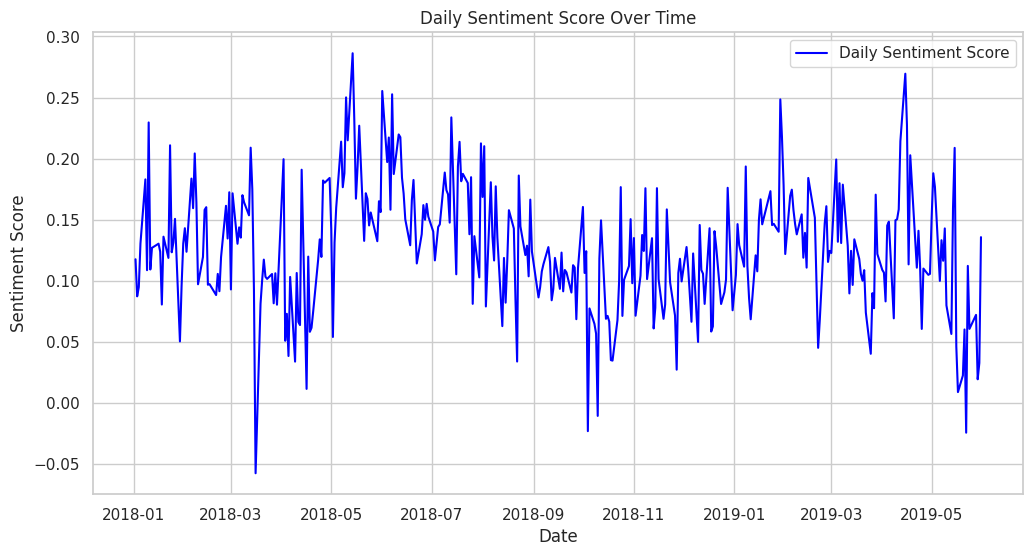

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Date' and 'final_sentiment_score' columns are present in your DataFrame
final_df['Date'] = pd.to_datetime(final_df['Date'])

plt.figure(figsize=(12, 6))
plt.plot(final_df['Date'], final_df['final_sentiment_score'], label='Daily Sentiment Score', color='blue')
plt.title('Daily Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


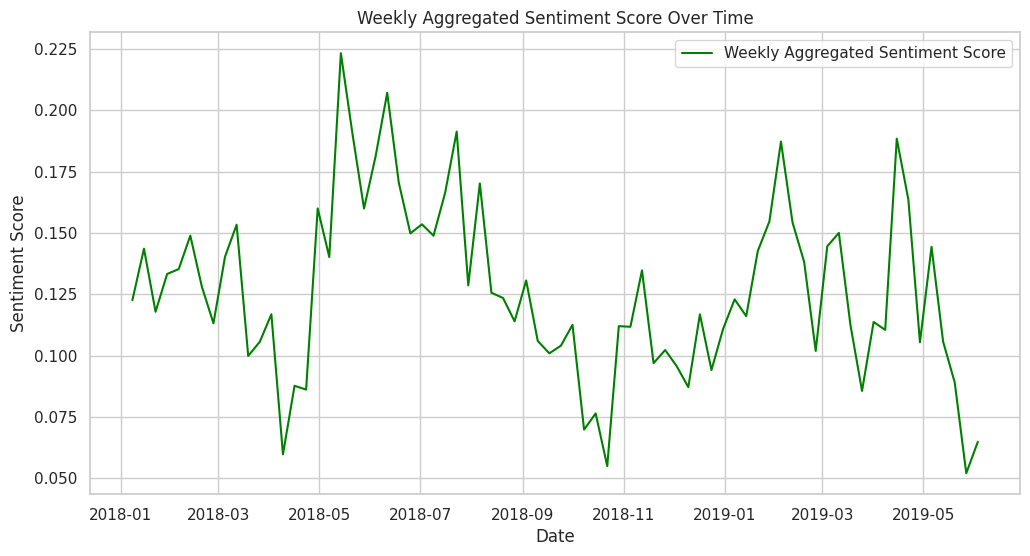

In [ ]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])  #

# Resample the data to get weekly averages
weekly_data = final_df.resample('W-Mon', on='Date').mean()

plt.figure(figsize=(12, 6))
plt.plot(weekly_data.index, weekly_data['final_sentiment_score'], label='Weekly Aggregated Sentiment Score', color='green')
plt.title('Weekly Aggregated Sentiment Score Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()
plt.show()


Plotting the Sentiment with Adj Close price

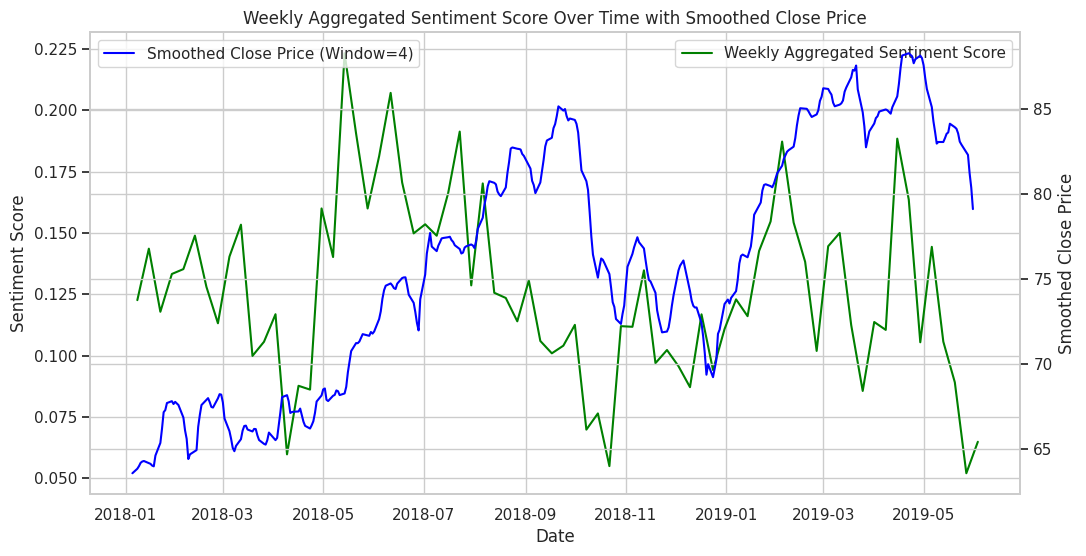

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'Date' column to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'])

# Resample the data to get weekly averages
weekly_data = final_df.resample('W-Mon', on='Date').mean()

# Smooth 'Close' prices using a rolling mean
rolling_window = 4  # Adjust the window size as needed
smoothed_close = final_df['Close'].rolling(window=rolling_window).mean()

plt.figure(figsize=(12, 6))

# Plotting weekly aggregated sentiment score
plt.plot(weekly_data.index, weekly_data['final_sentiment_score'], label='Weekly Aggregated Sentiment Score', color='green')
plt.title('Weekly Aggregated Sentiment Score Over Time with Smoothed Close Price')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

# Creating a secondary y-axis for the smoothed 'Close' prices
plt.twinx()
plt.plot(final_df['Date'], smoothed_close, label=f'Smoothed Close Price (Window={rolling_window})', color='blue')
plt.xlabel('Date')
plt.ylabel('Smoothed Close Price')
plt.legend()

plt.show()


#Correlation

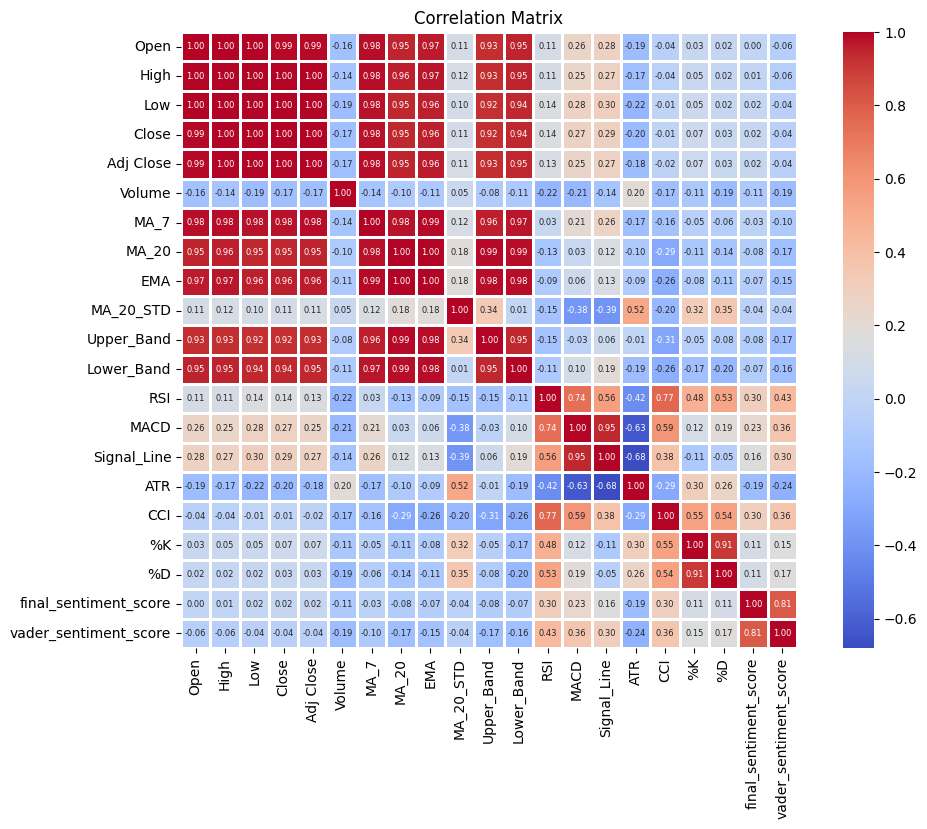

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Remove non-numeric columns, as correlation is applicable to numeric data
numeric_columns = final_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = final_df[numeric_columns].corr()

# Set up the matplotlib figure size
plt.figure(figsize=(12, 8))

# Plot the correlation matrix as a heatmap with customized parameters
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=1,
    square=True,  # Ensures that each cell is a square
    cbar_kws={"shrink": 1},  # Adjusts the color bar size
    annot_kws={"fontsize": 6},  # Adjusts the font size of annotations
)

# Rotate the y-axis labels for better readability
plt.yticks(rotation=0)

# Showing the plot
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Columns to drop
columns_to_drop = ['Open', 'High', 'Low', 'Close', 'MA_7',	'MA_20',	'EMA',	'MA_20_STD',	'Upper_Band'	,'Lower_Band']

# Drop specified columns
final_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
final_df.head()

Date  Adj Close    Volume        RSI      MACD  Signal_Line       ATR  \
0 2018-01-02  59.656803   6511000  67.989993  0.000000     0.000000  0.989286   
1 2018-01-03  59.647408   6091100  67.989993 -0.000750    -0.000150  0.989286   
2 2018-01-04  59.609806   5780500  67.989993 -0.004328    -0.000985  0.989286   
3 2018-01-05  60.117210  11632300  67.989993  0.033395     0.005891  0.989286   
4 2018-01-08  60.652798  11905700  67.989993  0.105294     0.025771  0.989286   

         CCI        %K        %D  final_sentiment_score  vader_sentiment_score  
0  98.900571 -3.588094  10.50522               0.117560               0.155177  
1  98.900571 -3.588094  10.50522               0.087216               0.103712  
2  98.900571 -3.588094  10.50522               0.094812               0.116885  
3  98.900571 -3.588094  10.50522               0.130428               0.165139  
4  98.900571 -3.588094  10.50522               0.182972               0.204885

#Selecting only numeric Data

In [ ]:
# Assuming your DataFrame is named final_df
numeric_columns = final_df.select_dtypes(include='number').columns

# Include the 'Date' column in the selection
numeric_columns = ['Date'] + list(numeric_columns)

# Create a new DataFrame with only numeric columns
numeric_df = final_df[numeric_columns]

#  modify the original DataFrame
final_df = final_df[numeric_columns]


In [ ]:
final_df.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2018-01-02  62.849998  63.490002  62.849998  63.490002  59.656796   6511000   
1 2018-01-03  63.480000  63.660000  62.759998  63.480000  59.647392   6091100   
2 2018-01-04  63.400002  63.549999  62.549999  63.439999  59.609806   5780500   
3 2018-01-05  63.700001  64.300003  63.470001  63.980000  60.117214  11632300   
4 2018-01-08  64.150002  64.709999  63.980000  64.550003  60.652805  11905700   

        MA_7      MA_20        EMA  ...  Lower_Band        RSI      MACD  \
0  60.035329  61.402148  59.656796  ...     58.0164  67.989974  0.000000   
1  60.035329  61.402148  59.655900  ...     58.0164  67.989974 -0.000750   
2  60.035329  61.402148  59.651510  ...     58.0164  67.989974 -0.004328   
3  60.035329  61.402148  59.695863  ...     58.0164  67.989974  0.033396   
4  60.035329  61.402148  59.787000  ...     58.0164  67.989974  0.105296   

   Signal_Line       ATR        CCI        %K         %D  \
0     0.000000  0.989286  98.900754 -3.588257  10.505083   
1    -0.000150  0.989286  98.900754 -3.588257  10.505083   
2    -0.000986  0.989286  98.900754 -3.588257  10.505083   
3     0.005891  0.989286  98.900754 -3.588257  10.505083   
4     0.025772  0.989286  98.900754 -3.588257  10.505083   

   final_sentiment_score  vader_sentiment_score  
0               0.117560               0.155177  
1               0.087216               0.103712  
2               0.094812               0.116885  
3               0.130428               0.165139  
4               0.182972               0.204885  

[5 rows x 22 columns]

# LSTM Model and Evaluation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

df = final_df

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by Date
df = df.sort_values(by='Date')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Feature selection
features = ['Adj Close', 'final_sentiment_score']
df = df[features]

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Function to create time series data
def create_time_series_data(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the time steps
time_steps = 10

# Create time series data
X, y = create_time_series_data(df_scaled, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model and record training and validation loss
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Invert predictions to original scale
y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

# Invert actual values to original scale
y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]



Epoch 1/50
10/10 [==============================] - 6s 119ms/step - loss: 0.1864 - val_loss: 0.0542
Epoch 2/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0352 - val_loss: 0.0247
Epoch 3/50
10/10 [==============================] - 0s 21ms/step - loss: 0.0165 - val_loss: 0.0331
Epoch 4/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0081 - val_loss: 0.0075
Epoch 5/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0069 - val_loss: 0.0069
Epoch 6/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0064 - val_loss: 0.0059
Epoch 7/50
10/10 [==============================] - 0s 19ms/step - loss: 0.0059 - val_loss: 0.0063
Epoch 8/50
10/10 [==============================] - 0s 19ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 9/50
10/10 [==============================] - 0s 19ms/step - loss: 0.0057 - val_loss: 0.0061
Epoch 10/50
10/10 [==============================] - 0s 18ms/step - loss: 0.0057 - val_loss: 0.0056
Epoch 11

In [ ]:
from tensorflow.keras.utils import plot_model

# Plot the LSTM model architecture
plot_model(model, to_file='lstm_model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot
from PIL import Image
img = Image.open('lstm_model_architecture.png')
img.show()


# Evaluation

Evaluating MSE, RMSE and R^2 Metrics

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test_inverse, y_pred_inverse)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_inverse, y_pred_inverse)

# Print evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R^2): {r2}')



Mean Squared Error (MSE): 2.834347991531762
Root Mean Squared Error (RMSE): 1.6835521944780216
R-squared (R^2): 0.5703515205858739


Actual Price and Predicted Price Plot

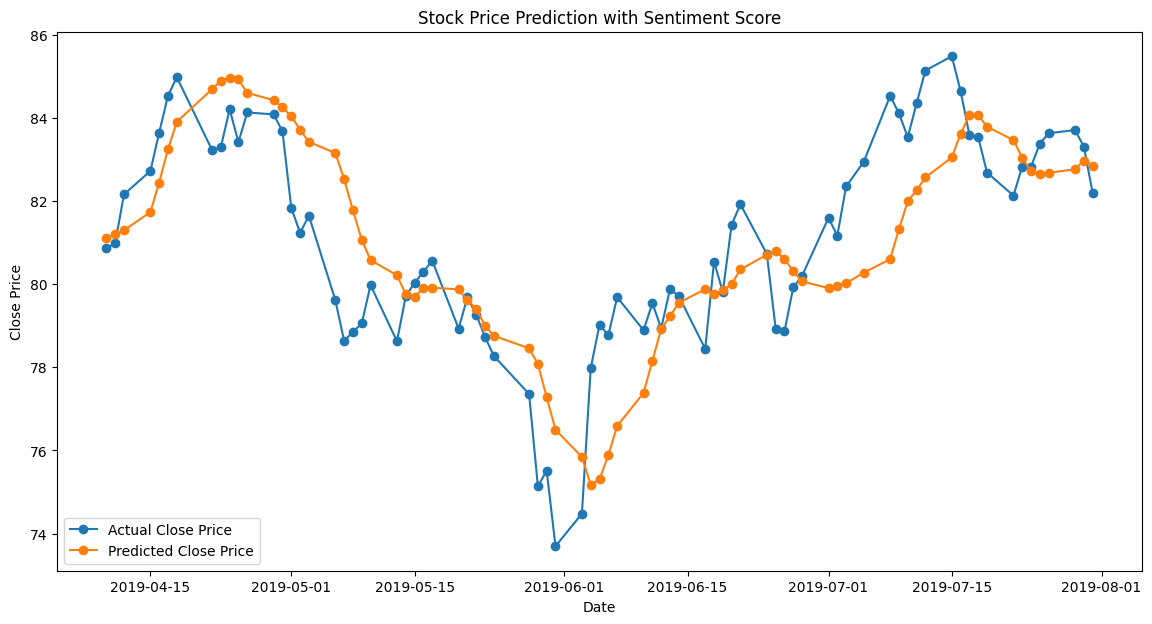

In [ ]:
# Plot the Actual Price and Predicted Price
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_inverse, label='Actual Close Price', marker='o')
plt.plot(df.index[-len(y_test):], y_pred_inverse, label='Predicted Close Price', marker='o')
plt.title('Stock Price Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


Training Loss and Validation Loss

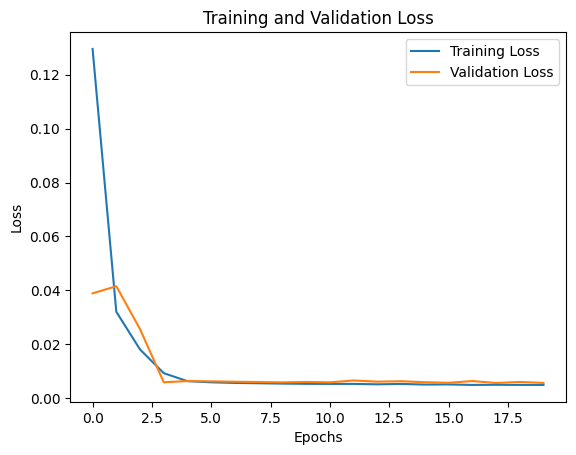

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Percentage of Correct Direction (PCD)

Percentage of Correct Direction (PCD): 54.41176470588235%


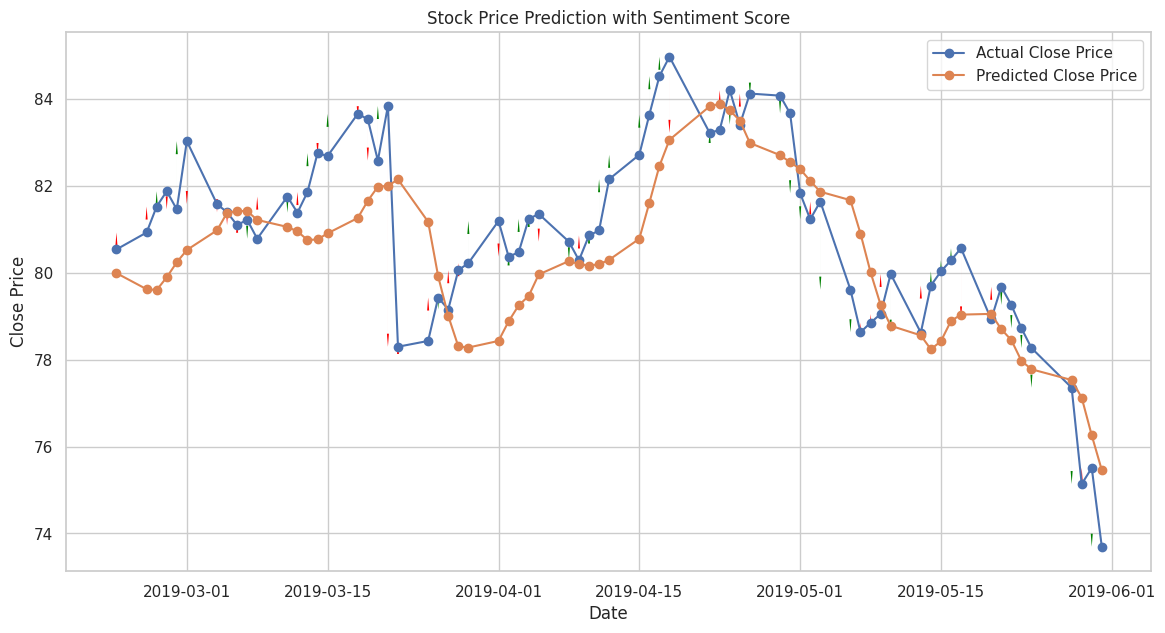

In [ ]:
# Calculate Percentage of Correct Direction (PCD)
pcd = np.mean(np.sign(y_pred_inverse[1:] - y_pred_inverse[:-1]) == np.sign(y_test_inverse[1:] - y_test_inverse[:-1])) * 100
print(f'Percentage of Correct Direction (PCD): {pcd}%')

# Plot the results with directional arrows
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_inverse, label='Actual Close Price', marker='o')
plt.plot(df.index[-len(y_test):], y_pred_inverse, label='Predicted Close Price', marker='o')

# Add directional arrows to indicate correct and incorrect directions
for i in range(1, len(y_test_inverse)):
    actual_direction = np.sign(y_test_inverse[i] - y_test_inverse[i - 1])
    predicted_direction = np.sign(y_pred_inverse[i] - y_pred_inverse[i - 1])

    if actual_direction == predicted_direction:
        arrow_color = 'green'
    else:
        arrow_color = 'red'

    plt.arrow(df.index[-len(y_test) + i - 1], y_test_inverse[i - 1], 0, y_test_inverse[i] - y_test_inverse[i - 1],
              shape='full', lw=0, length_includes_head=True, head_width=0.2, color=arrow_color)

plt.title('Stock Price Prediction with Sentiment Score')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


# With Different Learning rates and Batch Sizes

3/3 [==============================] - 1s 8ms/step
Optimizer: Adam, Learning Rate: 0.1, Batch Size: 4
Mean Squared Error (MSE): 215.20162963279478
Root Mean Squared Error (RMSE): 14.669752200797216
R-squared (R^2): -43.68181394578287



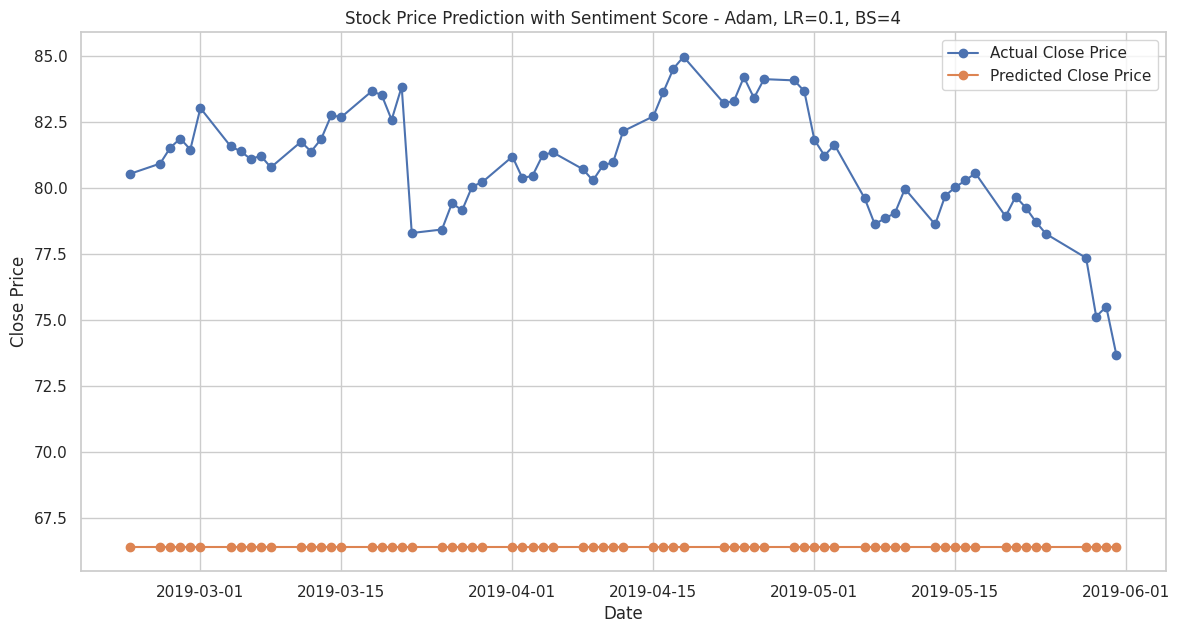

3/3 [==============================] - 1s 8ms/step
Optimizer: Adam, Learning Rate: 0.1, Batch Size: 8
Mean Squared Error (MSE): 33.835957883332256
Root Mean Squared Error (RMSE): 5.816868391439869
R-squared (R^2): -6.025281255537502



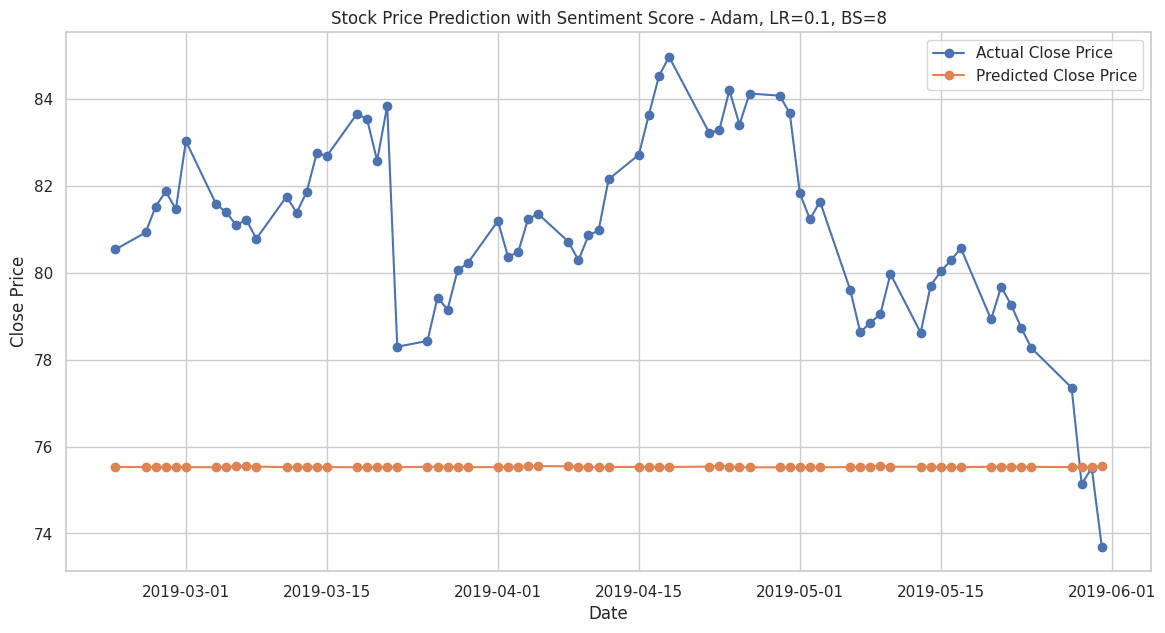

3/3 [==============================] - 1s 9ms/step
Optimizer: Adam, Learning Rate: 0.1, Batch Size: 16
Mean Squared Error (MSE): 228.38360359034095
Root Mean Squared Error (RMSE): 15.112365916372623
R-squared (R^2): -46.418756546144465



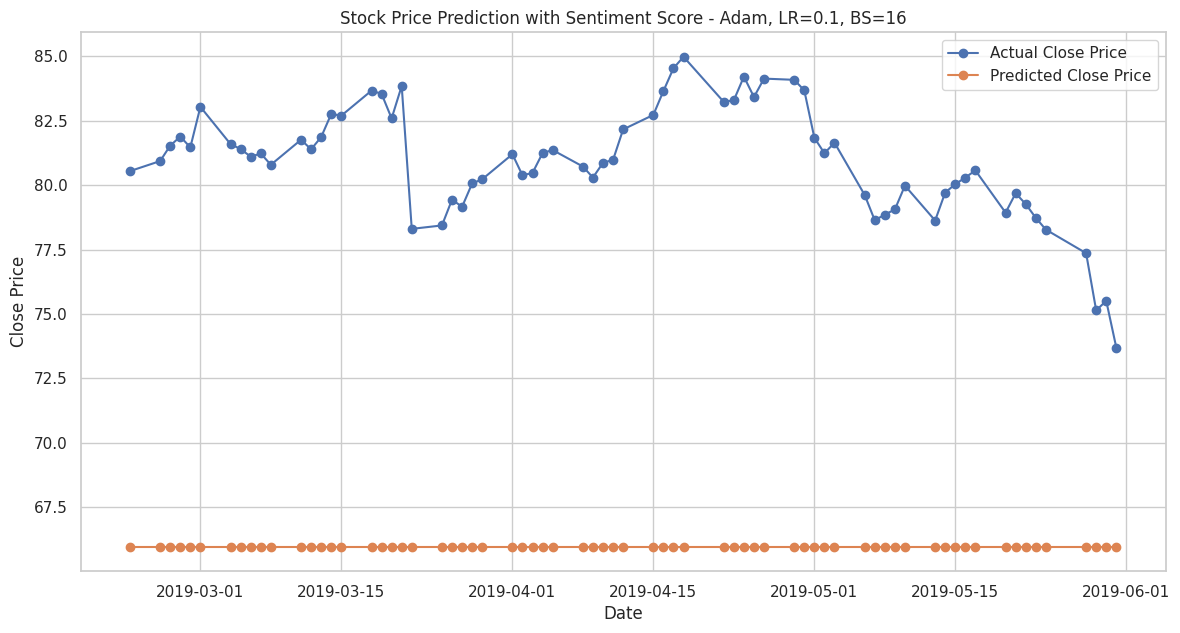

3/3 [==============================] - 1s 11ms/step
Optimizer: Adam, Learning Rate: 0.01, Batch Size: 4
Mean Squared Error (MSE): 1.8324529853209999
Root Mean Squared Error (RMSE): 1.3536812716887974
R-squared (R^2): 0.6195320477162876



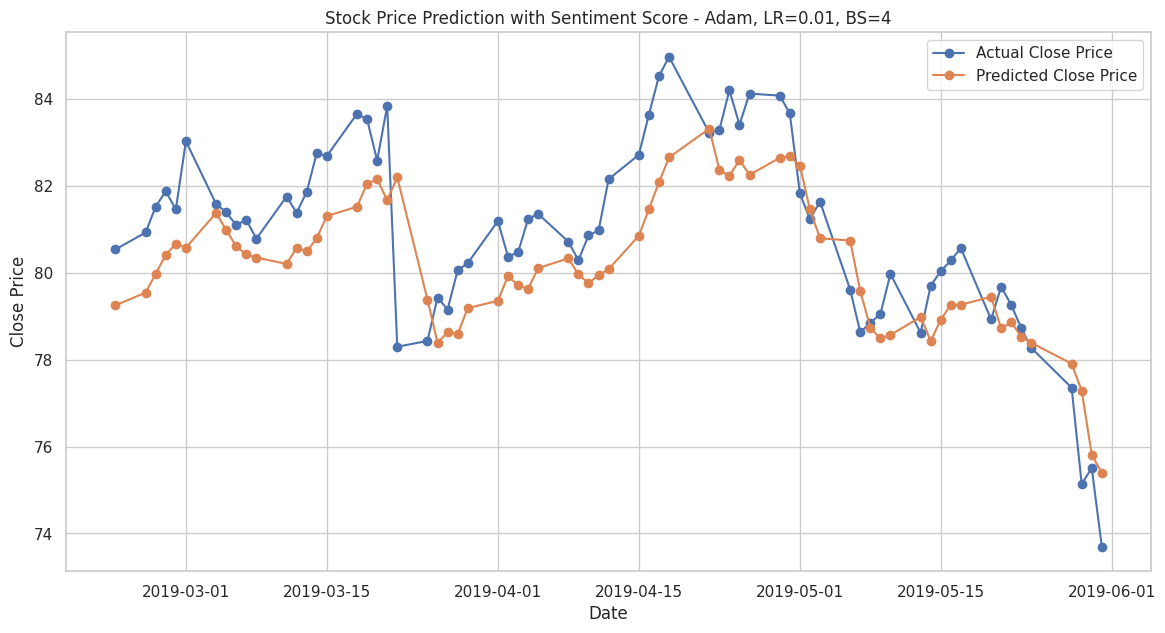

3/3 [==============================] - 1s 8ms/step
Optimizer: Adam, Learning Rate: 0.01, Batch Size: 8
Mean Squared Error (MSE): 1.7290767657839035
Root Mean Squared Error (RMSE): 1.3149436359722433
R-squared (R^2): 0.6409958117949173



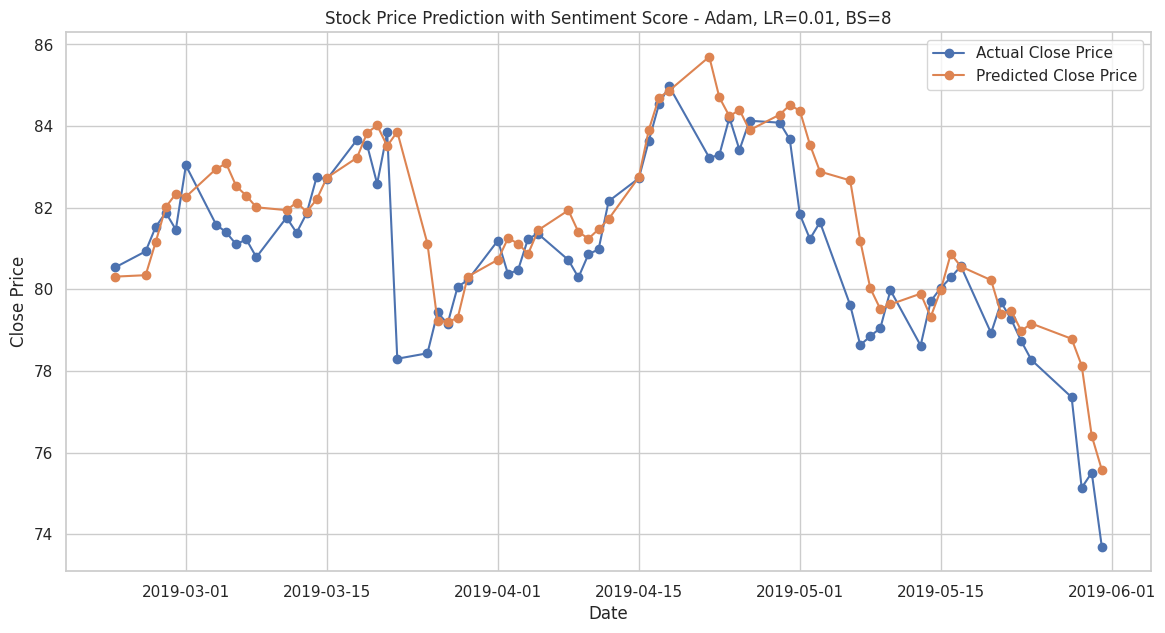

3/3 [==============================] - 1s 8ms/step
Optimizer: Adam, Learning Rate: 0.01, Batch Size: 16
Mean Squared Error (MSE): 7.1541505700849495
Root Mean Squared Error (RMSE): 2.674724391425208
R-squared (R^2): -0.48539964710350336



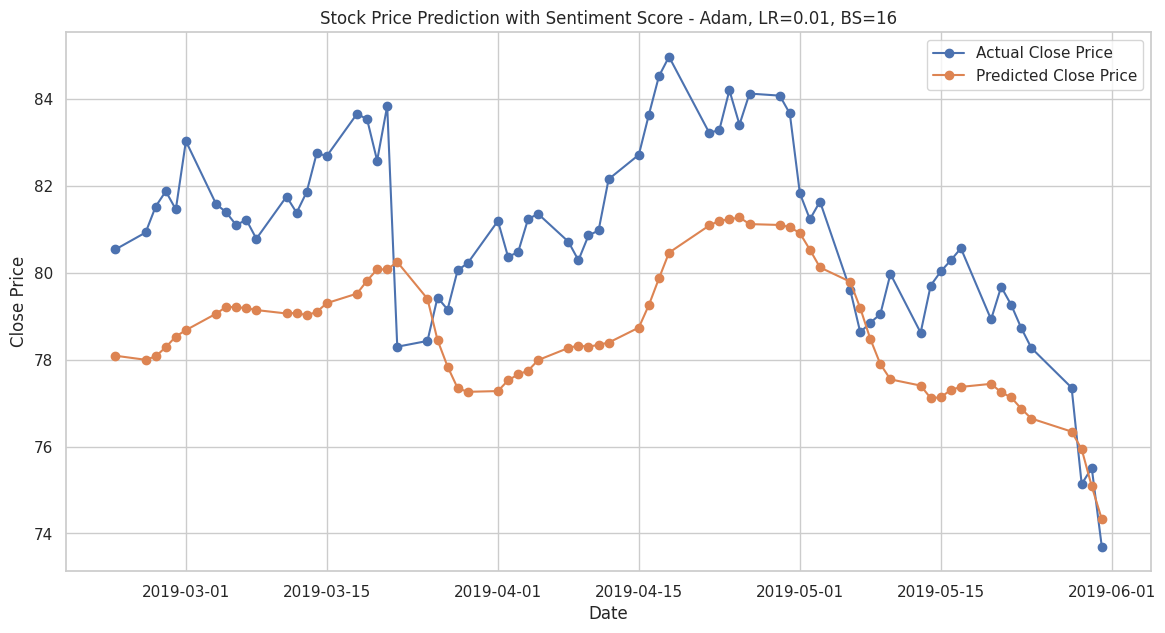

3/3 [==============================] - 1s 8ms/step
Optimizer: Adam, Learning Rate: 0.001, Batch Size: 4
Mean Squared Error (MSE): 3.7027690656655006
Root Mean Squared Error (RMSE): 1.9242580558920626
R-squared (R^2): 0.23120266905704856



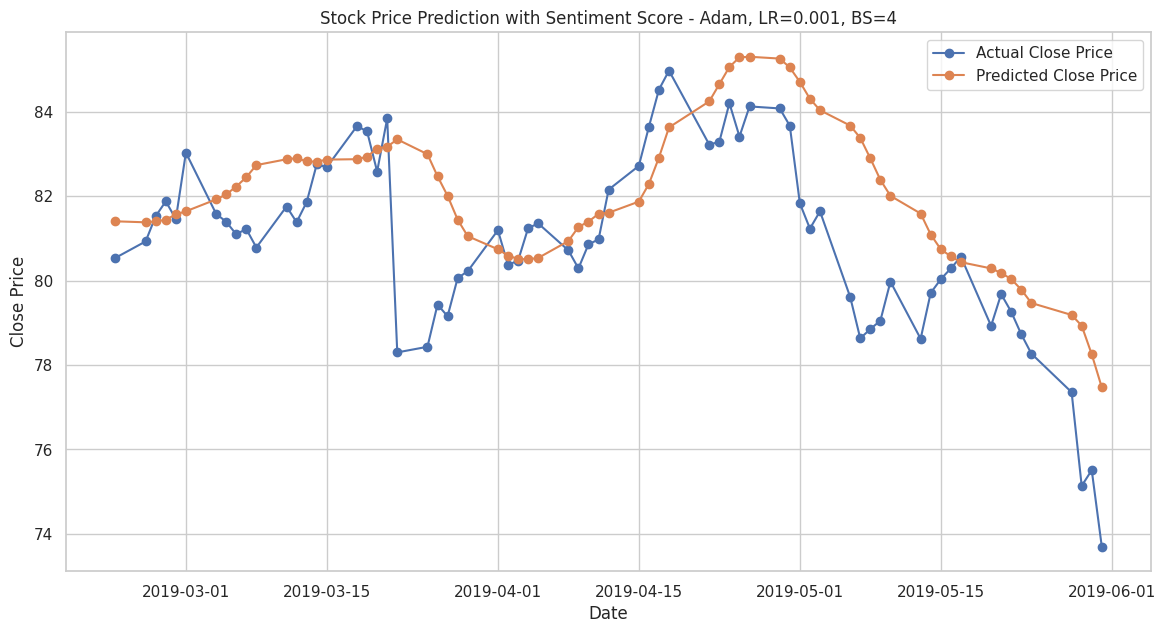

3/3 [==============================] - 1s 10ms/step
Optimizer: Adam, Learning Rate: 0.001, Batch Size: 8
Mean Squared Error (MSE): 3.499286206197921
Root Mean Squared Error (RMSE): 1.8706379142415352
R-squared (R^2): 0.27345134200343935



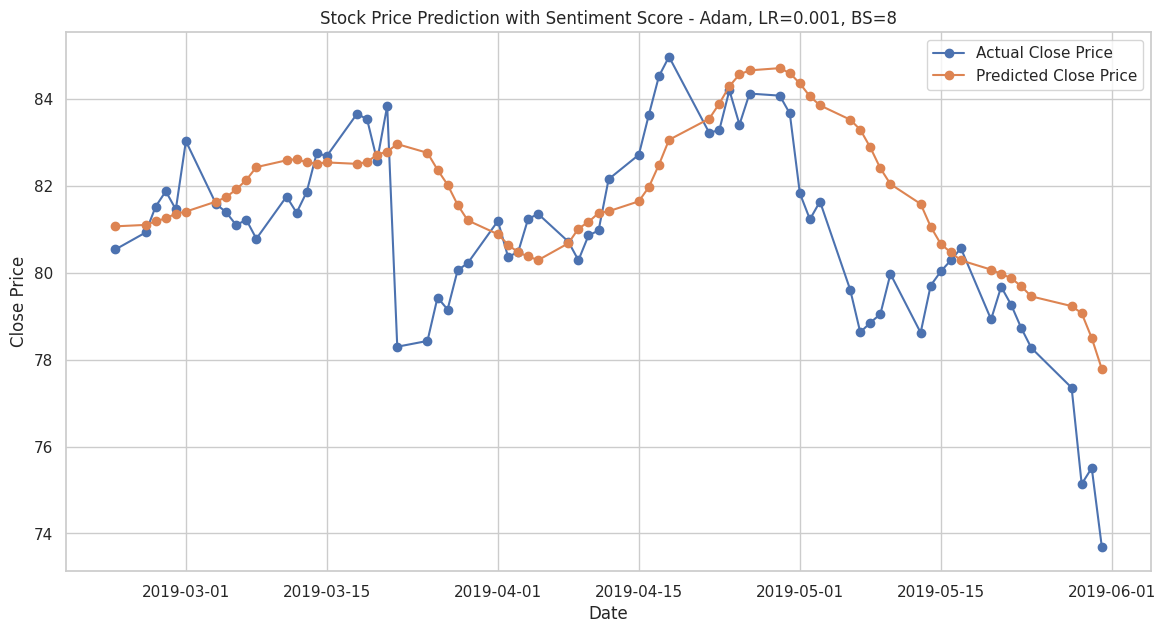

3/3 [==============================] - 1s 8ms/step
Optimizer: Adam, Learning Rate: 0.001, Batch Size: 16
Mean Squared Error (MSE): 4.166210634632146
Root Mean Squared Error (RMSE): 2.041129744683602
R-squared (R^2): 0.1349793737472358



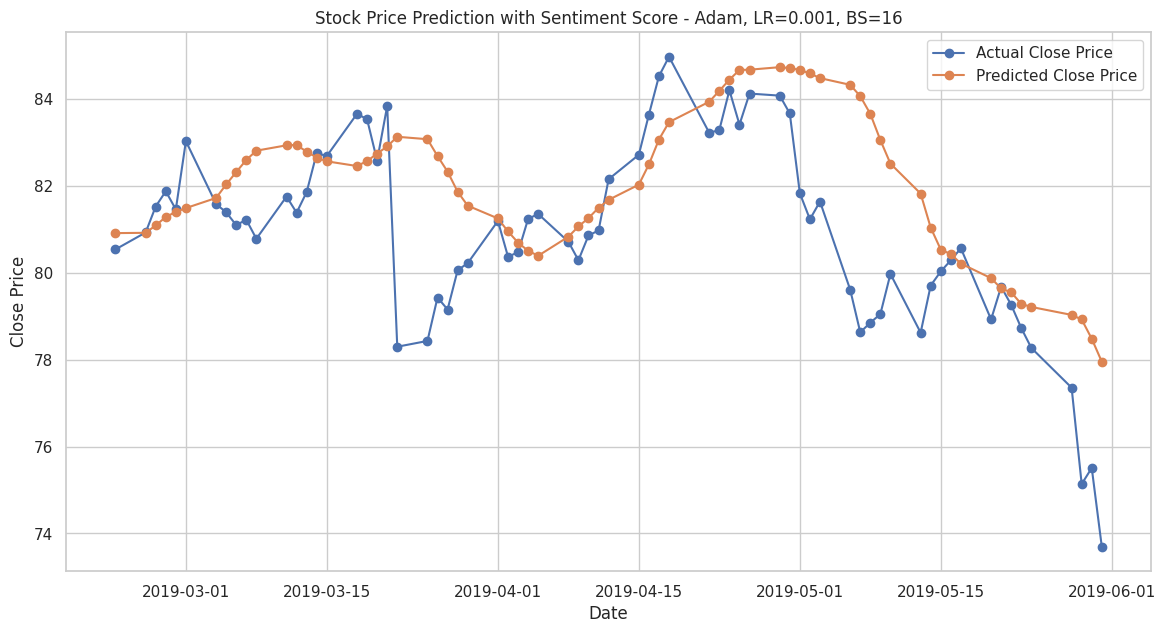

3/3 [==============================] - 1s 13ms/step
Optimizer: Adagrad, Learning Rate: 0.1, Batch Size: 4
Mean Squared Error (MSE): 2.9360211986072016
Root Mean Squared Error (RMSE): 1.7134821850860316
R-squared (R^2): 0.3904007457523001



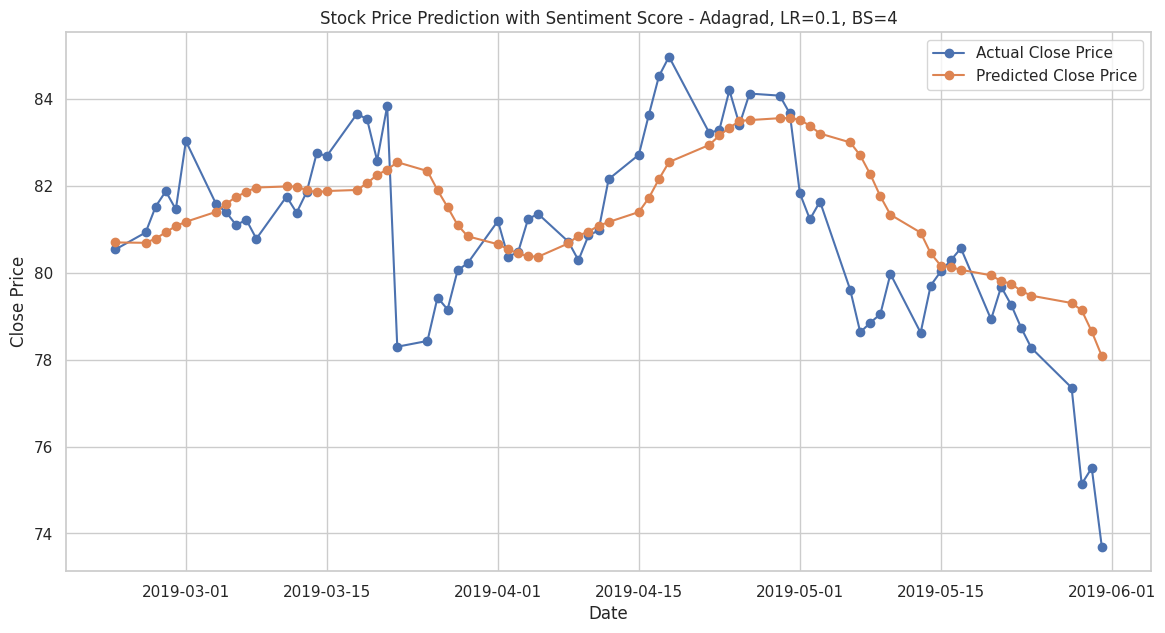

3/3 [==============================] - 1s 7ms/step
Optimizer: Adagrad, Learning Rate: 0.1, Batch Size: 8
Mean Squared Error (MSE): 3.3332851733803293
Root Mean Squared Error (RMSE): 1.8257286691566
R-squared (R^2): 0.30791775044012126



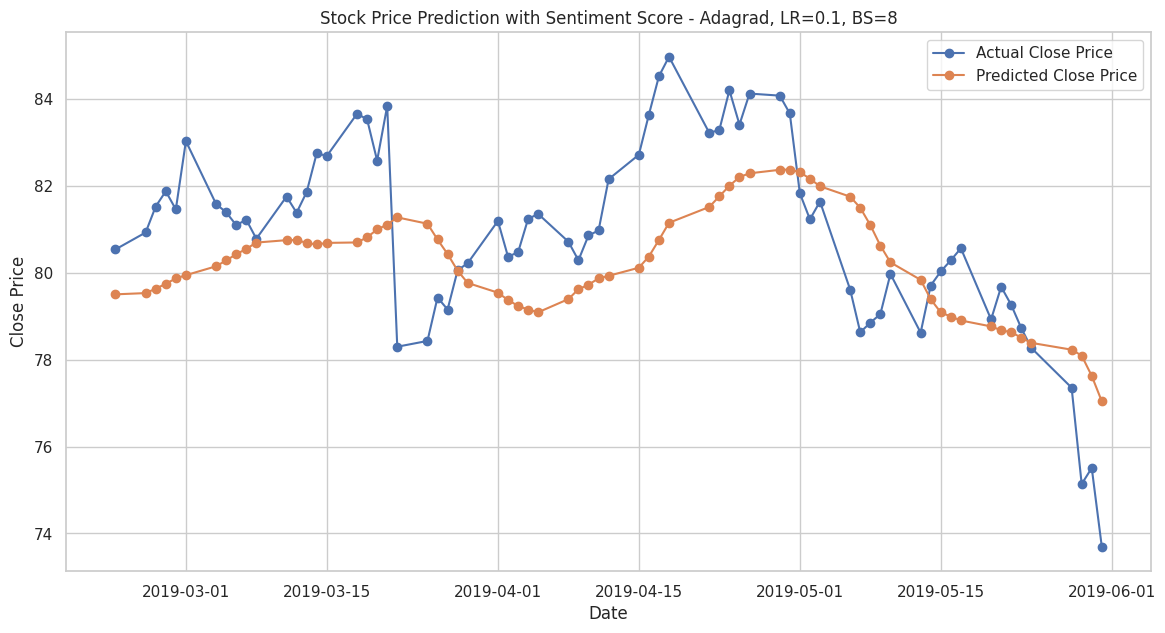

3/3 [==============================] - 1s 9ms/step
Optimizer: Adagrad, Learning Rate: 0.1, Batch Size: 16
Mean Squared Error (MSE): 3.221740841773251
Root Mean Squared Error (RMSE): 1.7949208455453547
R-squared (R^2): 0.33107744063428257



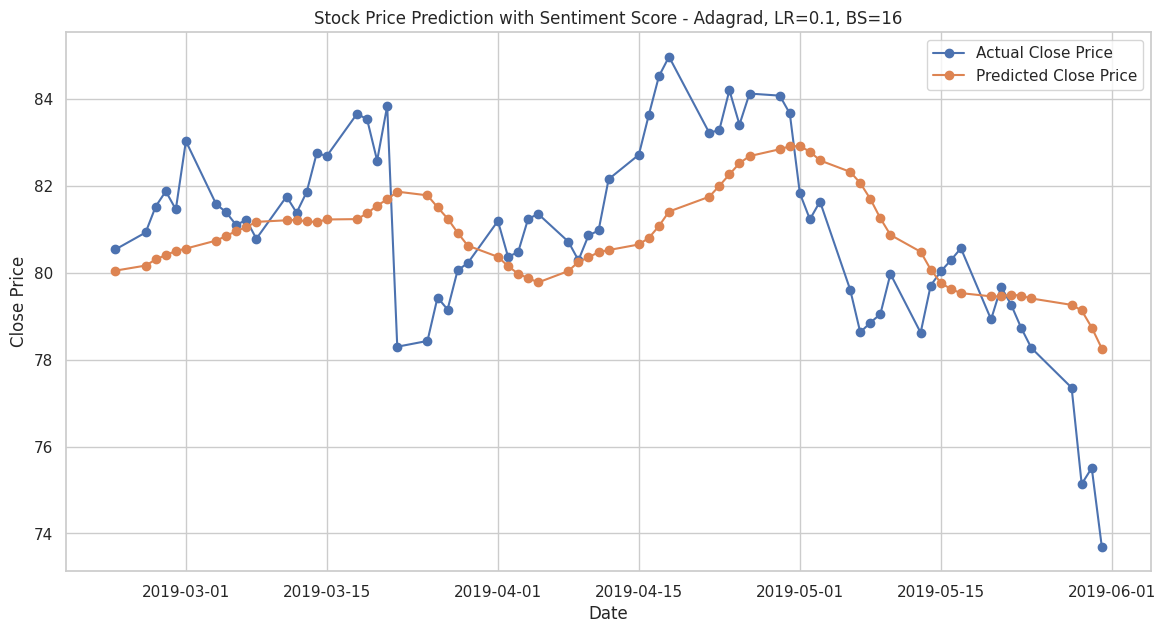

3/3 [==============================] - 1s 10ms/step
Optimizer: Adagrad, Learning Rate: 0.01, Batch Size: 4
Mean Squared Error (MSE): 3.9398513577495655
Root Mean Squared Error (RMSE): 1.9849058813328067
R-squared (R^2): 0.18197782404627638



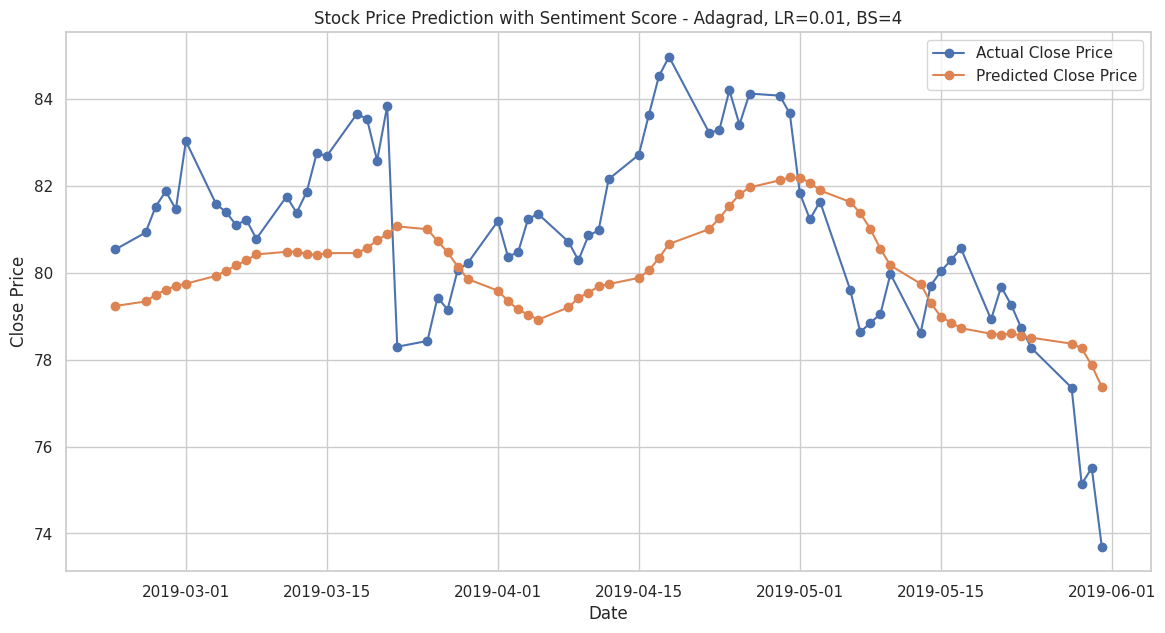

3/3 [==============================] - 1s 8ms/step
Optimizer: Adagrad, Learning Rate: 0.01, Batch Size: 8
Mean Squared Error (MSE): 17.68941266875293
Root Mean Squared Error (RMSE): 4.205878346879868
R-squared (R^2): -2.672811618685549



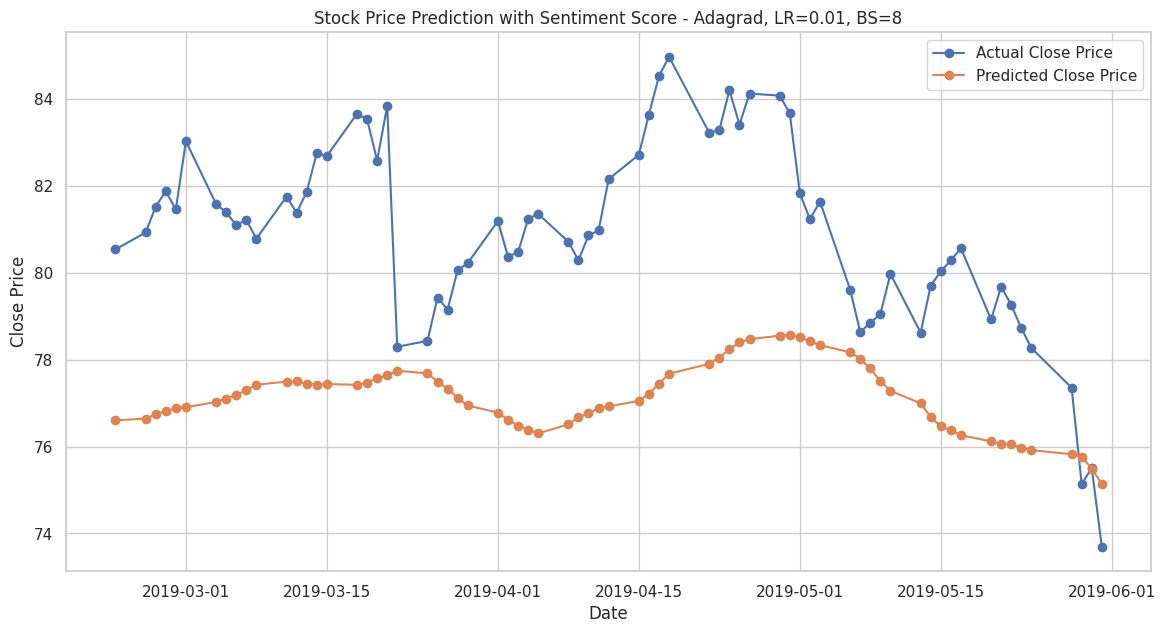

3/3 [==============================] - 1s 10ms/step
Optimizer: Adagrad, Learning Rate: 0.01, Batch Size: 16
Mean Squared Error (MSE): 60.850541268427826
Root Mean Squared Error (RMSE): 7.800675693068379
R-squared (R^2): -11.634256385955066



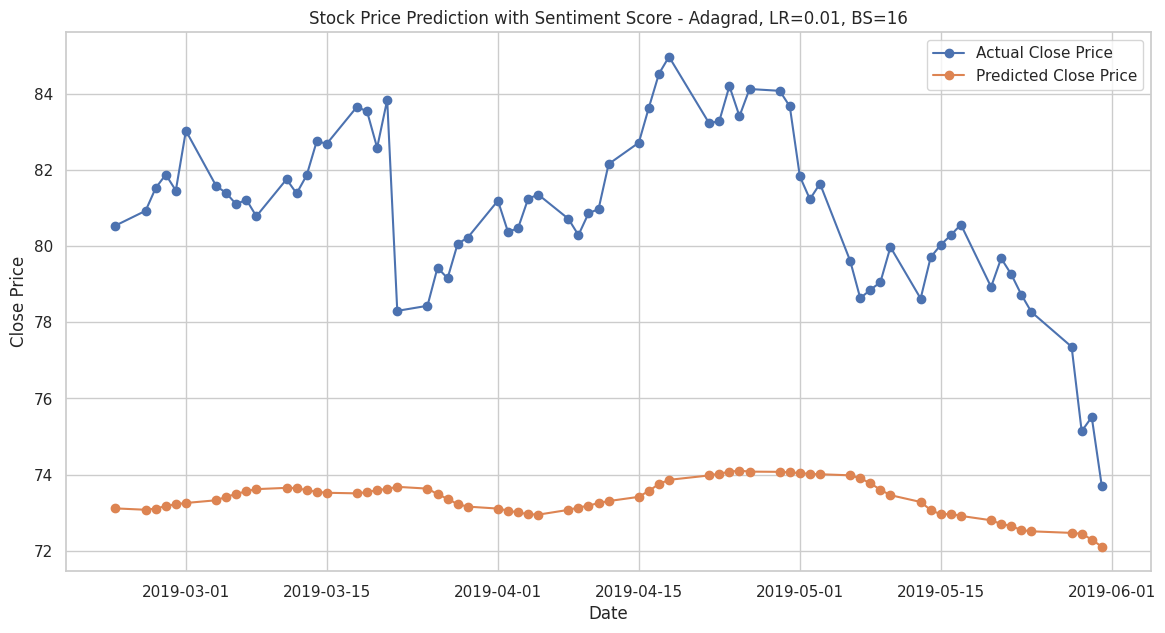

3/3 [==============================] - 1s 13ms/step
Optimizer: Adagrad, Learning Rate: 0.001, Batch Size: 4
Mean Squared Error (MSE): 52.68579395345327
Root Mean Squared Error (RMSE): 7.258498050799027
R-squared (R^2): -9.939028886681387



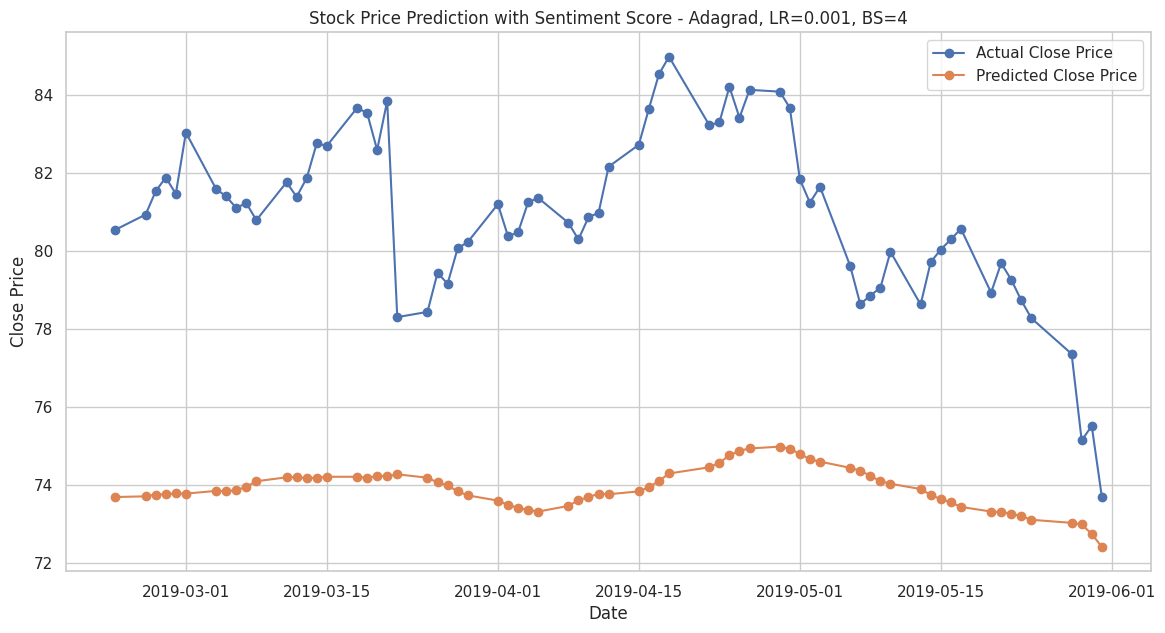

3/3 [==============================] - 1s 11ms/step
Optimizer: Adagrad, Learning Rate: 0.001, Batch Size: 8
Mean Squared Error (MSE): 117.77550992397664
Root Mean Squared Error (RMSE): 10.852442578699813
R-squared (R^2): -23.453455258551084



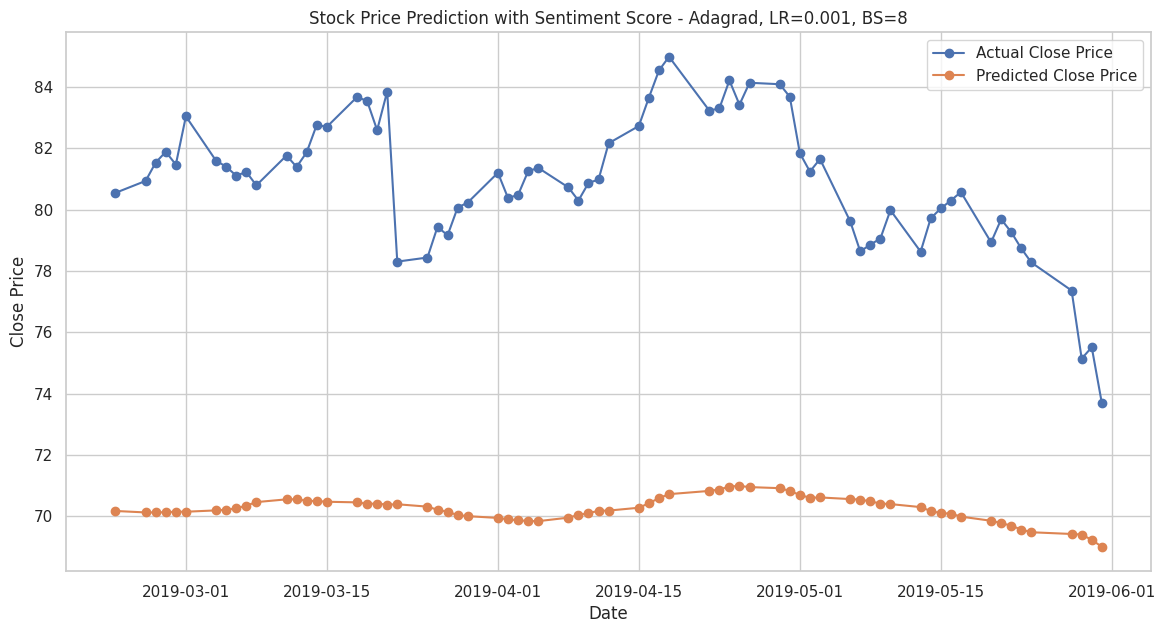

3/3 [==============================] - 1s 9ms/step
Optimizer: Adagrad, Learning Rate: 0.001, Batch Size: 16
Mean Squared Error (MSE): 227.7206864162246
Root Mean Squared Error (RMSE): 15.090417039175048
R-squared (R^2): -46.28111659478409



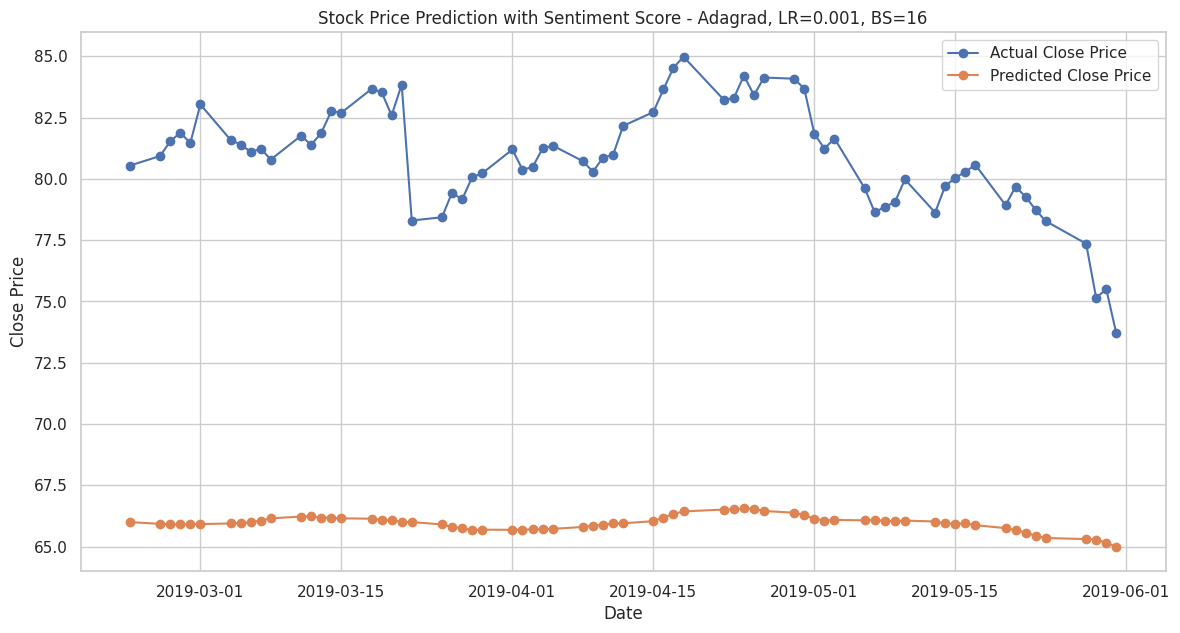

3/3 [==============================] - 1s 10ms/step
Optimizer: Nadam, Learning Rate: 0.1, Batch Size: 4
Mean Squared Error (MSE): 48.055962802050026
Root Mean Squared Error (RMSE): 6.932240821123428
R-squared (R^2): -8.977747810602285



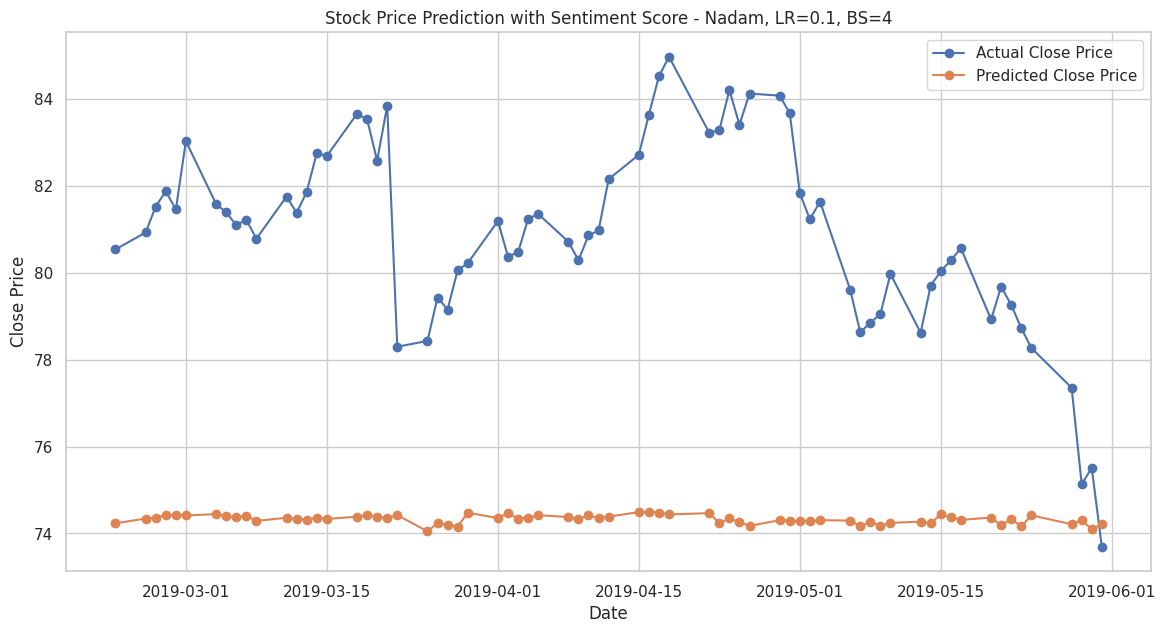

3/3 [==============================] - 1s 10ms/step
Optimizer: Nadam, Learning Rate: 0.1, Batch Size: 8
Mean Squared Error (MSE): 128.0595518795296
Root Mean Squared Error (RMSE): 11.316340039055454
R-squared (R^2): -25.58870697598798



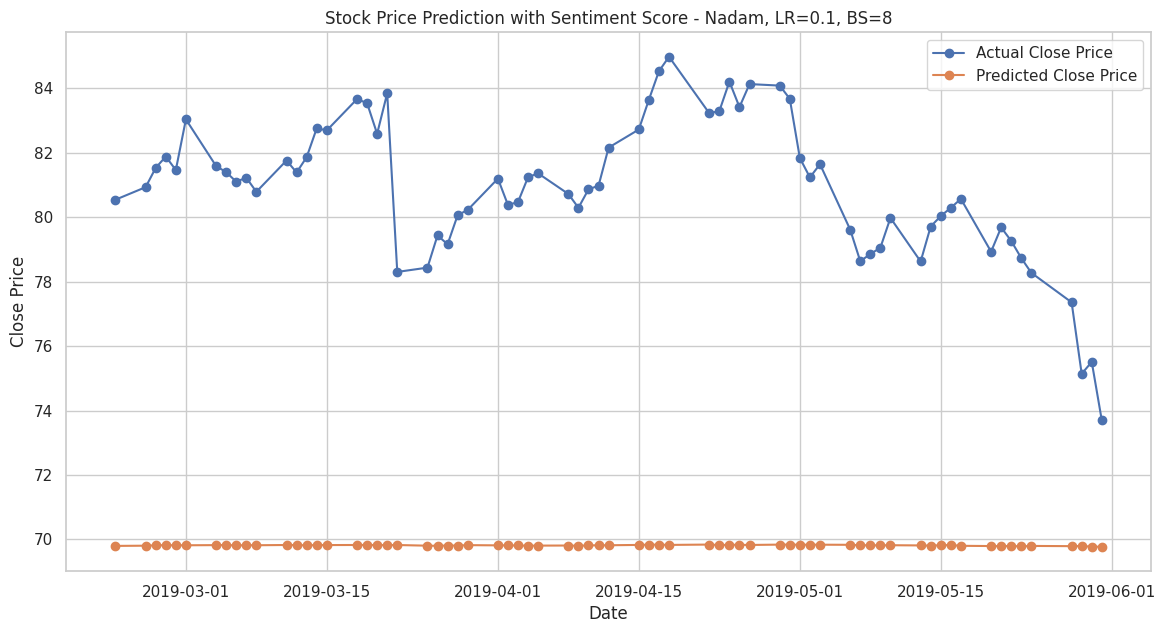

3/3 [==============================] - 1s 12ms/step
Optimizer: Nadam, Learning Rate: 0.1, Batch Size: 16
Mean Squared Error (MSE): 103.44818710345457
Root Mean Squared Error (RMSE): 10.170948190972883
R-squared (R^2): -20.47870653708425



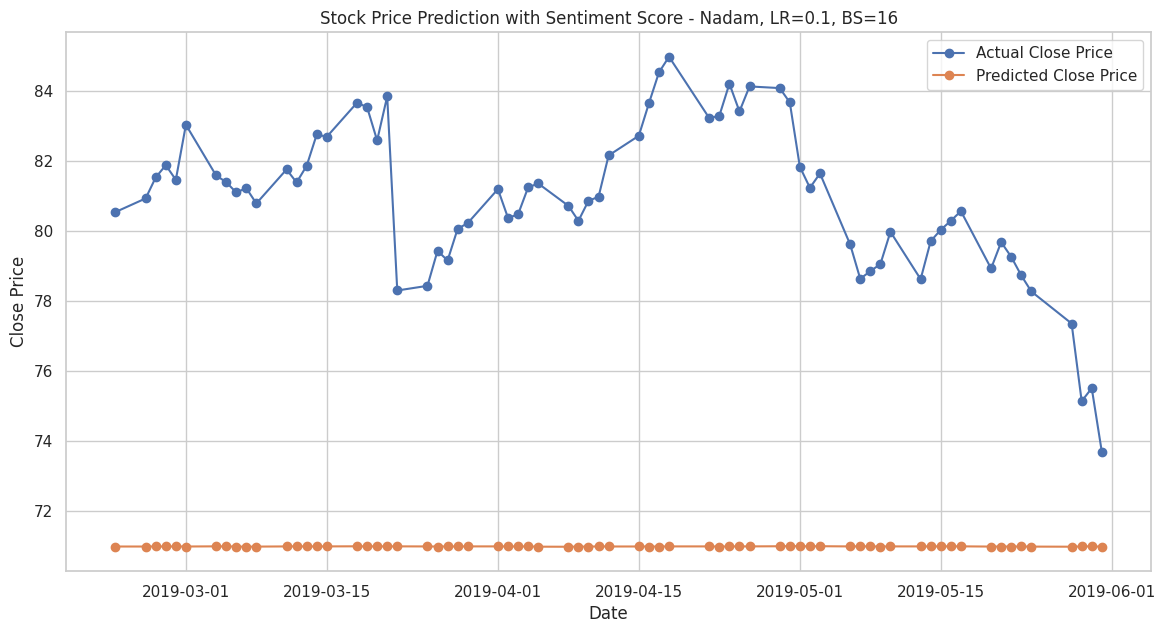

3/3 [==============================] - 1s 8ms/step
Optimizer: Nadam, Learning Rate: 0.01, Batch Size: 4
Mean Squared Error (MSE): 3.320491934425104
Root Mean Squared Error (RMSE): 1.822221702874023
R-squared (R^2): 0.31057398089588817



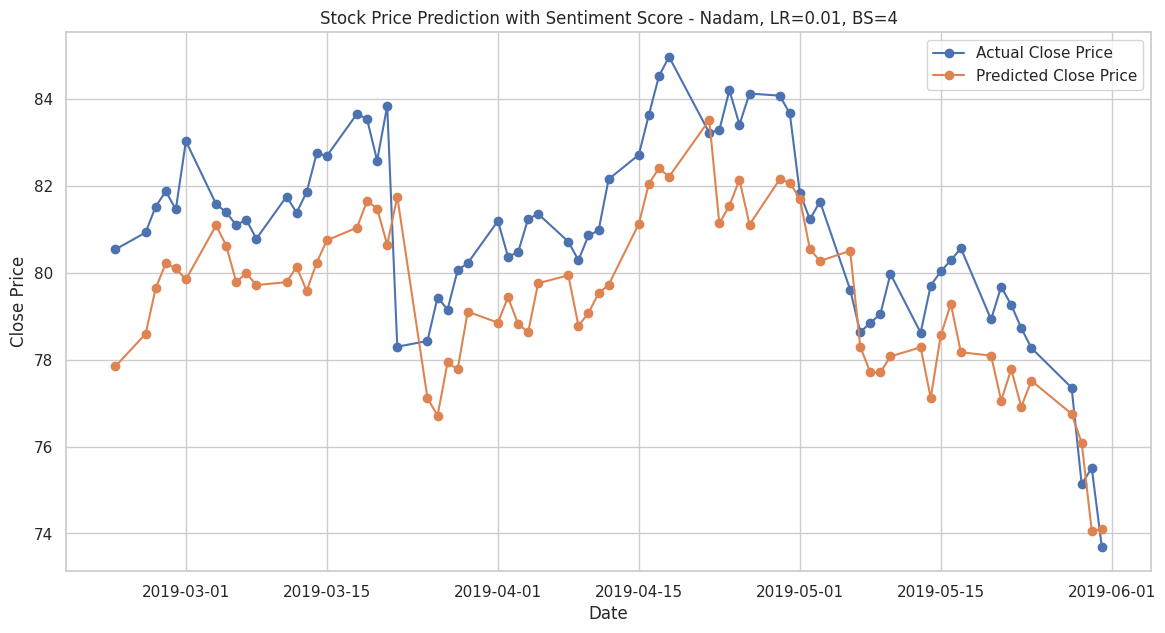

3/3 [==============================] - 1s 8ms/step
Optimizer: Nadam, Learning Rate: 0.01, Batch Size: 8
Mean Squared Error (MSE): 4.2002437782148725
Root Mean Squared Error (RMSE): 2.0494496281233343
R-squared (R^2): 0.12791315128345504



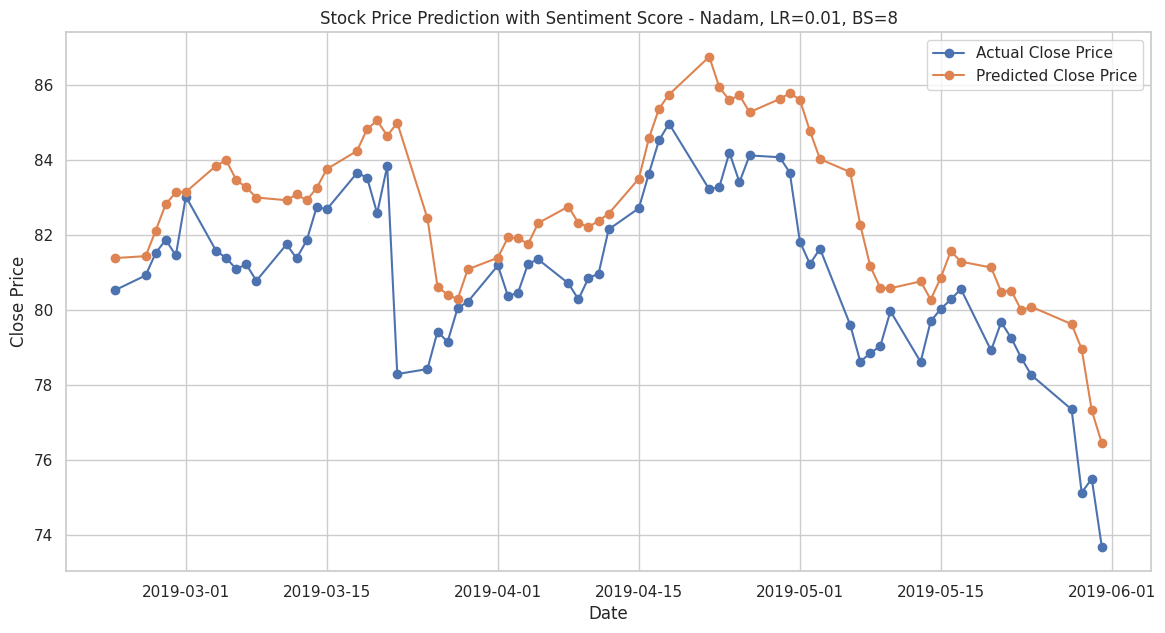

3/3 [==============================] - 1s 8ms/step
Optimizer: Nadam, Learning Rate: 0.01, Batch Size: 16
Mean Squared Error (MSE): 3.1245301985867995
Root Mean Squared Error (RMSE): 1.7676340680657858
R-squared (R^2): 0.3512610604322295



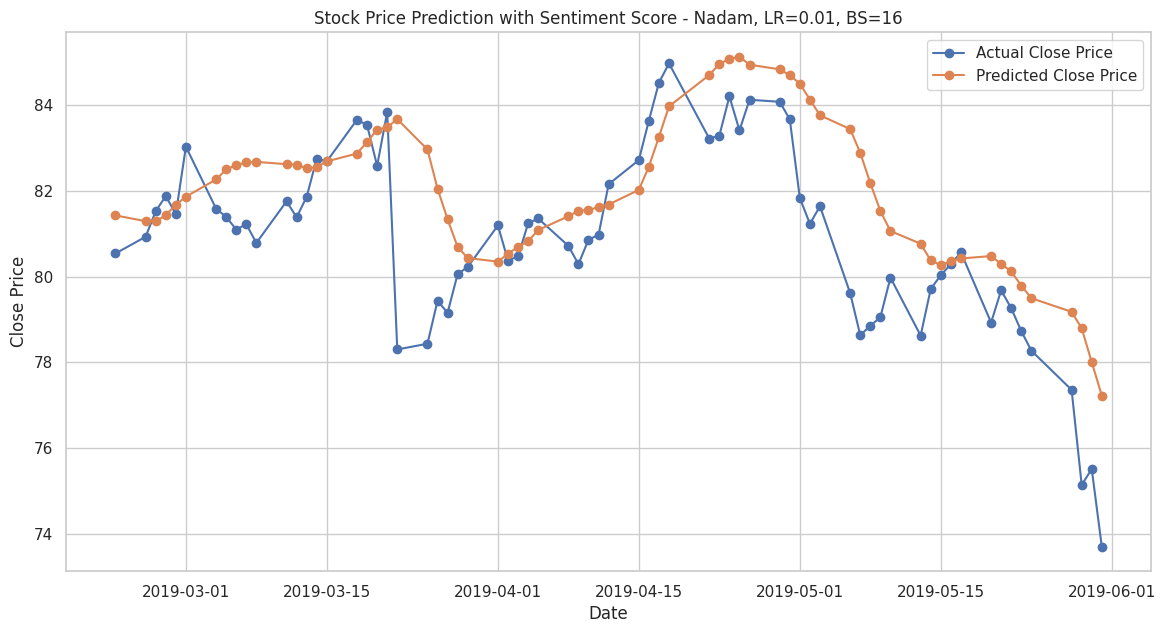

3/3 [==============================] - 1s 8ms/step
Optimizer: Nadam, Learning Rate: 0.001, Batch Size: 4
Mean Squared Error (MSE): 2.8819150727674434
Root Mean Squared Error (RMSE): 1.697620414806397
R-squared (R^2): 0.4016346748457943



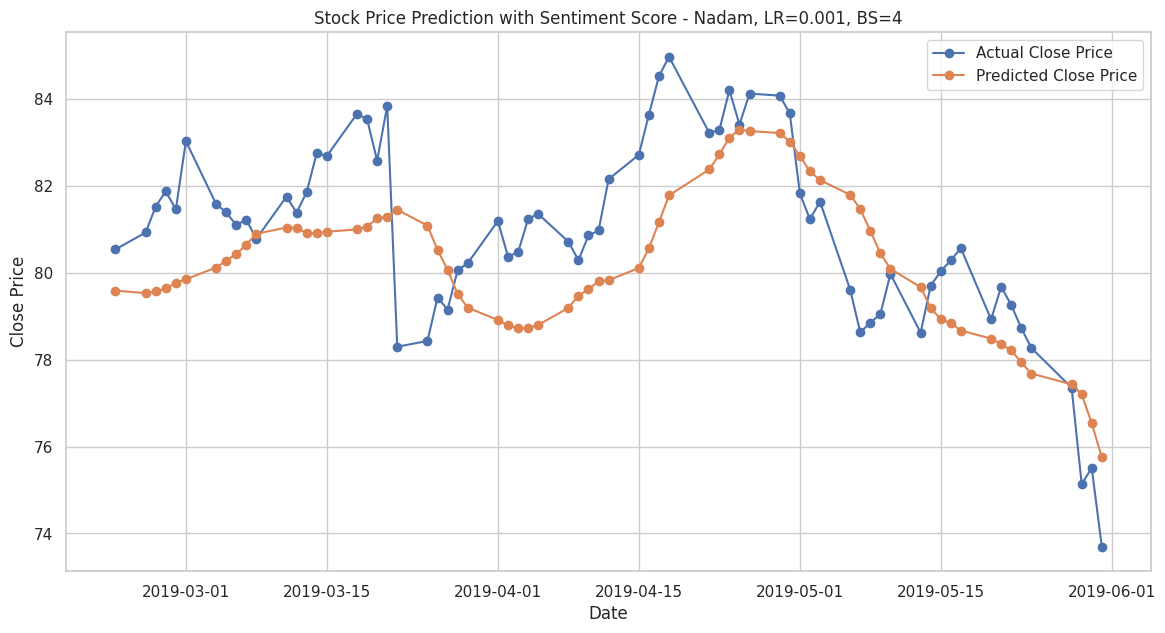

3/3 [==============================] - 1s 9ms/step
Optimizer: Nadam, Learning Rate: 0.001, Batch Size: 8
Mean Squared Error (MSE): 3.8418172613317263
Root Mean Squared Error (RMSE): 1.9600554230255138
R-squared (R^2): 0.2023324155238555



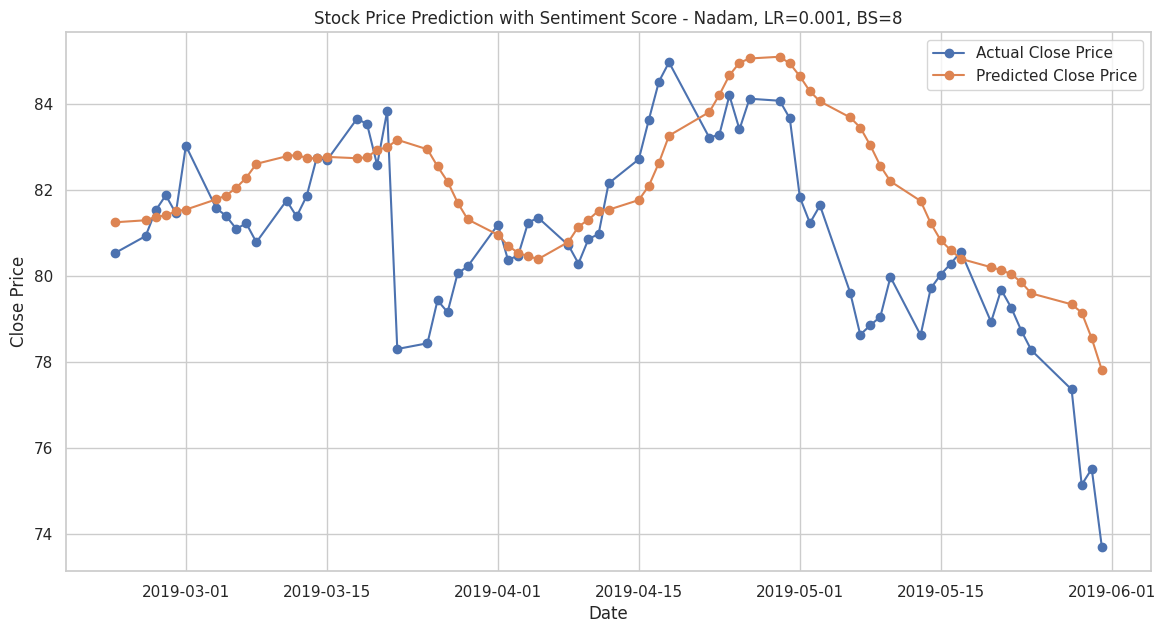

3/3 [==============================] - 1s 8ms/step
Optimizer: Nadam, Learning Rate: 0.001, Batch Size: 16
Mean Squared Error (MSE): 3.4538398573308986
Root Mean Squared Error (RMSE): 1.8584509294923282
R-squared (R^2): 0.2828872617409264



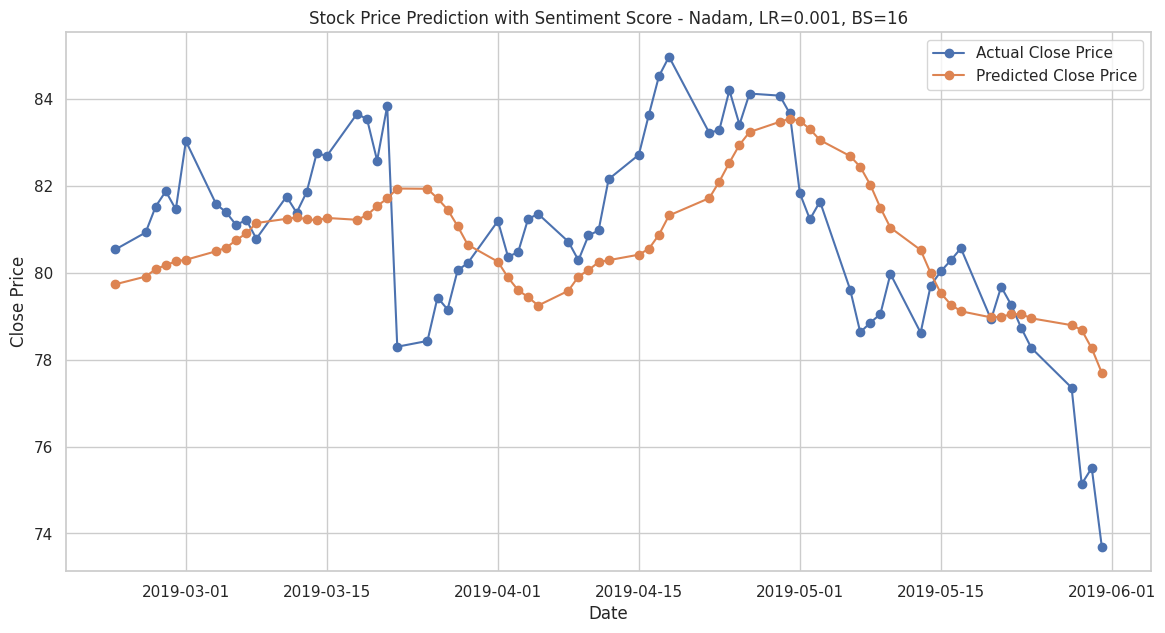

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam, Adagrad, Nadam
import matplotlib.pyplot as plt

df = final_df

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by Date
df = df.sort_values(by='Date')

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Feature selection
features = ['Adj Close', 'final_sentiment_score']
df = df[features]

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(df)

# Function to create time series data
def create_time_series_data(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps), :])
        y.append(data[i + time_steps, 0])
    return np.array(X), np.array(y)

# Set the time steps
time_steps = 10

# Create time series data
X, y = create_time_series_data(df_scaled, time_steps)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Define hyperparameters
optimizer_names = ['Adam', 'Adagrad', 'Nadam']
learning_rates = [0.1, 0.01, 0.001]
batch_sizes = [4, 8, 16]

# Iterate through different hyperparameters
for optimizer_name in optimizer_names:
    for learning_rate in learning_rates:
        for batch_size in batch_sizes:
            # Build the LSTM model
            model = Sequential()
            if optimizer_name == 'Adam':
                optimizer = Adam(learning_rate=learning_rate)
            elif optimizer_name == 'Adagrad':
                optimizer = Adagrad(learning_rate=learning_rate)
            elif optimizer_name == 'Nadam':
                optimizer = Nadam(learning_rate=learning_rate)

            model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
            model.add(LSTM(units=50))
            model.add(Dense(units=1))
            model.compile(optimizer=optimizer, loss='mean_squared_error')

            # Train the model and record training and validation loss
            history = model.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_data=(X_test, y_test), verbose=0)

            # Make predictions
            y_pred = model.predict(X_test)

            # Invert predictions to original scale
            y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_test[:, -1, 1:]), axis=1))[:, 0]

            # Invert actual values to original scale
            y_test_inverse = scaler.inverse_transform(np.concatenate((y_test.reshape(-1, 1), X_test[:, -1, 1:]), axis=1))[:, 0]

            # Evaluate the model
            mse = mean_squared_error(y_test_inverse, y_pred_inverse)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test_inverse, y_pred_inverse)

            # Print evaluation metrics
            print(f'Optimizer: {optimizer_name}, Learning Rate: {learning_rate}, Batch Size: {batch_size}')
            print(f'Mean Squared Error (MSE): {mse}')
            print(f'Root Mean Squared Error (RMSE): {rmse}')
            print(f'R-squared (R^2): {r2}\n')

            # Plot the Actual Price and Predicted Price
            plt.figure(figsize=(14, 7))
            plt.plot(df.index[-len(y_test):], y_test_inverse, label='Actual Close Price', marker='o')
            plt.plot(df.index[-len(y_test):], y_pred_inverse, label='Predicted Close Price', marker='o')
            plt.title(f'Stock Price Prediction with Sentiment Score - {optimizer_name}, LR={learning_rate}, BS={batch_size}')
            plt.xlabel('Date')
            plt.ylabel('Close Price')
            plt.legend()
            plt.show()


#Cross Validation

With 10 Ephocs

In [ ]:
# Import necessary libraries
from sklearn.model_selection import KFold

# Define number of folds
num_folds = 6
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
mse_scores, rmse_scores, r2_scores = [], [], []

# Initialize lists to store training and validation loss for each fold
train_losses, val_losses = [], []

# Perform 5-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and record training and validation loss
    history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on validation set
    val_loss = model.evaluate(X_val, y_val)

    # Record training and validation loss for this fold
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Make predictions
    y_pred = model.predict(X_val)

    # Invert predictions to original scale
    y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_val[:, -1, 1:]), axis=1))[:, 0]

    # Invert actual values to original scale
    y_val_inverse = scaler.inverse_transform(np.concatenate((y_val.reshape(-1, 1), X_val[:, -1, 1:]), axis=1))[:, 0]

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_inverse, y_pred_inverse)

    # Record evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


2/2 [==============================] - 1s 10ms/step


In [ ]:
# Display evaluation metrics
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Mean R^2: {np.mean(r2_scores)}')


Mean MSE: 4.289808789505924
Mean RMSE: 2.0612545680715617
Mean R^2: 0.9141872671954171


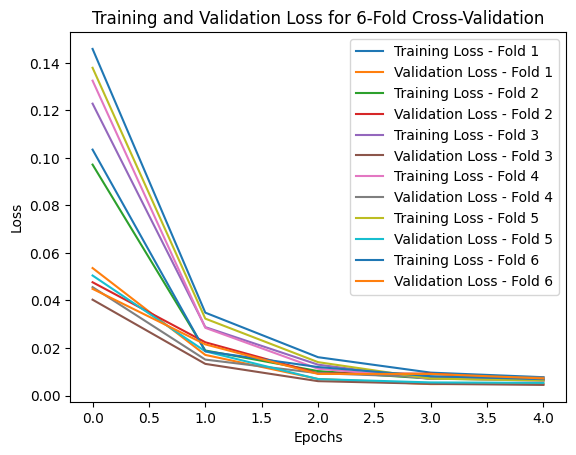

In [ ]:
# Plot training and validation loss for each fold
for i in range(num_folds):
    plt.plot(train_losses[i], label=f'Training Loss - Fold {i + 1}')
    plt.plot(val_losses[i], label=f'Validation Loss - Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for 6-Fold Cross-Validation')
plt.legend()
plt.show()

With 10 Ephocs

In [ ]:
# Import necessary libraries
from sklearn.model_selection import KFold

# Define number of folds
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics
mse_scores, rmse_scores, r2_scores = [], [], []

# Initialize lists to store training and validation loss for each fold
train_losses, val_losses = [], []

# Perform 5-fold cross-validation
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model and record training and validation loss
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=0)

    # Evaluate the model on validation set
    val_loss = model.evaluate(X_val, y_val)

    # Record training and validation loss for this fold
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])

    # Make predictions
    y_pred = model.predict(X_val)

    # Invert predictions to original scale
    y_pred_inverse = scaler.inverse_transform(np.concatenate((y_pred, X_val[:, -1, 1:]), axis=1))[:, 0]

    # Invert actual values to original scale
    y_val_inverse = scaler.inverse_transform(np.concatenate((y_val.reshape(-1, 1), X_val[:, -1, 1:]), axis=1))[:, 0]

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val_inverse, y_pred_inverse)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val_inverse, y_pred_inverse)

    # Record evaluation metrics for this fold
    mse_scores.append(mse)
    rmse_scores.append(rmse)
    r2_scores.append(r2)


3/3 [==============================] - 1s 7ms/step


In [ ]:
# Display evaluation metrics
print(f'Mean MSE: {np.mean(mse_scores)}')
print(f'Mean RMSE: {np.mean(rmse_scores)}')
print(f'Mean R^2: {np.mean(r2_scores)}')


Mean MSE: 3.923246719945383
Mean RMSE: 1.9716130006018744
Mean R^2: 0.9152975973411482


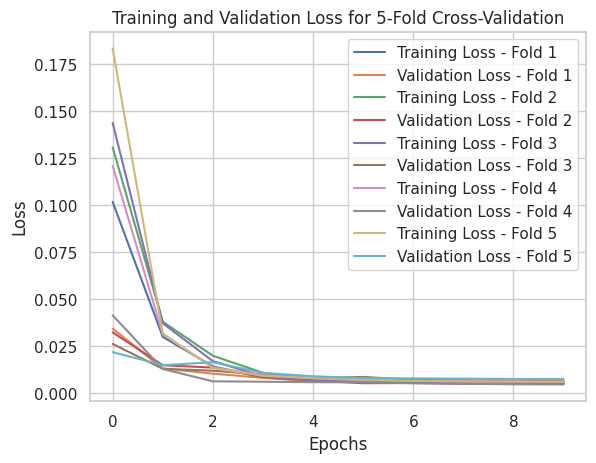

In [ ]:
# Plot training and validation loss for each fold
for i in range(num_folds):
    plt.plot(train_losses[i], label=f'Training Loss - Fold {i + 1}')
    plt.plot(val_losses[i], label=f'Validation Loss - Fold {i + 1}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for 5-Fold Cross-Validation')
plt.legend()
plt.show()

# Diagnosis of Model

## QQ Plot (Quantile-Quantile Plot)

This plot compares the quantiles of the residuals with the quantiles of a theoretical normal distribution. Deviations from a straight line might indicate non-normality.

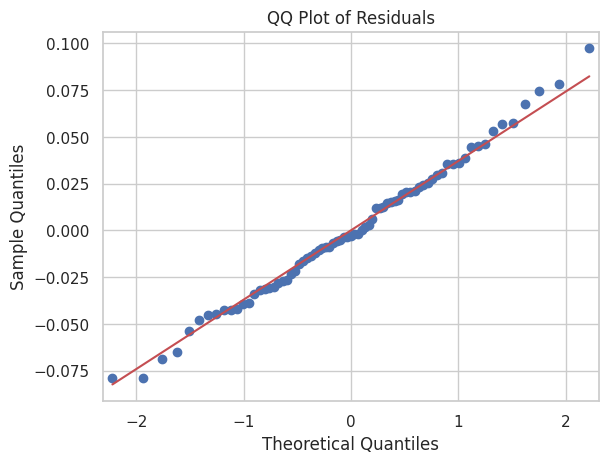

In [ ]:
import statsmodels.api as sm

# Create QQ plot
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()
